# Library Tools and Packages

In [ ]:
!pip install lightgbm
!pip install xgboost

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Colab Notebooks/2022dataset/heart_2022_no_nans.csv'

In [ ]:
import os
# List the files in the '2022dataset' folder
folder_path = '/content/drive/My Drive/Colab Notebooks/2022dataset'
files_in_folder = os.listdir(folder_path)
print(files_in_folder)

['heart_2022_no_nans.csv', 'subset_100k.csv', 'subset_50k.csv', 'subset_10k.csv', 'subset_5k.csv', 'subset_20k.csv', '20k.ipynb', 'DL_2022_dataset.ipynb', 'subset_1k.csv', 'top_15.csv', 'clean_encoded_dataset.csv', '50k.ipynb', 'Quantum_SVM_Tutotrial.ipynb', '10k.ipynb', 'XAI.ipynb', '5k.ipynb', '100k.ipynb', 'DL .ipynb', '2022update_dataset.ipynb']


# Basic observations and Preprocessing

In [ ]:
data_update = pd.read_csv(file_path)
data_update


State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 4.0   
1              Alabama    Male     Very good                 0.0   
2              Alabama    Male     Very good                 0.0   
3              Alabama  Female          Fair                 5.0   
4              Alabama  Female          Good                 3.0   
...                ...     ...           ...                 ...   
246017  Virgin Islands    Male     Very good                 0.0   
246018  Virgin Islands  Female          Fair                 0.0   
246019  Virgin Islands    Male          Good                 0.0   
246020  Virgin Islands  Female     Excellent                 2.0   
246021  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    0.0  Within past year (anytime less than 12 months ...   
2                    0.0  Within past year (anytime less than 12 months ...   
3                    0.0  Within past year (anytime less than 12 months ...   
4                   15.0  Within past year (anytime less than 12 months ...   
...                  ...                                                ...   
246017               0.0  Within past 2 years (1 year but less than 2 ye...   
246018               7.0  Within past year (anytime less than 12 months ...   
246019              15.0  Within past year (anytime less than 12 months ...   
246020               2.0  Within past year (anytime less than 12 months ...   
246021               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours            RemovedTeeth HadHeartAttack  \
0                     Yes         9.0            None of them             No   
1                     Yes         6.0            None of them             No   
2                      No         8.0  6 or more, but not all             No   
3                     Yes         9.0            None of them             No   
4                     Yes         5.0                  1 to 5             No   
...                   ...         ...                     ...            ...   
246017                Yes         6.0            None of them             No   
246018                Yes         7.0            None of them             No   
246019                Yes         7.0                  1 to 5             No   
246020                Yes         7.0            None of them             No   
246021                 No         5.0            None of them            Yes   

        ... HeightInMeters WeightInKilograms    BMI AlcoholDrinkers  \
0       ...           1.60             71.67  27.99              No   
1       ...           1.78             95.25  30.13              No   
2       ...           1.85            108.86  31.66             Yes   
3       ...           1.70             90.72  31.32              No   
4       ...           1.55             79.38  33.07              No   
...     ...            ...               ...    ...             ...   
246017  ...           1.78            102.06  32.28             Yes   
246018  ...           1.93             90.72  24.34              No   
246019  ...           1.68             83.91  29.86             Yes   
246020  ...           1.70             83.01  28.66              No   
246021  ...           1.83            108.86  32.55              No   

       HIVTesting FluVaxLast12 PneumoVaxEver  \
0              No          Yes           Yes   
1              No          Yes           Yes   
2              No           No           Yes   
3              No          Yes           Yes   
4              No          Yes           Yes   
...           ...          ...           ...   
246017         No           No            No   
246018         No           No            No   
24601

In [ ]:
data_update.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusLast10Tdap            0
HighRiskLastYear             0
CovidPos                     0
dtype: int64

In [ ]:
data_update.duplicated().sum()

np.int64(9)

In [ ]:
duplicate_obs = data_update[data_update.duplicated(keep=False)]
duplicate_obs

State     Sex GeneralHealth  PhysicalHealthDays  \
5294         Arizona  Female     Excellent                 0.0   
5702         Arizona  Female     Excellent                 0.0   
86986       Maryland    Male     Excellent                 0.0   
87371       Maryland  Female          Good                 0.0   
87555       Maryland  Female          Good                 0.0   
88402       Maryland    Male     Excellent                 0.0   
136874    New Jersey    Male          Good                 0.0   
137645    New Jersey    Male          Good                 0.0   
174878  Rhode Island  Female     Very good                 0.0   
174923  Rhode Island  Female     Very good                 0.0   
183992  South Dakota  Female          Fair                30.0   
184137  South Dakota  Female          Fair                30.0   
204115       Vermont  Female     Very good                 0.0   
208013       Vermont  Female     Very good                 0.0   
215390    Washington    Male     Excellent                 0.0   
216362    Washington    Male     Excellent                 0.0   
222651    Washington    Male     Very good                 0.0   
225974    Washington    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
5294                 0.0  Within past year (anytime less than 12 months ...   
5702                 0.0  Within past year (anytime less than 12 months ...   
86986                0.0  Within past year (anytime less than 12 months ...   
87371                0.0  Within past year (anytime less than 12 months ...   
87555                0.0  Within past year (anytime less than 12 months ...   
88402                0.0  Within past year (anytime less than 12 months ...   
136874               0.0  Within past year (anytime less than 12 months ...   
137645               0.0  Within past year (anytime less than 12 months ...   
174878               0.0  Within past year (anytime less than 12 months ...   
174923               0.0  Within past year (anytime less than 12 months ...   
183992               0.0  Within past year (anytime less than 12 months ...   
184137               0.0  Within past year (anytime less than 12 months ...   
204115               0.0  Within past year (anytime less than 12 months ...   
208013               0.0  Within past year (anytime less than 12 months ...   
215390               0.0  Within past year (anytime less than 12 months ...   
216362               0.0  Within past year (anytime less than 12 months ...   
222651               0.0  Within past year (anytime less than 12 months ...   
225974               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours            RemovedTeeth HadHeartAttack  \
5294                  Yes         7.0            None of them             No   
5702                  Yes         7.0            None of them             No   
86986                 Yes         8.0            None of them             No   
87371                 Yes         8.0            None of them             No   
87555                 Yes         8.0            None of them             No   
88402                 Yes         8.0            None of them             No   
136874                 No         8.0  6 or more, but not all             No   
137645                 No         8.0  6 or more, but not all             No   
174878                Yes         7.0                  1 to 5             No   
174923                Yes         7.0                  1 to 5             No   
183992                Yes         7.0            None of them             No   
184137                Yes         7.0            None of them             No   
204115                Yes         9.0            None of them             No   
208013                Yes         9.0            None of them             No   
215390                Yes         7.0            None of t

In [ ]:
data_copy = data_update.copy()
data_copy = data_update.drop_duplicates()
data_copy

State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 4.0   
1              Alabama    Male     Very good                 0.0   
2              Alabama    Male     Very good                 0.0   
3              Alabama  Female          Fair                 5.0   
4              Alabama  Female          Good                 3.0   
...                ...     ...           ...                 ...   
246017  Virgin Islands    Male     Very good                 0.0   
246018  Virgin Islands  Female          Fair                 0.0   
246019  Virgin Islands    Male          Good                 0.0   
246020  Virgin Islands  Female     Excellent                 2.0   
246021  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    0.0  Within past year (anytime less than 12 months ...   
2                    0.0  Within past year (anytime less than 12 months ...   
3                    0.0  Within past year (anytime less than 12 months ...   
4                   15.0  Within past year (anytime less than 12 months ...   
...                  ...                                                ...   
246017               0.0  Within past 2 years (1 year but less than 2 ye...   
246018               7.0  Within past year (anytime less than 12 months ...   
246019              15.0  Within past year (anytime less than 12 months ...   
246020               2.0  Within past year (anytime less than 12 months ...   
246021               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours            RemovedTeeth HadHeartAttack  \
0                     Yes         9.0            None of them             No   
1                     Yes         6.0            None of them             No   
2                      No         8.0  6 or more, but not all             No   
3                     Yes         9.0            None of them             No   
4                     Yes         5.0                  1 to 5             No   
...                   ...         ...                     ...            ...   
246017                Yes         6.0            None of them             No   
246018                Yes         7.0            None of them             No   
246019                Yes         7.0                  1 to 5             No   
246020                Yes         7.0            None of them             No   
246021                 No         5.0            None of them            Yes   

        ... HeightInMeters WeightInKilograms    BMI AlcoholDrinkers  \
0       ...           1.60             71.67  27.99              No   
1       ...           1.78             95.25  30.13              No   
2       ...           1.85            108.86  31.66             Yes   
3       ...           1.70             90.72  31.32              No   
4       ...           1.55             79.38  33.07              No   
...     ...            ...               ...    ...             ...   
246017  ...           1.78            102.06  32.28             Yes   
246018  ...           1.93             90.72  24.34              No   
246019  ...           1.68             83.91  29.86             Yes   
246020  ...           1.70             83.01  28.66              No   
246021  ...           1.83            108.86  32.55              No   

       HIVTesting FluVaxLast12 PneumoVaxEver  \
0              No          Yes           Yes   
1              No          Yes           Yes   
2              No           No           Yes   
3              No          Yes           Yes   
4              No          Yes           Yes   
...           ...          ...           ...   
246017         No           No            No   
246018         No           No            No   
24601

In [ ]:
data_copy1 = data_copy.copy()
data_copy2 = data_copy.copy()

In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246013 non-null  object 
 1   Sex                        246013 non-null  object 
 2   GeneralHealth              246013 non-null  object 
 3   PhysicalHealthDays         246013 non-null  float64
 4   MentalHealthDays           246013 non-null  float64
 5   LastCheckupTime            246013 non-null  object 
 6   PhysicalActivities         246013 non-null  object 
 7   SleepHours                 246013 non-null  float64
 8   RemovedTeeth               246013 non-null  object 
 9   HadHeartAttack             246013 non-null  object 
 10  HadAngina                  246013 non-null  object 
 11  HadStroke                  246013 non-null  object 
 12  HadAsthma                  246013 non-null  object 
 13  HadSkinCancer              246013 

In [ ]:
data_copy.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       246013.000000     246013.000000  246013.000000   246013.000000   
mean             4.119055          4.167292       7.021312        1.705150   
std              8.405803          8.102796       1.440698        0.106654   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      246013.000000  246013.000000  
mean           83.615522      28.668258  
std            21.323232       6.514005  
min            28.120000      12.020000  
25%            68.040000      24.270000  
50%            81.650000      27.460000  
75%            95.250000      31.890000  
max           292.570000      97.650000

In [ ]:
data_copy.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
numerical_cols = data_copy.select_dtypes(include=['float64','number']).columns
numerical_data = data_copy[numerical_cols]
numerical_data

PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0                      4.0               0.0         9.0            1.60   
1                      0.0               0.0         6.0            1.78   
2                      0.0               0.0         8.0            1.85   
3                      5.0               0.0         9.0            1.70   
4                      3.0              15.0         5.0            1.55   
...                    ...               ...         ...             ...   
246017                 0.0               0.0         6.0            1.78   
246018                 0.0               7.0         7.0            1.93   
246019                 0.0              15.0         7.0            1.68   
246020                 2.0               2.0         7.0            1.70   
246021                 0.0               0.0         5.0            1.83   

        WeightInKilograms    BMI  
0                   71.67  27.99  
1                   95.25  30.13  
2                  108.86  31.66  
3                   90.72  31.32  
4                   79.38  33.07  
...                   ...    ...  
246017             102.06  32.28  
246018              90.72  24.34  
246019              83.91  29.86  
246020              83.01  28.66  
246021             108.86  32.55  

[246013 rows x 6 columns]

In [ ]:
categorical_cols = data_copy.select_dtypes(include=['object','category']).columns
for col in categorical_cols:
    print(f"Levels in '{col}': {data_update[col].unique()}")
    print(f"Number of levels: {data_update[col].nunique()}")
    print('-' * 40)

Levels in 'State': ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']
Number of levels: 54
----------------------------------------
Levels in 'Sex': ['Female' 'Male']
Number of levels: 2
----------------------------------------
Levels in 'GeneralHealth': ['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Number of levels: 5
----------------------------------------
Levels in 'LastCheckupTime': ['Within past y

# Binary Response



In [ ]:
data_copy1['HeartConditionBinary'] = ((data_copy1['HadHeartAttack'] == 'Yes') | (data_copy1['HadAngina'] == 'Yes')).astype(int)
data_copy1

State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 4.0   
1              Alabama    Male     Very good                 0.0   
2              Alabama    Male     Very good                 0.0   
3              Alabama  Female          Fair                 5.0   
4              Alabama  Female          Good                 3.0   
...                ...     ...           ...                 ...   
246017  Virgin Islands    Male     Very good                 0.0   
246018  Virgin Islands  Female          Fair                 0.0   
246019  Virgin Islands    Male          Good                 0.0   
246020  Virgin Islands  Female     Excellent                 2.0   
246021  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    0.0  Within past year (anytime less than 12 months ...   
2                    0.0  Within past year (anytime less than 12 months ...   
3                    0.0  Within past year (anytime less than 12 months ...   
4                   15.0  Within past year (anytime less than 12 months ...   
...                  ...                                                ...   
246017               0.0  Within past 2 years (1 year but less than 2 ye...   
246018               7.0  Within past year (anytime less than 12 months ...   
246019              15.0  Within past year (anytime less than 12 months ...   
246020               2.0  Within past year (anytime less than 12 months ...   
246021               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours            RemovedTeeth HadHeartAttack  \
0                     Yes         9.0            None of them             No   
1                     Yes         6.0            None of them             No   
2                      No         8.0  6 or more, but not all             No   
3                     Yes         9.0            None of them             No   
4                     Yes         5.0                  1 to 5             No   
...                   ...         ...                     ...            ...   
246017                Yes         6.0            None of them             No   
246018                Yes         7.0            None of them             No   
246019                Yes         7.0                  1 to 5             No   
246020                Yes         7.0            None of them             No   
246021                 No         5.0            None of them            Yes   

        ... WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0       ...             71.67  27.99              No         No          Yes   
1       ...             95.25  30.13              No         No          Yes   
2       ...            108.86  31.66             Yes         No           No   
3       ...             90.72  31.32              No         No          Yes   
4       ...             79.38  33.07              No         No          Yes   
...     ...               ...    ...             ...        ...          ...   
246017  ...            102.06  32.28             Yes         No           No   
246018  ...             90.72  24.34              No         No           No   
246019  ...             83.91  29.86             Yes        Yes          Yes   
246020  ...             83.01  28.66              No        Yes          Yes   
246021  ...            108.86  32.55              No        Yes          Yes   

       PneumoVaxEver                                  TetanusLast10Tdap  \
0                Yes                                 Yes, received Tdap   
1                Yes  Yes, received tetanus shot but not sure what type   
2                Yes  No, did not receive any tetanus shot in the pa...   
3                Yes  No, did

In [ ]:
data_copy1.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'HeartConditionBinary'],
      dtype='object')

In [ ]:
data_copy1 = data_copy1.drop(['HadHeartAttack','HadAngina'],axis=1)

In [ ]:
data_copy1

State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 4.0   
1              Alabama    Male     Very good                 0.0   
2              Alabama    Male     Very good                 0.0   
3              Alabama  Female          Fair                 5.0   
4              Alabama  Female          Good                 3.0   
...                ...     ...           ...                 ...   
246017  Virgin Islands    Male     Very good                 0.0   
246018  Virgin Islands  Female          Fair                 0.0   
246019  Virgin Islands    Male          Good                 0.0   
246020  Virgin Islands  Female     Excellent                 2.0   
246021  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    0.0  Within past year (anytime less than 12 months ...   
2                    0.0  Within past year (anytime less than 12 months ...   
3                    0.0  Within past year (anytime less than 12 months ...   
4                   15.0  Within past year (anytime less than 12 months ...   
...                  ...                                                ...   
246017               0.0  Within past 2 years (1 year but less than 2 ye...   
246018               7.0  Within past year (anytime less than 12 months ...   
246019              15.0  Within past year (anytime less than 12 months ...   
246020               2.0  Within past year (anytime less than 12 months ...   
246021               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours            RemovedTeeth HadStroke  ...  \
0                     Yes         9.0            None of them        No  ...   
1                     Yes         6.0            None of them        No  ...   
2                      No         8.0  6 or more, but not all        No  ...   
3                     Yes         9.0            None of them        No  ...   
4                     Yes         5.0                  1 to 5        No  ...   
...                   ...         ...                     ...       ...  ...   
246017                Yes         6.0            None of them        No  ...   
246018                Yes         7.0            None of them        No  ...   
246019                Yes         7.0                  1 to 5       Yes  ...   
246020                Yes         7.0            None of them        No  ...   
246021                 No         5.0            None of them        No  ...   

       WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0                  71.67  27.99              No         No          Yes   
1                  95.25  30.13              No         No          Yes   
2                 108.86  31.66             Yes         No           No   
3                  90.72  31.32              No         No          Yes   
4                  79.38  33.07              No         No          Yes   
...                  ...    ...             ...        ...          ...   
246017            102.06  32.28             Yes         No           No   
246018             90.72  24.34              No         No           No   
246019             83.91  29.86             Yes        Yes          Yes   
246020             83.01  28.66              No        Yes          Yes   
246021            108.86  32.55              No        Yes          Yes   

       PneumoVaxEver                                  TetanusLast10Tdap  \
0                Yes                                 Yes, received Tdap   
1                Yes  Yes, received tetanus shot but not sure what type   
2                Yes  No, did not receive any tetanus shot in the pa...   
3                Yes  No, did not receive any tetanus shot in the pa...   
4             

# EDA

In [ ]:
#data_copy_eda = data_copy1.drop(['HadHeartAttack','HadAngina'],axis=1)
data_copy_eda = data_copy1.copy()

In [ ]:
data_copy_eda

State     Sex GeneralHealth  PhysicalHealthDays  \
0              Alabama  Female     Very good                 4.0   
1              Alabama    Male     Very good                 0.0   
2              Alabama    Male     Very good                 0.0   
3              Alabama  Female          Fair                 5.0   
4              Alabama  Female          Good                 3.0   
...                ...     ...           ...                 ...   
246017  Virgin Islands    Male     Very good                 0.0   
246018  Virgin Islands  Female          Fair                 0.0   
246019  Virgin Islands    Male          Good                 0.0   
246020  Virgin Islands  Female     Excellent                 2.0   
246021  Virgin Islands    Male     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
0                    0.0  Within past year (anytime less than 12 months ...   
1                    0.0  Within past year (anytime less than 12 months ...   
2                    0.0  Within past year (anytime less than 12 months ...   
3                    0.0  Within past year (anytime less than 12 months ...   
4                   15.0  Within past year (anytime less than 12 months ...   
...                  ...                                                ...   
246017               0.0  Within past 2 years (1 year but less than 2 ye...   
246018               7.0  Within past year (anytime less than 12 months ...   
246019              15.0  Within past year (anytime less than 12 months ...   
246020               2.0  Within past year (anytime less than 12 months ...   
246021               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours            RemovedTeeth HadStroke  ...  \
0                     Yes         9.0            None of them        No  ...   
1                     Yes         6.0            None of them        No  ...   
2                      No         8.0  6 or more, but not all        No  ...   
3                     Yes         9.0            None of them        No  ...   
4                     Yes         5.0                  1 to 5        No  ...   
...                   ...         ...                     ...       ...  ...   
246017                Yes         6.0            None of them        No  ...   
246018                Yes         7.0            None of them        No  ...   
246019                Yes         7.0                  1 to 5       Yes  ...   
246020                Yes         7.0            None of them        No  ...   
246021                 No         5.0            None of them        No  ...   

       WeightInKilograms    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
0                  71.67  27.99              No         No          Yes   
1                  95.25  30.13              No         No          Yes   
2                 108.86  31.66             Yes         No           No   
3                  90.72  31.32              No         No          Yes   
4                  79.38  33.07              No         No          Yes   
...                  ...    ...             ...        ...          ...   
246017            102.06  32.28             Yes         No           No   
246018             90.72  24.34              No         No           No   
246019             83.91  29.86             Yes        Yes          Yes   
246020             83.01  28.66              No        Yes          Yes   
246021            108.86  32.55              No        Yes          Yes   

       PneumoVaxEver                                  TetanusLast10Tdap  \
0                Yes                                 Yes, received Tdap   
1                Yes  Yes, received tetanus shot but not sure what type   
2                Yes  No, did not receive any tetanus shot in the pa...   
3                Yes  No, did not receive any tetanus shot in the pa...   
4             

In [ ]:
class_counts = data_copy_eda['HeartConditionBinary'].value_counts()
class_counts

HeartConditionBinary
0    224397
1     21616
Name: count, dtype: int64

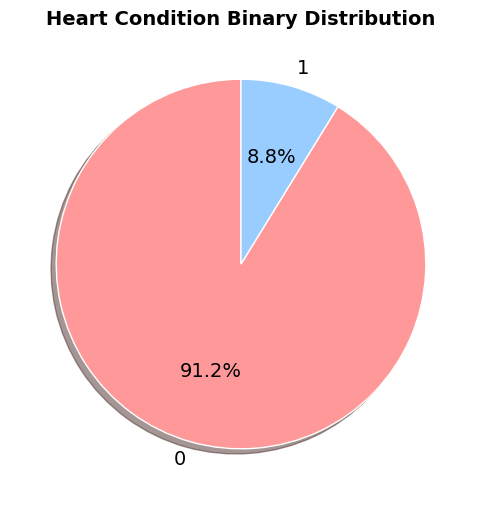

In [ ]:
labels = class_counts.index.astype(str)
sizes = class_counts.values
colors = ["#FF9999", "#99CCFF"]

fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    shadow=True,
    startangle=90,
    wedgeprops=dict(edgecolor='white'),
    textprops={'fontsize': 14}  # Adjust the font size as needed
)

ax.set_title("Heart Condition Binary Distribution", fontsize=14, fontweight="bold")

# Show plot
plt.show()


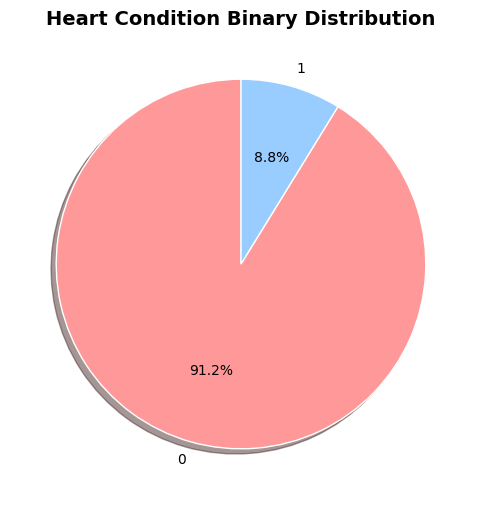

In [ ]:
labels = class_counts.index.astype(str)
sizes = class_counts.values
colors = ["#FF9999", "#99CCFF"]
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                  colors=colors, shadow=True, startangle=90,
                                  wedgeprops=dict(edgecolor='white'))
ax.set_title("Heart Condition Binary Distribution", fontsize=14, fontweight="bold")

# Show plot
plt.show()

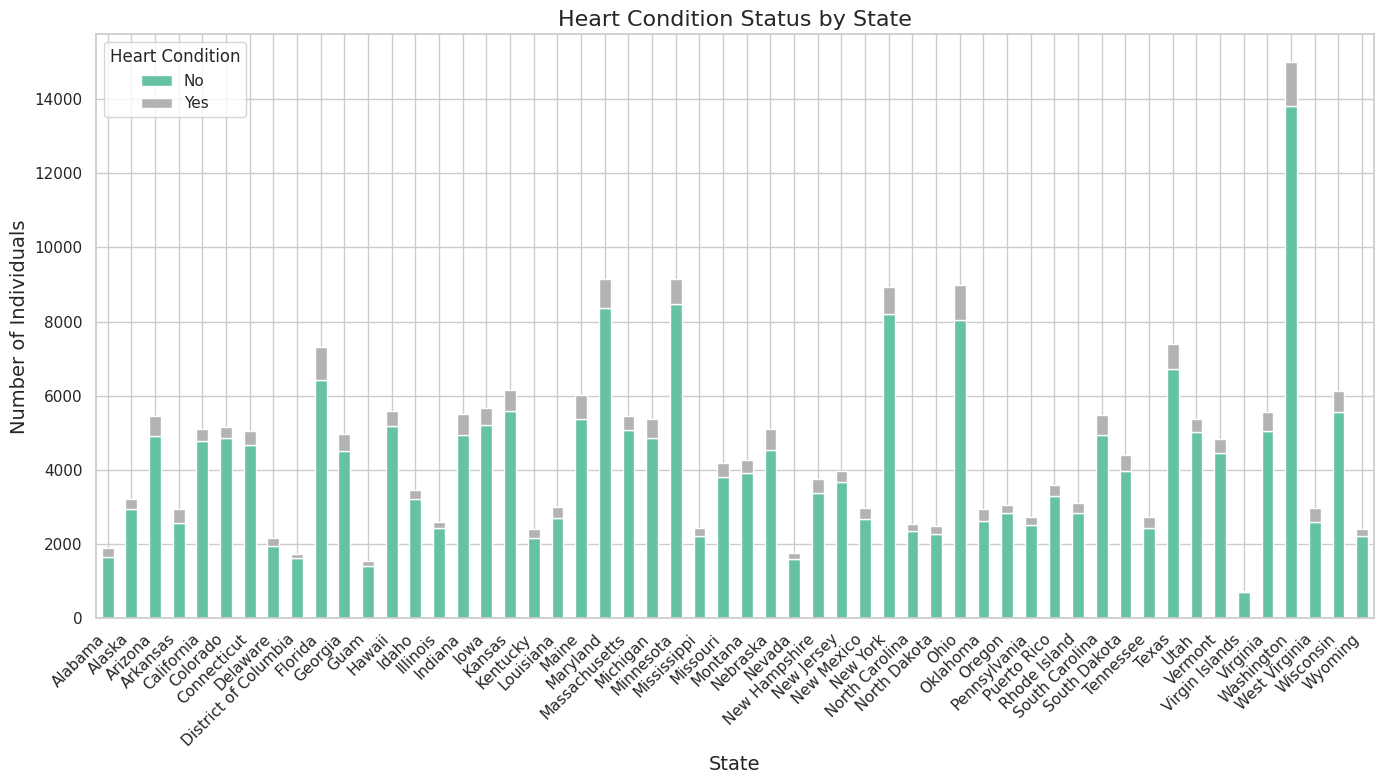

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_copy_eda' is your DataFrame and it contains 'State' and 'HeartConditionBinary' columns

# Create a contingency table
contingency_table = pd.crosstab(data_copy_eda['State'], data_copy_eda['HeartConditionBinary'])

# Plot the stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

# Customize the plot
plt.title('Heart Condition Status by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to prevent overlap
plt.legend(title='Heart Condition', labels=['No', 'Yes'])
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Display the plot
plt.show()


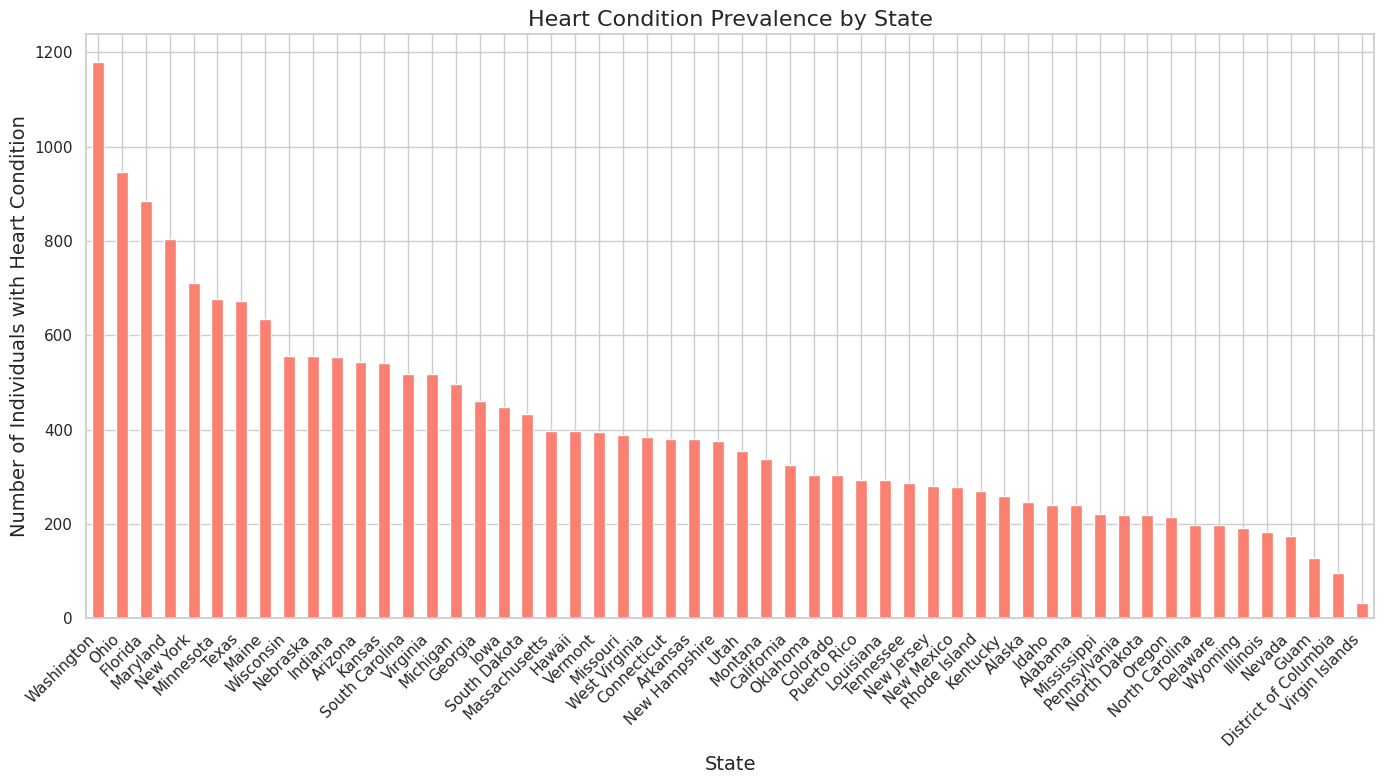

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to include only individuals with a heart condition
heart_condition_data = data_copy_eda[data_copy_eda['HeartConditionBinary'] == 1]

# Count the number of cases per state
state_counts = heart_condition_data['State'].value_counts().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
state_counts.plot(kind='bar', color='salmon')

# Customize the plot
plt.title('Heart Condition Prevalence by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Individuals with Heart Condition', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Display the plot
plt.show()

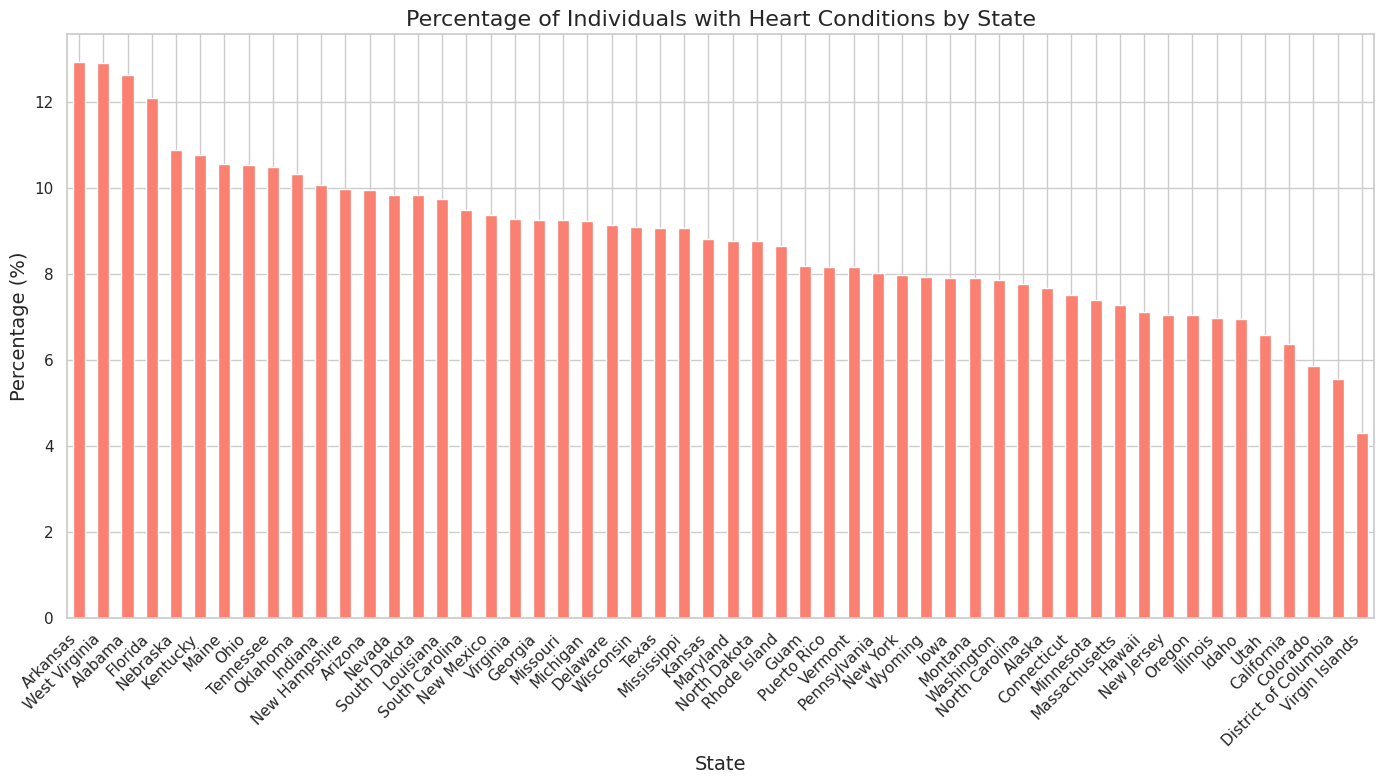

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_copy_eda' is your DataFrame with 'State' and 'HeartConditionBinary' columns

# Calculate the total number of individuals per state
total_per_state = data_copy_eda['State'].value_counts()

# Calculate the number of individuals with heart conditions per state
heart_condition_counts = data_copy_eda[data_copy_eda['HeartConditionBinary'] == 1]['State'].value_counts()

# Calculate the percentage of individuals with heart conditions per state
heart_condition_percentage = (heart_condition_counts / total_per_state) * 100

# Sort the percentages in descending order
heart_condition_percentage = heart_condition_percentage.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(14, 8))
heart_condition_percentage.plot(kind='bar', color='salmon')

# Customize the plot
plt.title('Percentage of Individuals with Heart Conditions by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Display the plot
plt.show()


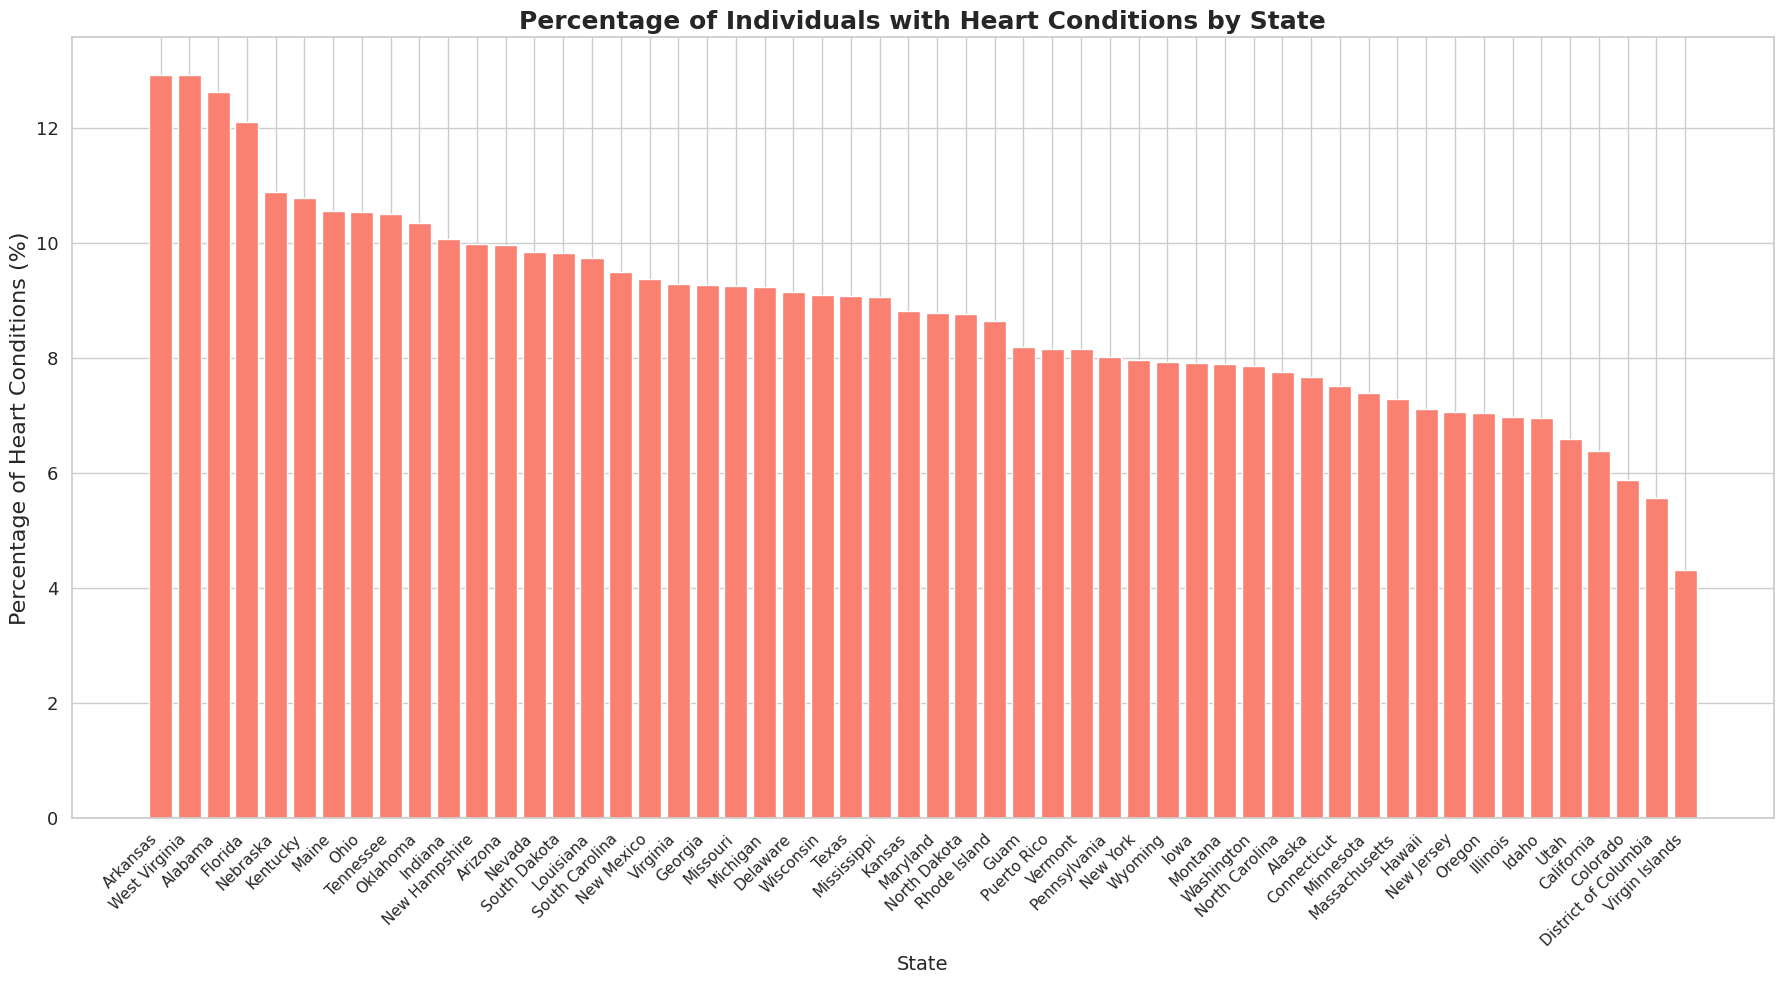

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the total number of individuals per state
total_per_state = data_copy_eda['State'].value_counts()

# Calculate the number of individuals with heart conditions per state
heart_condition_counts = data_copy_eda[data_copy_eda['HeartConditionBinary'] == 1]['State'].value_counts()

# Calculate the percentage of individuals with heart conditions per state
heart_condition_percentage = (heart_condition_counts / total_per_state) * 100

# Sort the percentages in descending order
heart_condition_percentage = heart_condition_percentage.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(18, 10))  # Larger figure to avoid label overlap
plt.bar(heart_condition_percentage.index, heart_condition_percentage.values, color='salmon')

# Customize the plot
plt.title('Percentage of Individuals with Heart Conditions by State', fontsize=18, fontweight='bold')
plt.xlabel('State', fontsize=14)
plt.ylabel('Percentage of Heart Conditions (%)', fontsize=16)  # Increased Y-axis label font size
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=13)  # Increase Y-tick font size

plt.tight_layout()  # Prevent label cutoff

# Display the plot
plt.show()



In [ ]:
print(data_copy_eda.columns)

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
       'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'HeartConditionBinary'],
      dtype='object')


In [ ]:
'''def chi_square_test(feature, target):
    contingency_table = pd.crosstab(data_copy1[feature], target)
    _, p, _, _ = chi2_contingency(contingency_table)
    return p

# Specify categorical columns
categorical_cols = ['RemovedTeeth', 'State', 'RaceEthnicityCategory','ECigaretteUsage']

# Perform chi-square test for each column and store results
results = {col: chi_square_test(col, data_copy1['HeartConditionBinary']) for col in categorical_cols}

# Display results
print("P-Values for Categorical Features:")
print(results)

# Filter significant features (p-value < 0.05)
significant_features = [col for col, p in results.items() if p < 0.05]
print("\nSignificant Features (P-Value < 0.05):")
print(significant_features)'''

'def chi_square_test(feature, target):\n    contingency_table = pd.crosstab(data_copy1[feature], target)\n    _, p, _, _ = chi2_contingency(contingency_table)\n    return p\n\n# Specify categorical columns\ncategorical_cols = [\'RemovedTeeth\', \'State\', \'RaceEthnicityCategory\',\'ECigaretteUsage\']\n\n# Perform chi-square test for each column and store results\nresults = {col: chi_square_test(col, data_copy1[\'HeartConditionBinary\']) for col in categorical_cols}\n\n# Display results\nprint("P-Values for Categorical Features:")\nprint(results)\n\n# Filter significant features (p-value < 0.05)\nsignificant_features = [col for col, p in results.items() if p < 0.05]\nprint("\nSignificant Features (P-Value < 0.05):")\nprint(significant_features)'

In [ ]:
# Performing Chi-Square test and storing results in a DataFrame for better observation
chi_square_results = []

# Loop through each categorical column and perform the test
for col in categorical_cols:
    if col in data_copy_eda.columns and col != 'HadHeartAttack' and col != 'HadAngina':
        # Create the contingency table
        contingency_table = pd.crosstab(data_copy_eda[col], data_copy_eda['HeartConditionBinary'])

        # Perform the Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Determine significance
        significant = 'Yes' if p < 0.05 else 'No'

        # Store results
        chi_square_results.append({"Variable": col, "P-Value": p, "Significant": significant})

# Convert the results to a DataFrame and sort by p-value
chi_square_df = pd.DataFrame(chi_square_results).sort_values(by='P-Value')

# Display the results
print("\nChi-Square Test Results:")
print(chi_square_df)


Chi-Square Test Results:
                     Variable        P-Value Significant
15    BlindOrVisionDifficulty   0.000000e+00         Yes
20               SmokerStatus   0.000000e+00         Yes
19          DifficultyErrands   0.000000e+00         Yes
18  DifficultyDressingBathing   0.000000e+00         Yes
17          DifficultyWalking   0.000000e+00         Yes
25            AlcoholDrinkers   0.000000e+00         Yes
14        DeafOrHardOfHearing   0.000000e+00         Yes
13                HadDiabetes   0.000000e+00         Yes
12               HadArthritis   0.000000e+00         Yes
24                AgeCategory   0.000000e+00         Yes
11           HadKidneyDisease   0.000000e+00         Yes
9                     HadCOPD   0.000000e+00         Yes
8               HadSkinCancer   0.000000e+00         Yes
28              PneumoVaxEver   0.000000e+00         Yes
6                   HadStroke   0.000000e+00         Yes
5                RemovedTeeth   0.000000e+00         Yes
4    

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Define response variable
response_var = 'HeartConditionBinary'

# Select only categorical variables
categorical_vars = data_copy_eda.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove response variable if it's in the categorical list
categorical_vars.remove(response_var) if response_var in categorical_vars else None

# Function to calculate Cramér’s V
def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total sample size
    min_dim = min(contingency_table.shape) - 1  # Minimum of (rows - 1, cols - 1)
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0  # Prevent division by zero

# Compute Cramér’s V for each categorical variable
cramers_v_scores = {}
for cat_var in categorical_vars:
    contingency_table = pd.crosstab(data_copy_eda[cat_var], data_copy_eda[response_var])
    cramers_v_scores[cat_var] = cramers_v(contingency_table)

# Get top 10 categorical variables based on Cramér’s V scores
top_categorical = pd.Series(cramers_v_scores).sort_values(ascending=False).head(5)

# Display the top 10 categorical features
print("\nTop 10 Categorical Variables Most Associated with Heart Condition (Using Cramér’s V):")
print(top_categorical)



Top 10 Categorical Variables Most Associated with Heart Condition (Using Cramér’s V):
GeneralHealth        0.242956
AgeCategory          0.241651
ChestScan            0.214637
DifficultyWalking    0.199082
RemovedTeeth         0.191091
dtype: float64


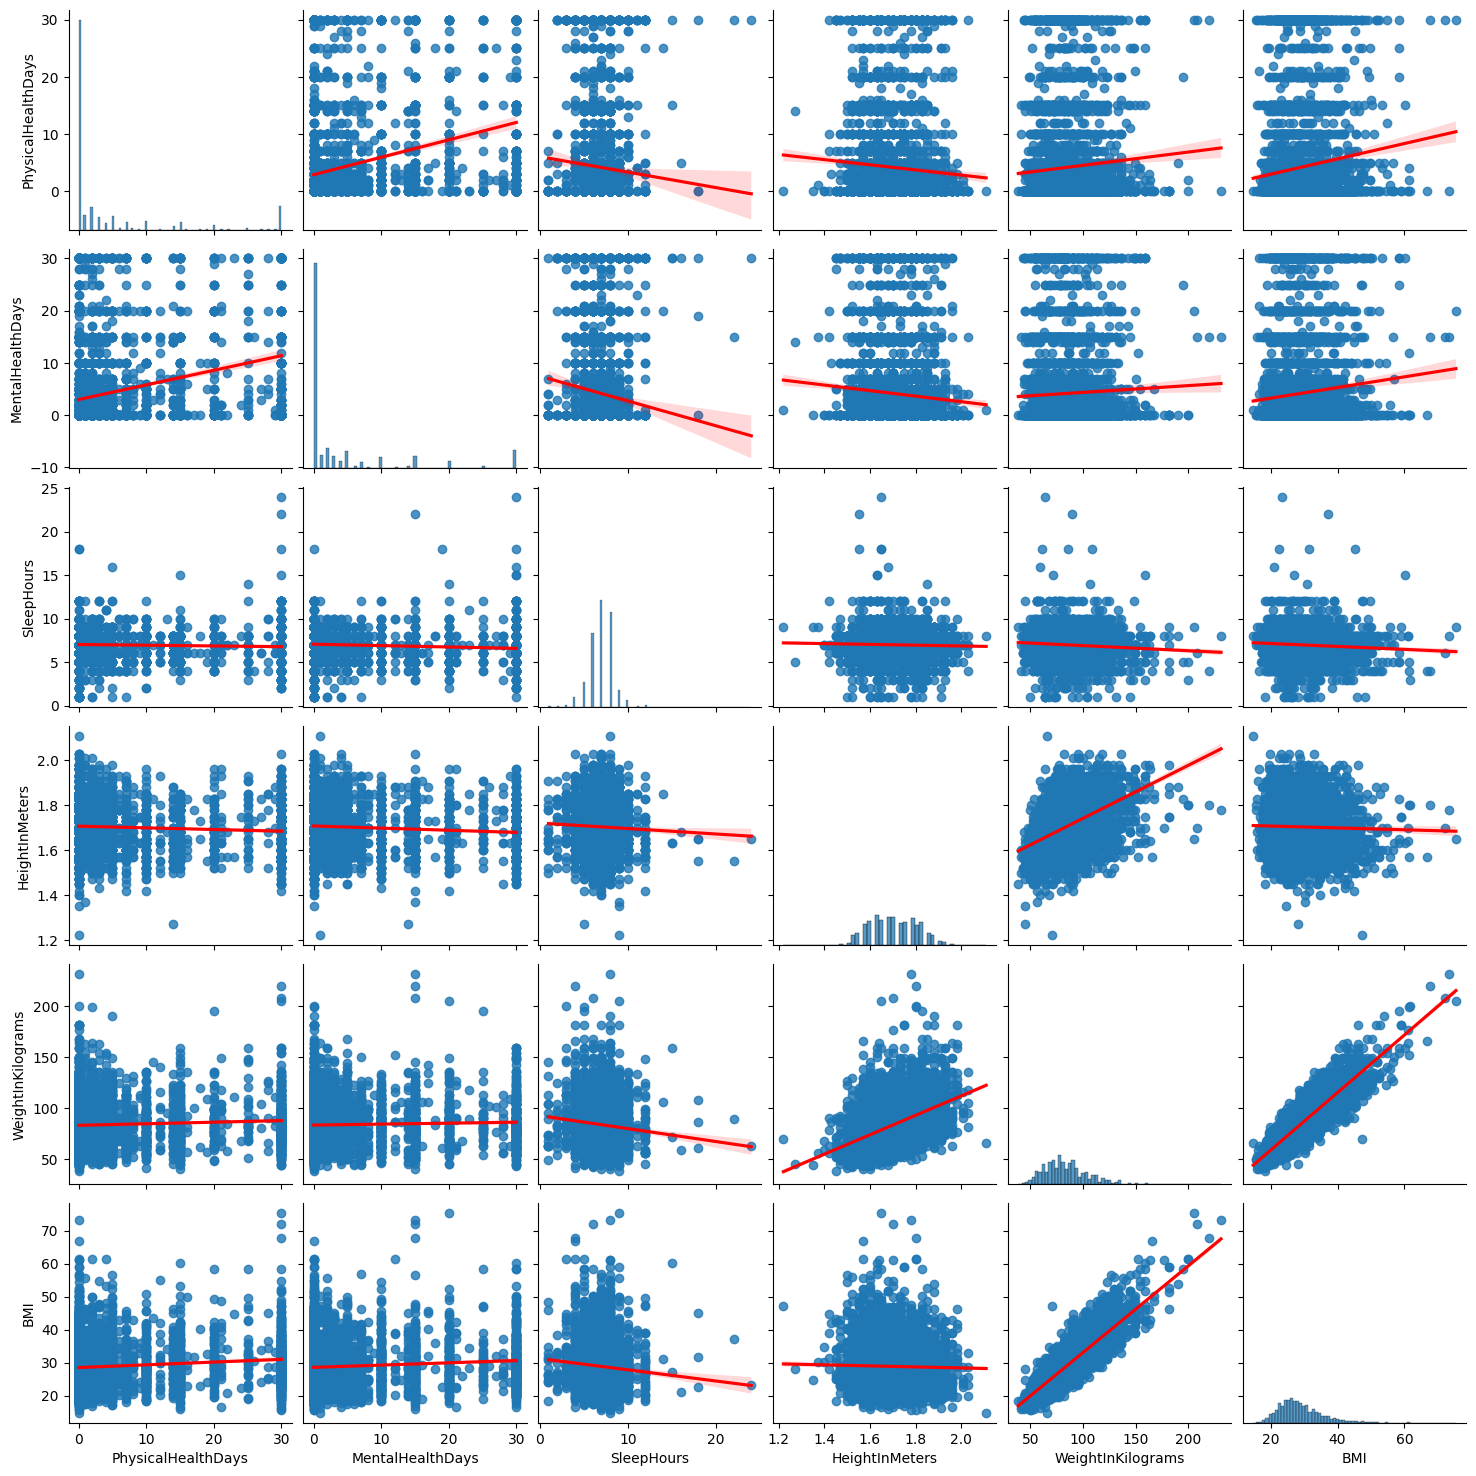

In [ ]:
sampled_data = data_copy_eda[numerical_cols].sample(n=5000, random_state=42)
sns.pairplot(sampled_data, kind="reg", plot_kws={'line_kws': {'color': 'red'}})
plt.show()

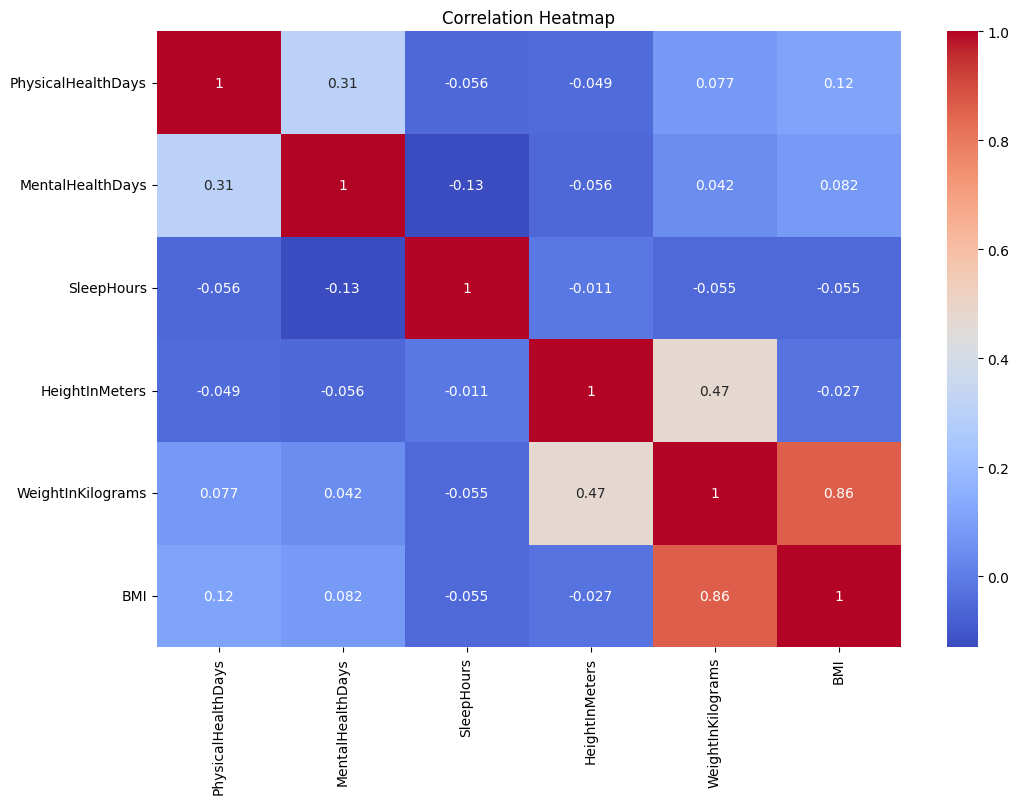

In [ ]:
# Correlation matrix for numerical columns
correlation_matrix = data_copy_eda[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

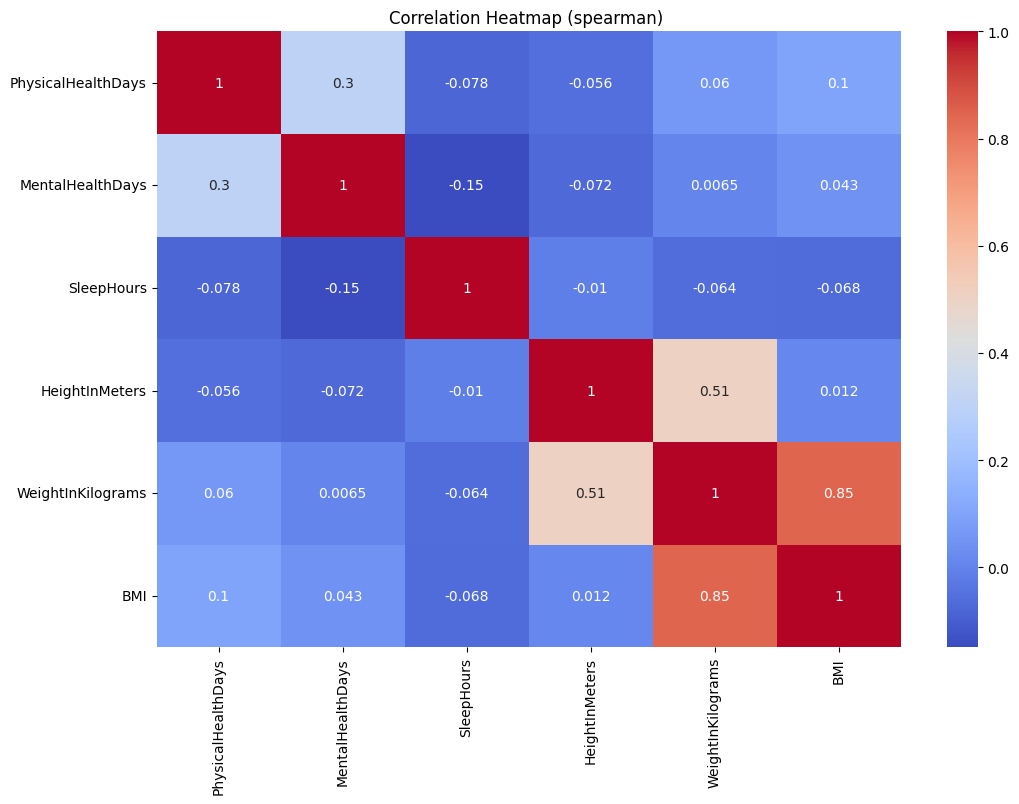

In [ ]:
spearman_corr = data_copy_eda[numerical_cols].corr(method="spearman")

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (spearman) ')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = numerical_data
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

              Feature        VIF
0  PhysicalHealthDays   1.383401
1    MentalHealthDays   1.421499
2          SleepHours  25.120125
3      HeightInMeters  48.029765
4   WeightInKilograms  76.954646
5                 BMI  72.675560


In [ ]:
!pip install dython

In [ ]:
categorical_cols = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'RemovedTeeth', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'SmokerStatus', 'AgeCategory', 'AlcoholDrinkers'
]


In [ ]:
'''from dython.nominal import associations
# Theil's U Correlation for Categorical Variables
valid_categorical_cols = [col for col in categorical_cols if col in data_copy_eda.columns]
theils_u_correlation = associations(data_copy_eda[valid_categorical_cols + ['HeartConditionBinary']], nominal_columns='all', figsize=(12, 8), compute_only=True)
theils_u_correlation_df = pd.DataFrame(theils_u_correlation['corr']).round(2)

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(theils_u_correlation_df, annot=True, cmap='coolwarm')
plt.title("Theil's U Correlation Heatmap for Categorical Variables")
plt.show()'''

'from dython.nominal import associations\n# Theil\'s U Correlation for Categorical Variables\nvalid_categorical_cols = [col for col in categorical_cols if col in data_copy_eda.columns]\ntheils_u_correlation = associations(data_copy_eda[valid_categorical_cols + [\'HeartConditionBinary\']], nominal_columns=\'all\', figsize=(12, 8), compute_only=True)\ntheils_u_correlation_df = pd.DataFrame(theils_u_correlation[\'corr\']).round(2)\n\n# Display the correlation matrix as a heatmap\nplt.figure(figsize=(12, 8))\nsns.heatmap(theils_u_correlation_df, annot=True, cmap=\'coolwarm\')\nplt.title("Theil\'s U Correlation Heatmap for Categorical Variables")\nplt.show()'

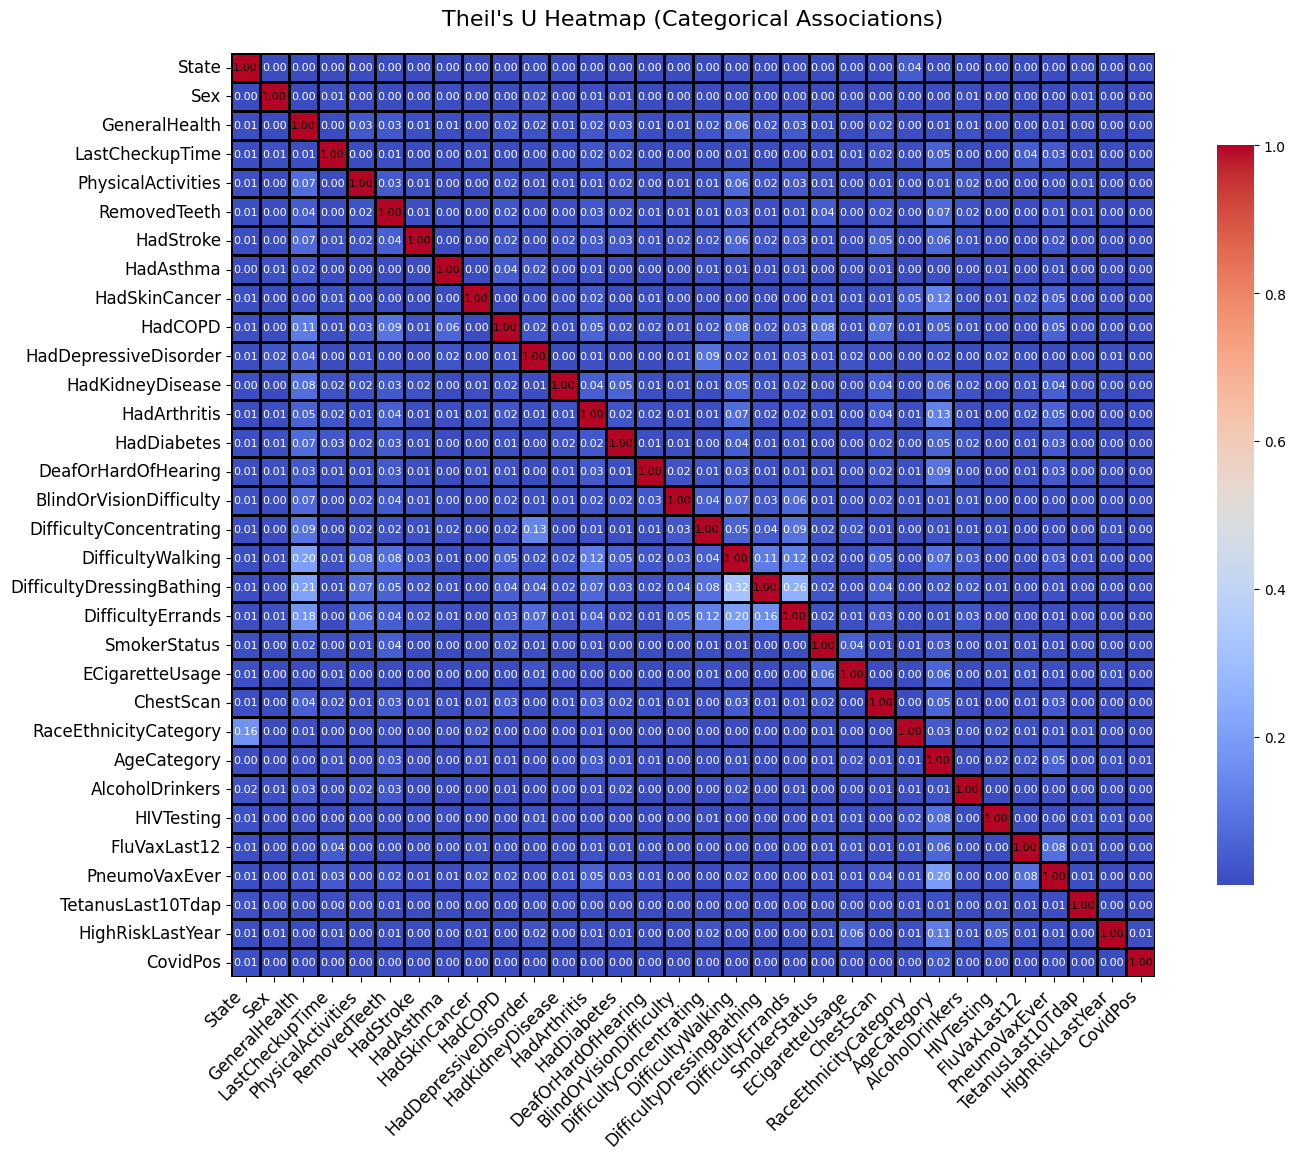

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Function to compute Theil's U (asymmetric uncertainty coefficient)
def theils_u(x, y):
    x_encoded = pd.factorize(x)[0]  # Convert categorical to numerical encoding
    y_encoded = pd.factorize(y)[0]
    mi = mutual_info_classif(x_encoded.reshape(-1, 1), y_encoded, discrete_features=True)[0]  # Mutual information
    hx = mutual_info_classif(x_encoded.reshape(-1, 1), x_encoded, discrete_features=True)[0]  # Entropy of x
    return mi / hx if hx > 0 else 0  # Theil's U formula

# Selecting only categorical variables
valid_categorical_cols = [col for col in data_copy_eda.select_dtypes(include=['object', 'category']).columns]

# Compute Theil's U for categorical variables
theils_u_matrix = pd.DataFrame(index=valid_categorical_cols, columns=valid_categorical_cols)

for col1 in valid_categorical_cols:
    for col2 in valid_categorical_cols:
        if col1 == col2:
            theils_u_matrix.loc[col1, col2] = 1.0  # Association with itself is 1
        else:
            theils_u_matrix.loc[col1, col2] = theils_u(data_copy_eda[col1], data_copy_eda[col2])

theils_u_matrix = theils_u_matrix.astype(float)

# Plot the heatmap with improved formatting
plt.figure(figsize=(16, 12))

ax = sns.heatmap(theils_u_matrix, annot=True, cmap='coolwarm', fmt=".2f",
                 linewidths=1, linecolor='black', square=True,
                 annot_kws={"size": 8}, cbar_kws={'shrink': 0.8})

# Improve readability by setting text color based on background brightness
for text in ax.texts:
    val = float(text.get_text())
    text.set_color("black" if val > 0.5 else "white")

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Theil's U Heatmap (Categorical Associations)", fontsize=16, pad=20)

plt.show()




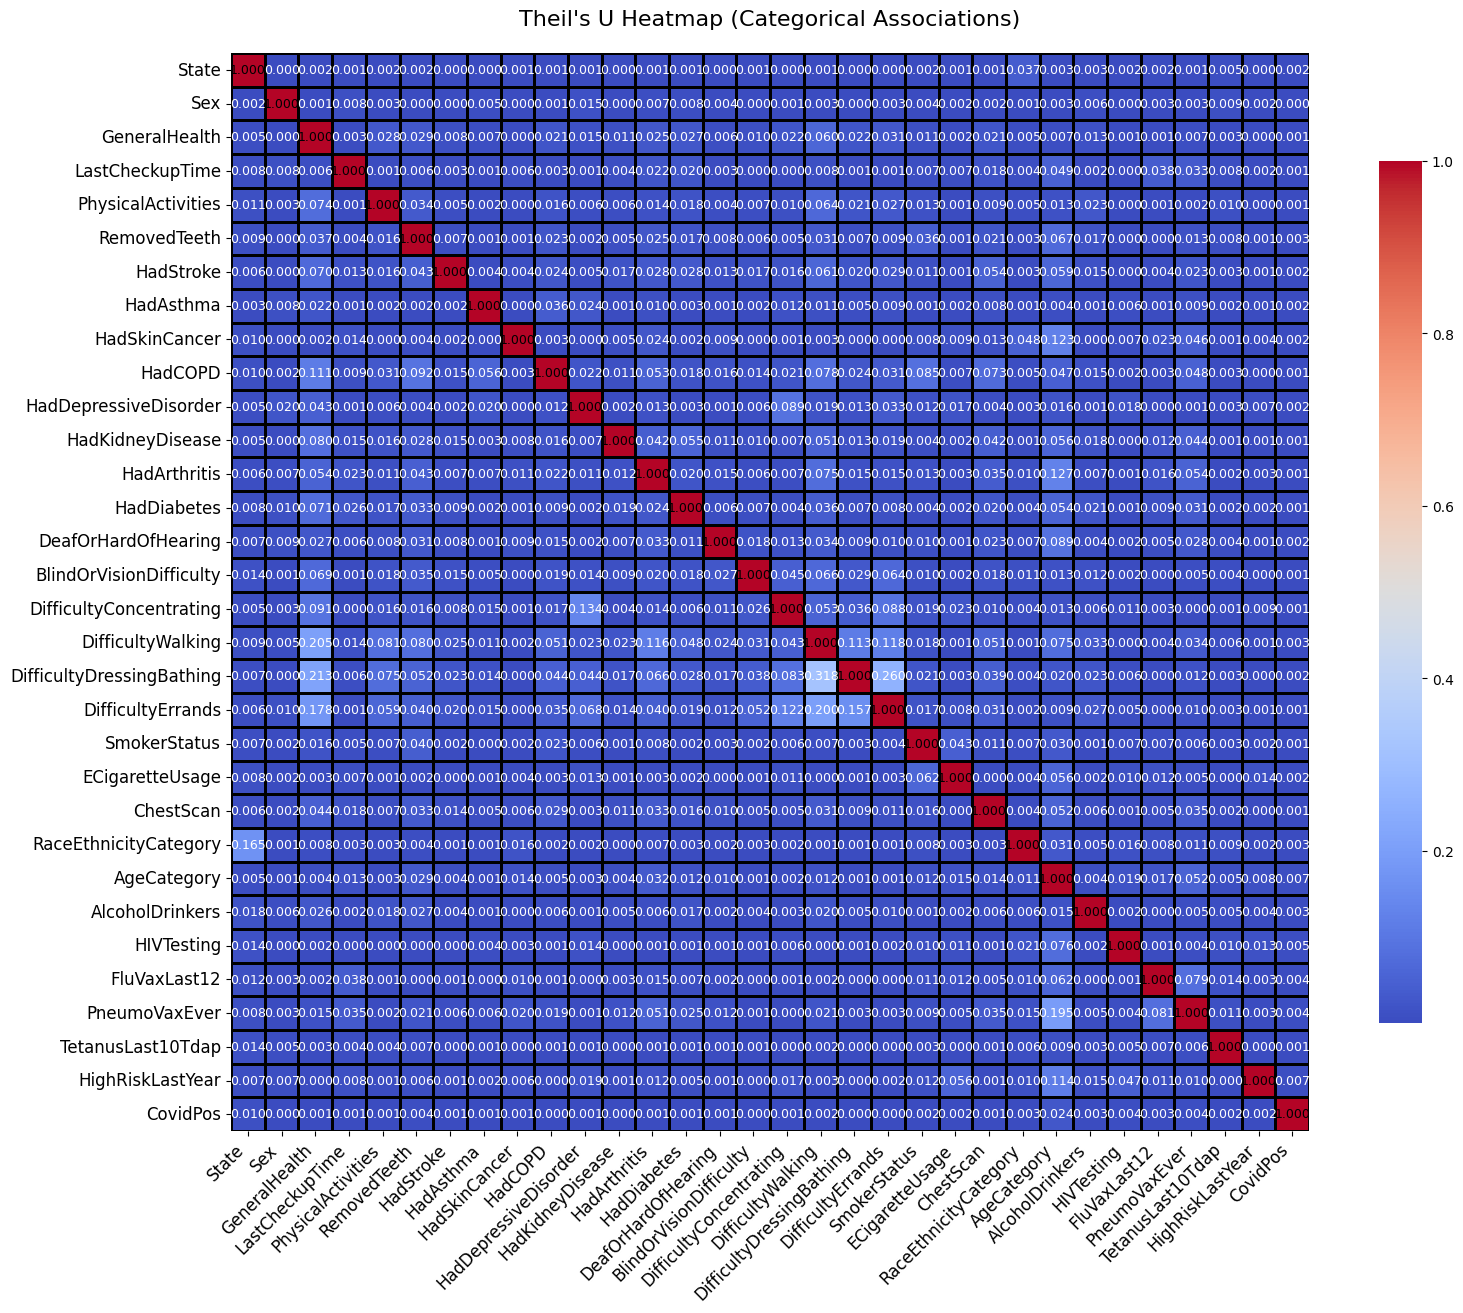

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Function to compute Theil's U (asymmetric uncertainty coefficient)
def theils_u(x, y):
    x_encoded = pd.factorize(x)[0]  # Convert categorical to numerical encoding
    y_encoded = pd.factorize(y)[0]
    mi = mutual_info_classif(x_encoded.reshape(-1, 1), y_encoded, discrete_features=True)[0]  # Mutual information
    hx = mutual_info_classif(x_encoded.reshape(-1, 1), x_encoded, discrete_features=True)[0]  # Entropy of x
    return mi / hx if hx > 0 else 0  # Theil's U formula

# Selecting only categorical variables
valid_categorical_cols = [col for col in data_copy_eda.select_dtypes(include=['object', 'category']).columns]

# Compute Theil's U for categorical variables
theils_u_matrix = pd.DataFrame(index=valid_categorical_cols, columns=valid_categorical_cols)

for col1 in valid_categorical_cols:
    for col2 in valid_categorical_cols:
        if col1 == col2:
            theils_u_matrix.loc[col1, col2] = 1.0  # Association with itself is 1
        else:
            theils_u_matrix.loc[col1, col2] = theils_u(data_copy_eda[col1], data_copy_eda[col2])

theils_u_matrix = theils_u_matrix.astype(float)

# Plot the heatmap with improved formatting
plt.figure(figsize=(18, 14))

ax = sns.heatmap(theils_u_matrix, annot=True, cmap='coolwarm', fmt=".3f",
                 linewidths=1, linecolor='black', square=True,
                 annot_kws={"size": 9}, cbar_kws={'shrink': 0.8})

# Improve readability by setting text color based on background brightness
for text in ax.texts:
    val = float(text.get_text())
    text.set_color("black" if val > 0.5 else "white")

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Theil's U Heatmap (Categorical Associations)", fontsize=16, pad=20)

plt.show()


In [ ]:
!pip install adjustText

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

# Create graph
G = nx.Graph()

# Extract associations into a list
assoc_list = [
    (col1, col2, cramers_v_matrix.loc[col1, col2])
    for col1 in valid_categorical_cols
    for col2 in valid_categorical_cols if col1 != col2
]

# Sort by highest association and extract top 10
top_assoc = sorted(assoc_list, key=lambda x: x[2], reverse=True)[:10]
top_assoc_set = {(x[0], x[1]) for x in top_assoc}  # Store top 10 as set for quick lookup

# Add all relationships to the graph
for col1, col2, weight in assoc_list:
    G.add_edge(col1, col2, weight=weight)

# Position nodes with optimized spacing
pos = nx.spring_layout(G, k=2.2, seed=42)  # Well-spaced layout

plt.figure(figsize=(18, 14))

# Extract edge properties
edges = G.edges(data=True)
weights = np.array([d['weight'] * 8 for (_, _, d) in edges])  # Scale edge thickness
edge_colors = []
edge_styles = []

for (node1, node2, d) in edges:
    if (node1, node2) in top_assoc_set or (node2, node1) in top_assoc_set:
        edge_colors.append('red')  # Highlight top 10 associations in red
        edge_styles.append(3)  # Make top edges thicker
    else:
        edge_colors.append('gray')  # Keep other edges gray
        edge_styles.append(1.5)  # Thinner for weaker associations

# Draw nodes with distinct boundaries
nx.draw_networkx_nodes(G, pos, node_size=3500, node_color='skyblue', edgecolors='black', alpha=0.9)

# Draw all edges (gray for weak, red for top 10)
nx.draw_networkx_edges(G, pos, width=edge_styles, edge_color=edge_colors, alpha=0.6)

# Adjust text labels dynamically (medium font, no bold, no bounding box)
texts = [
    plt.text(pos[k][0], pos[k][1], k, fontsize=10, ha='center', va='center')
    for k in G.nodes()
]

# Ensure labels do not overlap
adjust_text(texts, force_points=0.6, force_text=0.7, expand_points=(1.2, 1.2),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.3))

# Title and display
plt.title("Categorical Association Network (Cramér's V) - Highlighting Top 10", fontsize=18, pad=20)
plt.show()




NameError: name 'cramers_v_matrix' is not defined

#Smoking & Alcohol consumption

In [ ]:
cross_tabs = {
    'SmokerStatus': pd.crosstab(data_copy_eda['SmokerStatus'], data_copy_eda['HeartConditionBinary']),
    'ECigaretteUsage': pd.crosstab(data_copy_eda['ECigaretteUsage'], data_copy_eda['HeartConditionBinary']),
    'AlcoholDrinkers': pd.crosstab(data_copy_eda['AlcoholDrinkers'], data_copy_eda['HeartConditionBinary'])
}

# Display Cross-tabulation results
for key, table in cross_tabs.items():
    print(f"\nCross-tabulation for {key}:\n")
    display(table)

  #, normalize='index'


Cross-tabulation for SmokerStatus:



HeartConditionBinary                        0     1
SmokerStatus                                       
Current smoker - now smokes every day   19188  2471
Current smoker - now smokes some days    7326   773
Former smoker                           59627  8897
Never smoked                           138256  9475


Cross-tabulation for ECigaretteUsage:



HeartConditionBinary                            0      1
ECigaretteUsage                                         
Never used e-cigarettes in my entire life  172816  17303
Not at all (right now)                      39617   3664
Use them every day                           5689    266
Use them some days                           6275    383


Cross-tabulation for AlcoholDrinkers:



HeartConditionBinary       0      1
AlcoholDrinkers                    
No                     98061  12653
Yes                   126336   8963

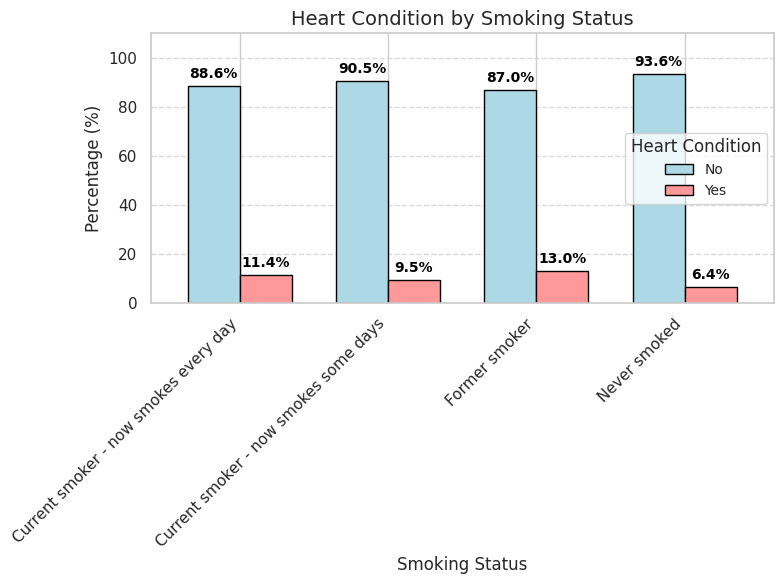

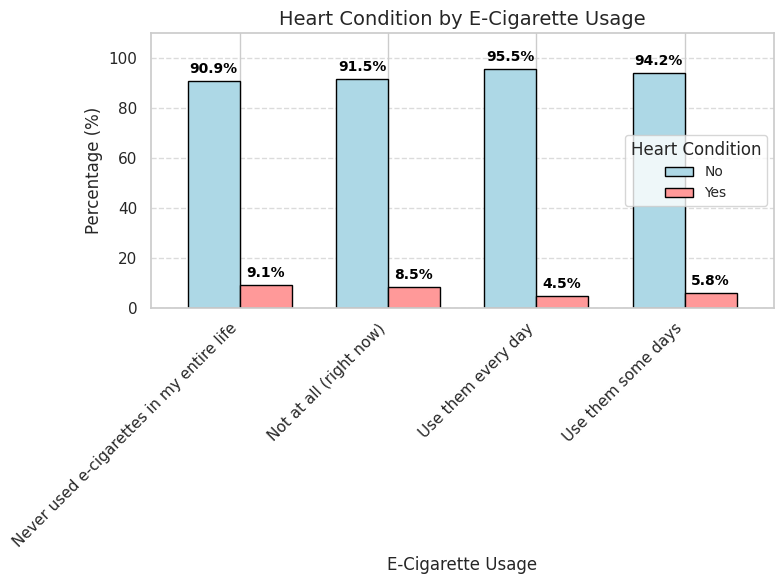

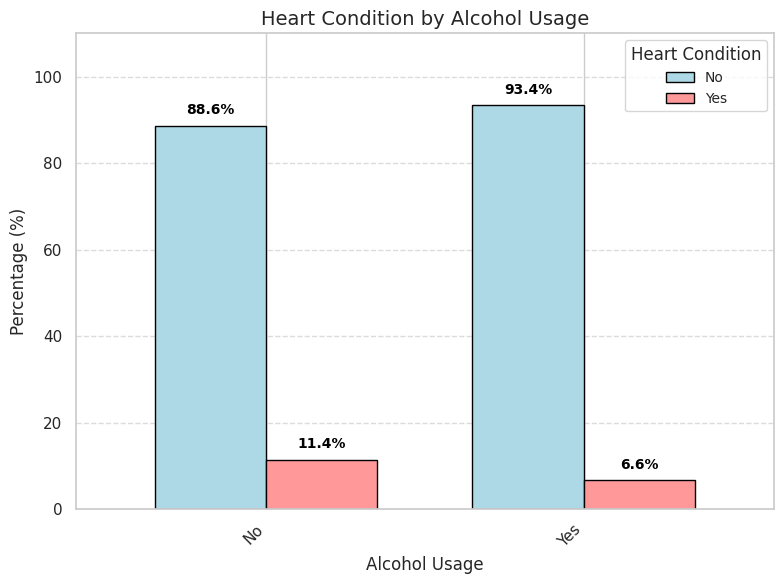

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define consistent colors: light blue for No, light red for Yes
heart_condition_colors = ['#ADD8E6', '#FF9999']  # light blue, light red

# Function to create percentage-based crosstab
def create_percentage_crosstab(df, col, target):
    return pd.crosstab(df[col], df[target], normalize='index') * 100

# Reusable plotting function
def plot_percentage_bar(data, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(8, 6))

    data.plot(kind='bar', ax=ax, color=heart_condition_colors, edgecolor='black', width=0.7)

    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend(title="Heart Condition", labels=["No", "Yes"], fontsize=10)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                        (p.get_x() + p.get_width() / 2, height + 2),
                        ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 110)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Generate plots
plot_percentage_bar(create_percentage_crosstab(data_copy_eda, 'SmokerStatus', 'HeartConditionBinary'),
                    "Heart Condition by Smoking Status", "Smoking Status", "Percentage (%)")

plot_percentage_bar(create_percentage_crosstab(data_copy_eda, 'ECigaretteUsage', 'HeartConditionBinary'),
                    "Heart Condition by E-Cigarette Usage", "E-Cigarette Usage", "Percentage (%)")

plot_percentage_bar(create_percentage_crosstab(data_copy_eda, 'AlcoholDrinkers', 'HeartConditionBinary'),
                    "Heart Condition by Alcohol Usage", "Alcohol Usage", "Percentage (%)")


In [ ]:
def cramers_v(col):
    contingency_table = pd.crosstab(data_copy_eda[col], data_copy_eda['HeartConditionBinary'])
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compute Cramér’s V
cramers_v_results = [{"Variable": col, "Cramér's V": cramers_v(col)} for col in ['SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers']]

# Convert to DataFrame and display results
cramers_v_df = pd.DataFrame(cramers_v_results).sort_values(by="Cramér's V", ascending=False)
print("\nCramér's V Test Results (Strength of Association):")
display(cramers_v_df)


Cramér's V Test Results (Strength of Association):


Variable  Cramér's V
0     SmokerStatus    0.105452
2  AlcoholDrinkers    0.084407
1  ECigaretteUsage    0.031504

In [ ]:
for col in categorical_cols:
    if col != 'AlcoholDrinkers':
        print(f"\nAnalyzing {col} vs AlcoholDrinkers:")
        print(pd.crosstab(data_copy_eda[col], data_copy_eda['AlcoholDrinkers'], normalize='index'))


Analyzing State vs AlcoholDrinkers:
AlcoholDrinkers             No       Yes
State                                   
Alabama               0.589905  0.410095
Alaska                0.429953  0.570047
Arizona               0.480864  0.519136
Arkansas              0.569728  0.430272
California            0.404827  0.595173
Colorado              0.352394  0.647606
Connecticut           0.361172  0.638828
Delaware              0.455220  0.544780
District of Columbia  0.295652  0.704348
Florida               0.464252  0.535748
Georgia               0.510848  0.489152
Guam                  0.559070  0.440930
Hawaii                0.473016  0.526984
Idaho                 0.511534  0.488466
Illinois              0.400077  0.599923
Indiana               0.485278  0.514722
Iowa                  0.427715  0.572285
Kansas                0.467209  0.532791
Kentucky              0.675093  0.324907
Louisiana             0.472425  0.527575
Maine                 0.440545  0.559455
Maryland            

#AGE & Gender

In [ ]:
for col in ['AgeCategory', 'Sex']:
    print(f"\nAnalyzing stratification by {col}:")
    print(pd.crosstab([data_copy_eda['AlcoholDrinkers'], data_copy_eda[col]], data_copy_eda['HeartConditionBinary']))

#, normalize='index'


Analyzing stratification by AgeCategory:
HeartConditionBinary                 0     1
AlcoholDrinkers AgeCategory                 
No              Age 18 to 24      5749    39
                Age 25 to 29      3552    40
                Age 30 to 34      4653    67
                Age 35 to 39      5669   124
                Age 40 to 44      6373   174
                Age 45 to 49      6410   352
                Age 50 to 54      7643   622
                Age 55 to 59      8783   998
                Age 60 to 64     10734  1427
                Age 65 to 69     11735  1987
                Age 70 to 74     10768  2282
                Age 75 to 79      7790  1963
                Age 80 or older   8202  2578
Yes             Age 18 to 24      7284    50
                Age 25 to 29      7462    55
                Age 30 to 34      8544    82
                Age 35 to 39      9702   119
                Age 40 to 44     10239   187
                Age 45 to 49      9730   261
             

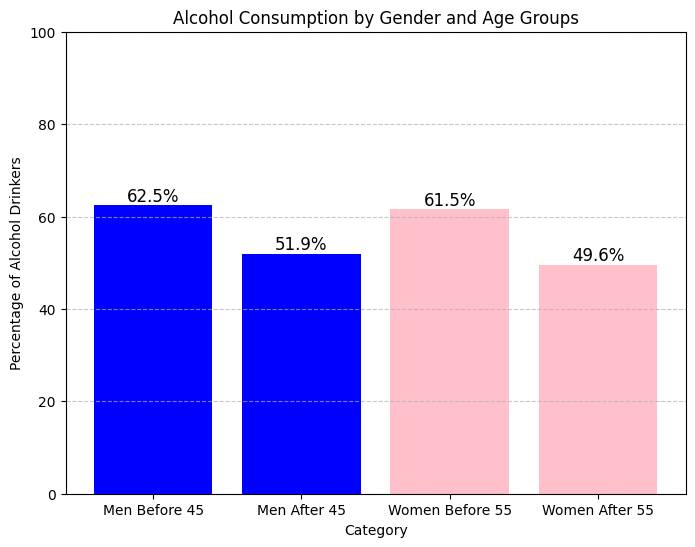

In [ ]:
import matplotlib.pyplot as plt

# Manually re-creating the age-alcohol proportion data
age_category = [
    "Age 18 to 24", "Age 25 to 29", "Age 30 to 34", "Age 35 to 39",
    "Age 40 to 44", "Age 45 to 49", "Age 50 to 54", "Age 55 to 59",
    "Age 60 to 64", "Age 65 to 69", "Age 70 to 74", "Age 75 to 79",
    "Age 80 or older"
]

alcohol_drinkers_yes = [
    0.558909, 0.676659, 0.646336, 0.628987,
    0.614270, 0.596371, 0.584924, 0.559890,
    0.544856, 0.519454, 0.492948, 0.462141,
    0.394926
]

# Converting to dictionary format to simulate dataset behavior
age_alcohol_data = dict(zip(age_category, alcohol_drinkers_yes))

# Calculating proportions for the required categories
men_before_45 = sum([age_alcohol_data[age] for age in [
    "Age 18 to 24", "Age 25 to 29", "Age 30 to 34", "Age 35 to 39", "Age 40 to 44"
]]) / 5

men_after_45 = sum([age_alcohol_data[age] for age in [
    "Age 45 to 49", "Age 50 to 54", "Age 55 to 59", "Age 60 to 64", "Age 65 to 69",
    "Age 70 to 74", "Age 75 to 79", "Age 80 or older"
]]) / 8

women_before_55 = sum([age_alcohol_data[age] for age in [
    "Age 18 to 24", "Age 25 to 29", "Age 30 to 34", "Age 35 to 39", "Age 40 to 44",
    "Age 45 to 49", "Age 50 to 54"
]]) / 7

women_after_55 = sum([age_alcohol_data[age] for age in [
    "Age 55 to 59", "Age 60 to 64", "Age 65 to 69", "Age 70 to 74",
    "Age 75 to 79", "Age 80 or older"
]]) / 6

# Creating a bar plot without using a DataFrame
categories = ["Men Before 45", "Men After 45", "Women Before 55", "Women After 55"]
values = [men_before_45, men_after_45, women_before_55, women_after_55]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, [v * 100 for v in values], color=['blue', 'blue', 'pink', 'pink'])

# Adding percentage values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=12)

plt.xlabel("Category")
plt.ylabel("Percentage of Alcohol Drinkers")
plt.title("Alcohol Consumption by Gender and Age Groups")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# Count the number of alcohol consumers within each HeartConditionBinary category
heart_condition_counts = pd.crosstab(data_copy_eda["HeartConditionBinary"], data_copy_eda["AlcoholDrinkers"])

# Display the results
print(heart_condition_counts)


AlcoholDrinkers          No     Yes
HeartConditionBinary               
0                     98061  126336
1                     12653    8963


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of potential confounders (all categorical variables except AlcoholDrinkers)
categorical_cols = [
    'State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'RemovedTeeth', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'SmokerStatus', 'AgeCategory'
]

# Function to perform Chi-Square test
def chi_square_test(df, col, target):
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return {"Variable": col, "P-Value": p, "Significant": "Yes" if p < 0.05 else "No"}

# Step 1: Find variables associated with Alcohol Use
chi_square_results_alcohol = [chi_square_test(data_copy_eda, col, 'AlcoholDrinkers') for col in categorical_cols]
chi_square_df_alcohol = pd.DataFrame(chi_square_results_alcohol).sort_values(by='P-Value')

# Step 2: Find variables associated with Heart Condition
chi_square_results_heart = [chi_square_test(data_copy_eda, col, 'HeartConditionBinary') for col in categorical_cols]
chi_square_df_heart = pd.DataFrame(chi_square_results_heart).sort_values(by='P-Value')

# Display results
print("\nChi-Square Test Results for Alcohol Use (Confounder Check):")
print(chi_square_df_alcohol)

print("\nChi-Square Test Results for Heart Condition:")
print(chi_square_df_heart)



Chi-Square Test Results for Alcohol Use (Confounder Check):
                 Variable        P-Value Significant
0                   State   0.000000e+00         Yes
1                     Sex   0.000000e+00         Yes
2           GeneralHealth   0.000000e+00         Yes
4      PhysicalActivities   0.000000e+00         Yes
5            RemovedTeeth   0.000000e+00         Yes
10       HadKidneyDisease   0.000000e+00         Yes
11           HadArthritis   0.000000e+00         Yes
13            AgeCategory   0.000000e+00         Yes
6               HadStroke  1.207779e-272         Yes
3         LastCheckupTime  2.090804e-164         Yes
12           SmokerStatus   5.356219e-91         Yes
9   HadDepressiveDisorder   7.984519e-54         Yes
7               HadAsthma   1.324798e-49         Yes
8           HadSkinCancer   1.241763e-08         Yes

Chi-Square Test Results for Heart Condition:
                 Variable        P-Value Significant
1                     Sex   0.000000e+00     

In [ ]:
# Filter datasets for Smokers and Non-Smokers
active = data_copy_eda[data_copy_eda['PhysicalActivities'] == 'Yes']
non_active = data_copy_eda[data_copy_eda['PhysicalActivities'] == 'No']

# Cross-tabulation for Smokers
print("\nHeart Condition by physical activity (Among active):")
print(pd.crosstab(active['PhysicalActivities'], active['HeartConditionBinary'], normalize='index') * 100)

# Cross-tabulation for Non-Smokers
print("\nHeart Condition by physical activity (Among Non-active):")
print(pd.crosstab(non_active['PhysicalActivities'], non_active['HeartConditionBinary'], normalize='index') * 100)



Heart Condition by physical activity (Among active):
HeartConditionBinary          0         1
PhysicalActivities                       
Yes                   92.664785  7.335215

Heart Condition by physical activity (Among Non-active):
HeartConditionBinary          0          1
PhysicalActivities                        
No                    86.137872  13.862128


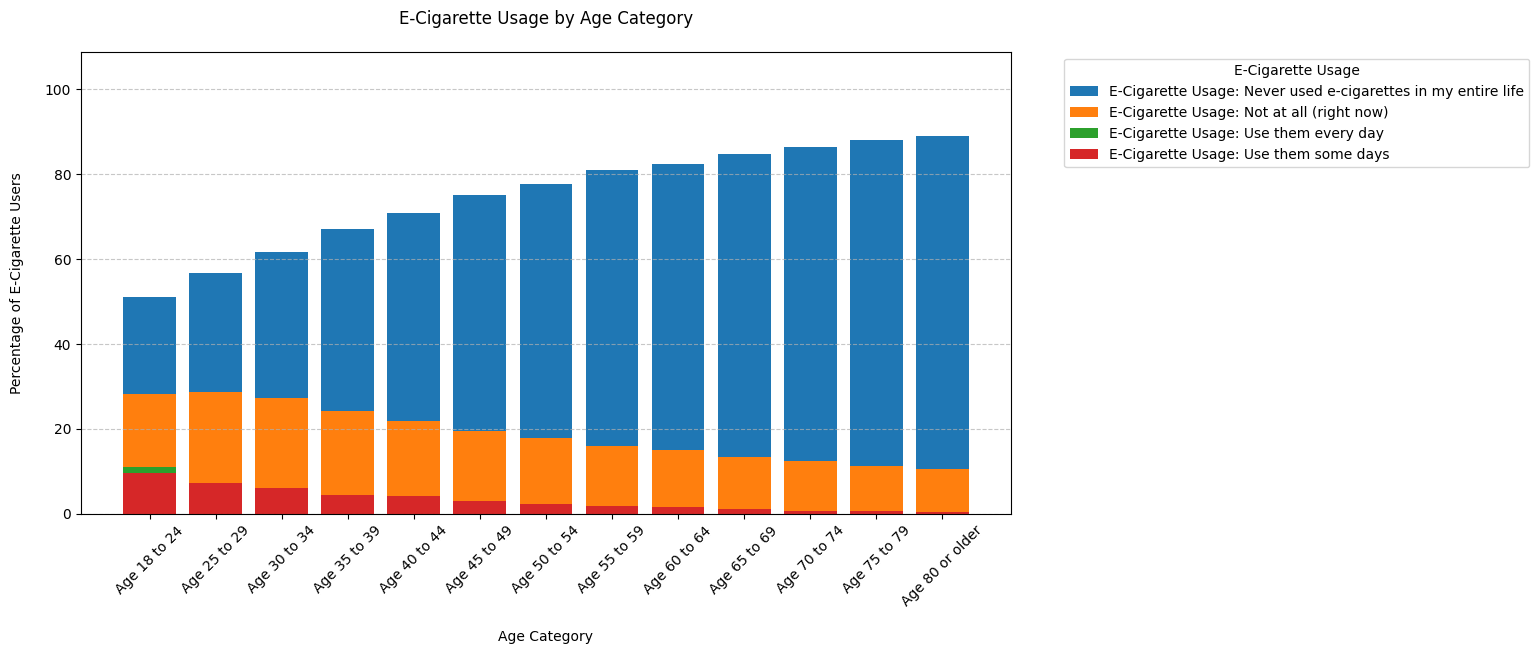

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the percentage of e-cigarette users within each age category
ecig_age_percentages = pd.crosstab(data_copy_eda["AgeCategory"], data_copy_eda["ECigaretteUsage"], normalize="index") * 100

# Plot e-cigarette usage by age category (NO STACKED BARS)
plt.figure(figsize=(12, 6))

bars = []
for category in ecig_age_percentages.columns:
    bars.append(plt.bar(ecig_age_percentages.index, ecig_age_percentages[category], label=f"E-Cigarette Usage: {category}"))

# Adjusting y-axis limit to avoid cutting bars
plt.ylim(0, max(ecig_age_percentages.max()) + 20)  # Added extra space above bars

# Moving labels **outside the plot** to avoid overlapping
plt.xlabel("Age Category", labelpad=15)
plt.ylabel("Percentage of E-Cigarette Users", labelpad=15)
plt.title("E-Cigarette Usage by Age Category", pad=20)
plt.xticks(rotation=45)
plt.legend(title="E-Cigarette Usage", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Total individuals per AgeCategory and Sex
total_by_age_sex = data_copy_eda.groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)

# Heart condition positives per AgeCategory and Sex
positive_by_age_sex = data_copy_eda[data_copy_eda['HeartConditionBinary'] == 1].groupby(['AgeCategory', 'Sex']).size().unstack(fill_value=0)

# Combine into one DataFrame
summary_df = pd.DataFrame({
    'Female_Total': total_by_age_sex.get('Female', 0),
    'Female_Positive': positive_by_age_sex.get('Female', 0),
    'Male_Total': total_by_age_sex.get('Male', 0),
    'Male_Positive': positive_by_age_sex.get('Male', 0)
}).fillna(0).astype(int)

# Optional: sort by AgeCategory order
age_order = [
    'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44',
    'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69',
    'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older'
]
summary_df = summary_df.reindex(age_order)

# Display the result
print("\n✅ Detailed Breakdown: Total and Positive Cases by Age and Sex")
print(summary_df)



✅ Detailed Breakdown: Total and Positive Cases by Age and Sex
                 Female_Total  Female_Positive  Male_Total  Male_Positive
AgeCategory                                                              
Age 18 to 24             5605               30        7517             59
Age 25 to 29             5155               43        5954             52
Age 30 to 34             6576               63        6770             86
Age 35 to 39             7961              112        7653            131
Age 40 to 44             8933              159        8040            202
Age 45 to 49             8671              283        8082            330
Age 50 to 54            10409              446        9503            584
Age 55 to 59            11533              668       10691            985
Age 60 to 64            14237              960       12482           1502
Age 65 to 69            14896             1228       13659           2210
Age 70 to 74            13509             1390   


Heart Condition Percentage by Age and Sex:
Sex              Female    Male
AgeCategory                    
Age 18 to 24      0.54%   0.78%
Age 25 to 29      0.83%   0.87%
Age 30 to 34      0.96%   1.27%
Age 35 to 39      1.41%   1.71%
Age 40 to 44      1.78%   2.51%
Age 45 to 49      3.26%   4.08%
Age 50 to 54      4.28%   6.15%
Age 55 to 59      5.79%   9.21%
Age 60 to 64      6.74%  12.03%
Age 65 to 69      8.24%  16.18%
Age 70 to 74     10.29%  21.09%
Age 75 to 79     13.46%  25.64%
Age 80 or older  17.91%  29.81%


<ipython-input-81-6a1089396423>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_table = age_sex_heart_condition.applymap(lambda x: f"{x:.2f}%")


<Figure size 1200x600 with 0 Axes>

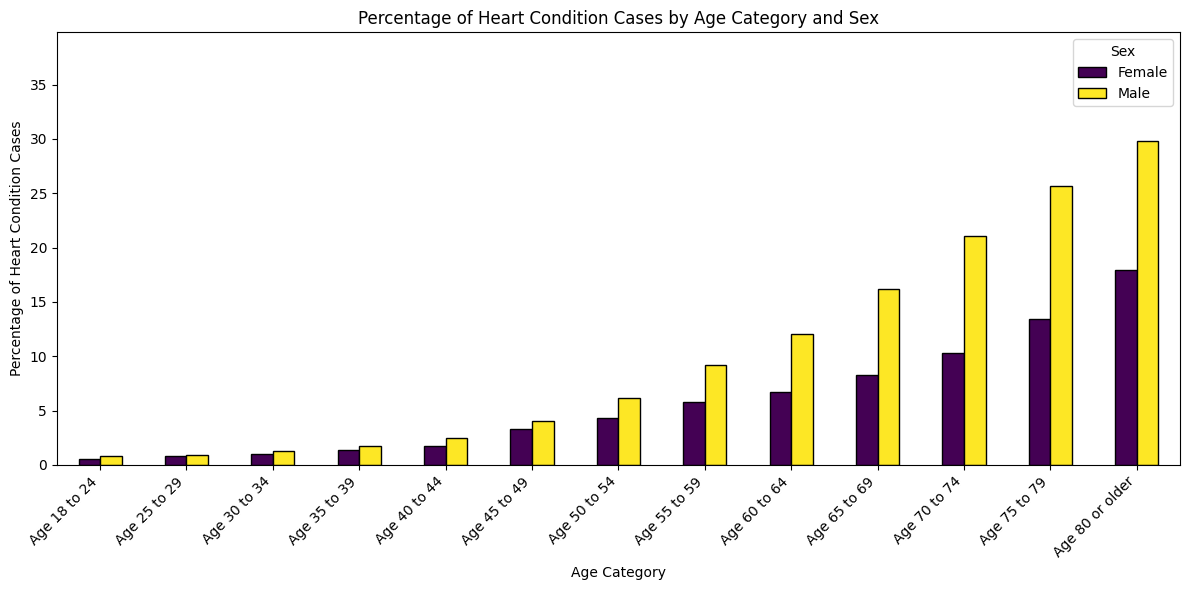

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouping by AgeCategory and Sex, then calculating mean heart condition percentage
age_sex_heart_condition = data_copy_eda.groupby(['AgeCategory', 'Sex'])['HeartConditionBinary'].mean().unstack() * 100

# Convert values to percentage format (without rounding)
formatted_table = age_sex_heart_condition.applymap(lambda x: f"{x:.2f}%")

# Display computed values for the bars (as percentages)
print("\nHeart Condition Percentage by Age and Sex:")
print(formatted_table)

# Plot the bar chart (without values in the plot)
plt.figure(figsize=(12, 6))
ax = age_sex_heart_condition.plot(kind='bar', figsize=(12,6), colormap='viridis', edgecolor='black')

plt.title('Percentage of Heart Condition Cases by Age Category and Sex')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Condition Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels to prevent overlap
plt.legend(title='Sex')

# Adjust scale to prevent overlap
plt.ylim(0, age_sex_heart_condition.max().max() + 10)  # Add padding on the y-axis

plt.tight_layout()
plt.show()




Heart Condition Percentage by Age and Sex:
Sex                 Female       Male
AgeCategory                          
Age 18 to 24      0.535236   0.784888
Age 25 to 29      0.834142   0.873362
Age 30 to 34      0.958029   1.270310
Age 35 to 39      1.406858   1.711747
Age 40 to 44      1.779917   2.512438
Age 45 to 49      3.263753   4.083148
Age 50 to 54      4.284754   6.145428
Age 55 to 59      5.792075   9.213357
Age 60 to 64      6.742994  12.033328
Age 65 to 69      8.243824  16.179808
Age 70 to 74     10.289437  21.090939
Age 75 to 79     13.457100  25.636631
Age 80 or older  17.912321  29.812332


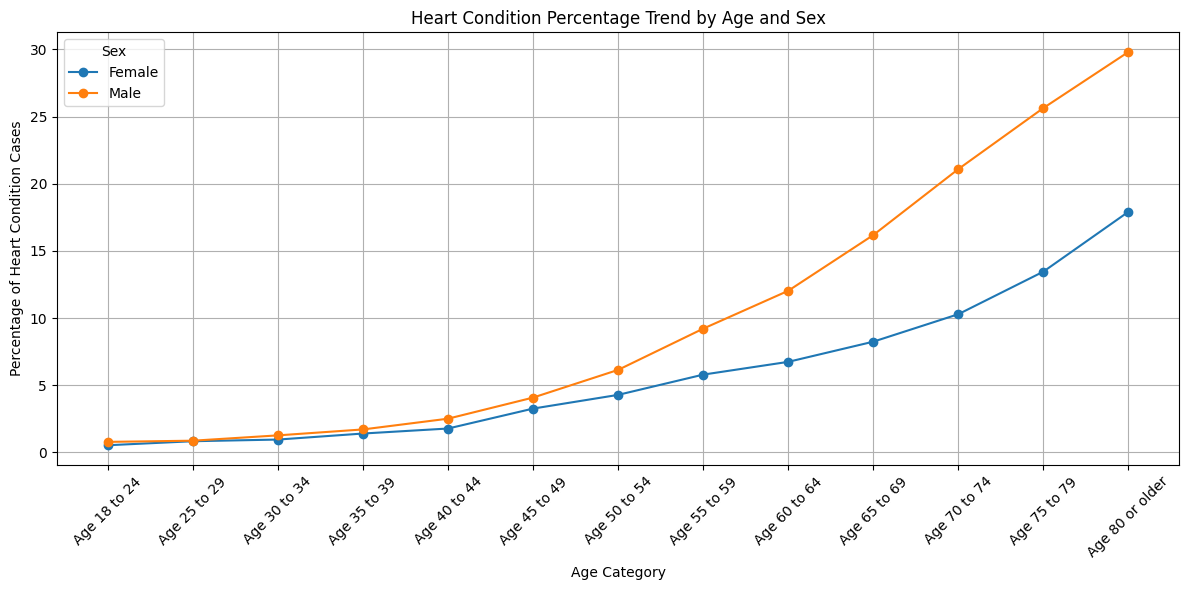


Acceleration in Heart Condition Percentage by Age and Sex:
Sex                Female      Male
AgeCategory                        
Age 25 to 29     0.298905  0.088475
Age 30 to 34     0.123888  0.396948
Age 35 to 39     0.448829  0.441437
Age 40 to 44     0.373059  0.800691
Age 45 to 49     1.483836  1.570710
Age 50 to 54     1.021001  2.062280
Age 55 to 59     1.507321  3.067929
Age 60 to 64     0.950919  2.819971
Age 65 to 69     1.500830  4.146480
Age 70 to 74     2.045613  4.911131
Age 75 to 79     3.167663  4.545692
Age 80 or older  4.455222  4.175702


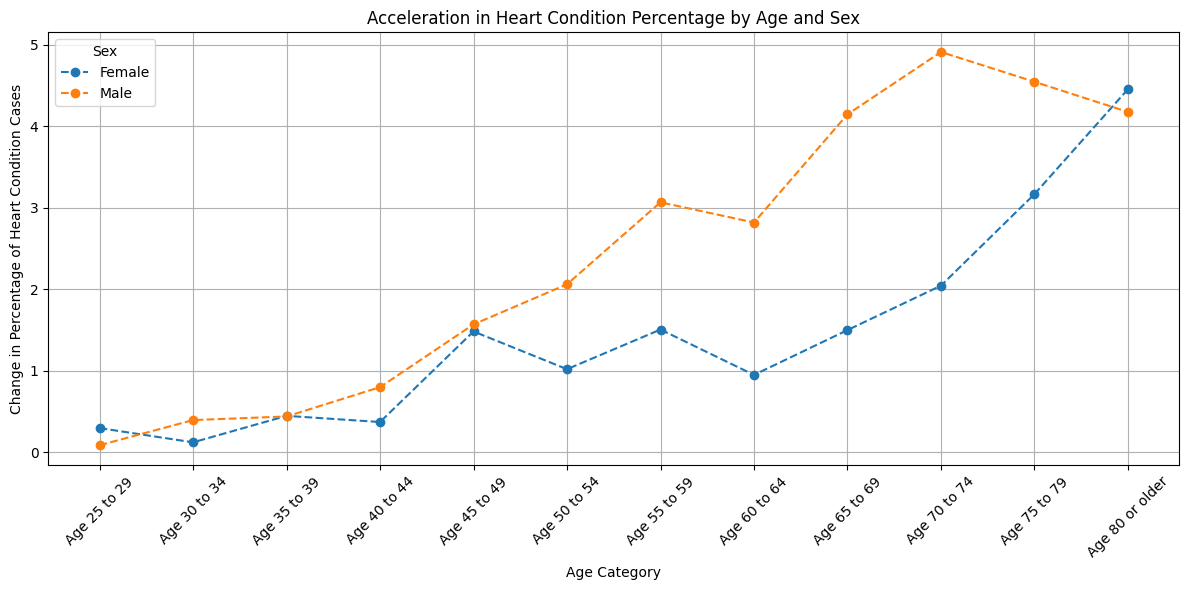

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by AgeCategory and Sex, then calculating mean heart condition percentage
age_sex_heart_condition = data_copy_eda.groupby(['AgeCategory', 'Sex'])['HeartConditionBinary'].mean().unstack() * 100

# Display computed values
print("Heart Condition Percentage by Age and Sex:")
print(age_sex_heart_condition)

# Plot the trend for each sex
plt.figure(figsize=(12, 6))
for sex in age_sex_heart_condition.columns:
    plt.plot(age_sex_heart_condition.index, age_sex_heart_condition[sex], marker='o', label=sex)

plt.title('Heart Condition Percentage Trend by Age and Sex')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Condition Cases')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify where the increase accelerates for each sex
age_sex_heart_condition_diff = age_sex_heart_condition.diff().dropna()

# Display computed acceleration values
print("\nAcceleration in Heart Condition Percentage by Age and Sex:")
print(age_sex_heart_condition_diff)

# Plot acceleration to visualize where the increase speeds up
plt.figure(figsize=(12, 6))
for sex in age_sex_heart_condition_diff.columns:
    plt.plot(age_sex_heart_condition_diff.index, age_sex_heart_condition_diff[sex], marker='o', linestyle='--', label=sex)

plt.title('Acceleration in Heart Condition Percentage by Age and Sex')
plt.xlabel('Age Category')
plt.ylabel('Change in Percentage of Heart Condition Cases')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.grid(True)
plt.tight_layout()
plt.show()




Heart Condition Rate of Change and Inflection Points:
                 Male_Percentage  Female_Percentage  Male_Rate_of_Change  \
AgeCategory                                                                
Age 18 to 24            0.784888           0.535236                  NaN   
Age 25 to 29            0.873362           0.834142             0.088475   
Age 30 to 34            1.270310           0.958029             0.396948   
Age 35 to 39            1.711747           1.406858             0.441437   
Age 40 to 44            2.512438           1.779917             0.800691   
Age 45 to 49            4.083148           3.263753             1.570710   
Age 50 to 54            6.145428           4.284754             2.062280   
Age 55 to 59            9.213357           5.792075             3.067929   
Age 60 to 64           12.033328           6.742994             2.819971   
Age 65 to 69           16.179808           8.243824             4.146480   
Age 70 to 74           21.090939 

<ipython-input-83-a9c7896f5fc0>:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(age_sex_heart_condition.index[inflection_idx], age_sex_heart_condition[sex][inflection_idx],


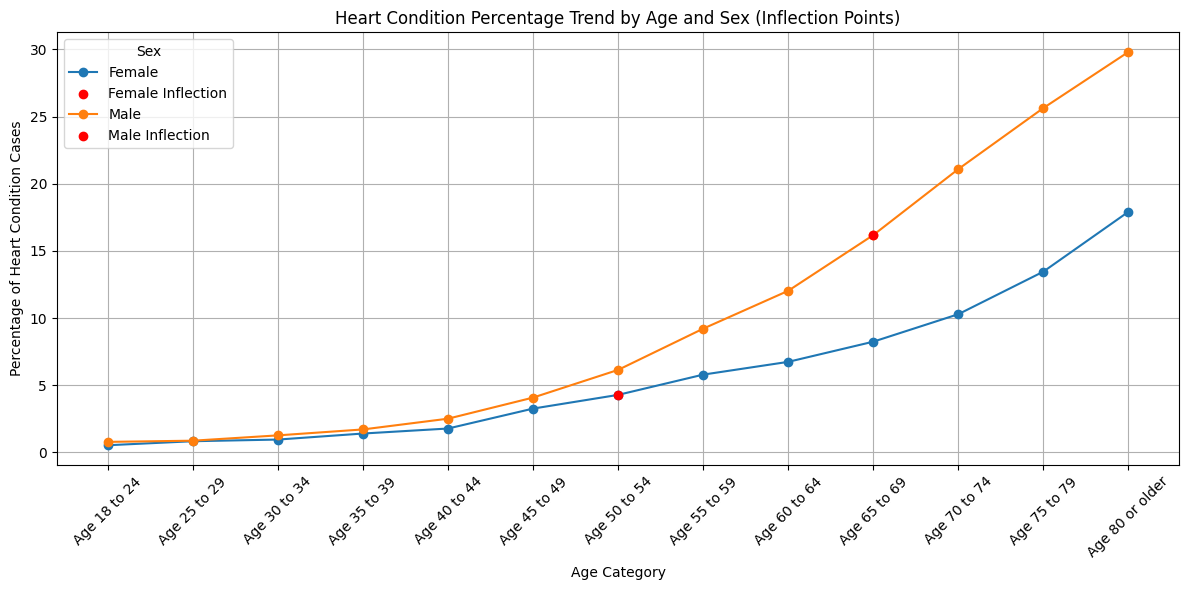


Inflection Points (Rapid Increase in Risk) by Sex:
Female: ['Age 50 to 54']
Male: ['Age 65 to 69']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

# Grouping by AgeCategory and Sex, then calculating mean heart condition percentage
age_sex_heart_condition = data_copy_eda.groupby(['AgeCategory', 'Sex'])['HeartConditionBinary'].mean().unstack() * 100

# Compute the first derivative (rate of change)
age_sex_heart_condition_diff = age_sex_heart_condition.diff().dropna()

# Identify inflection points (where the rate of increase accelerates)
inflection_points = {}
for sex in age_sex_heart_condition_diff.columns:
    inflection_idx = argrelextrema(age_sex_heart_condition_diff[sex].values, np.greater, order=2)[0]
    inflection_points[sex] = age_sex_heart_condition.index[inflection_idx]

# Create a DataFrame to display calculations
calc_table = pd.DataFrame(index=age_sex_heart_condition.index)
calc_table["Male_Percentage"] = age_sex_heart_condition["Male"]
calc_table["Female_Percentage"] = age_sex_heart_condition["Female"]
calc_table["Male_Rate_of_Change"] = age_sex_heart_condition_diff["Male"]
calc_table["Female_Rate_of_Change"] = age_sex_heart_condition_diff["Female"]

# Highlighting inflection points
calc_table["Male_Inflection"] = np.where(calc_table.index.isin(inflection_points.get("Male", [])), "YES", "NO")
calc_table["Female_Inflection"] = np.where(calc_table.index.isin(inflection_points.get("Female", [])), "YES", "NO")

# Display the calculated values as a table
print("\nHeart Condition Rate of Change and Inflection Points:")
print(calc_table)

# Plot the original trend with marked inflection points
plt.figure(figsize=(12, 6))
for sex in age_sex_heart_condition.columns:
    plt.plot(age_sex_heart_condition.index, age_sex_heart_condition[sex], marker='o', linestyle='-', label=sex)

    # Mark inflection points
    inflection_idx = argrelextrema(age_sex_heart_condition_diff[sex].values, np.greater, order=2)[0]
    plt.scatter(age_sex_heart_condition.index[inflection_idx], age_sex_heart_condition[sex][inflection_idx],
                color='red', zorder=3, label=f"{sex} Inflection")

plt.title('Heart Condition Percentage Trend by Age and Sex (Inflection Points)')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Condition Cases')
plt.xticks(rotation=45)
plt.legend(title='Sex')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the age categories where rapid increase starts for each sex
print("\nInflection Points (Rapid Increase in Risk) by Sex:")
for sex, points in inflection_points.items():
    print(f"{sex}: {list(points)}")


In [ ]:
# Count of Heart Condition Levels across all 54 States
plt.figure(figsize=(20, 10))
sns.countplot(x='State', hue='HeartConditionBinary', data=data_copy_eda)
plt.title('Heart Condition Levels Across States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the percentage of heart condition cases for each state
state_heart_condition = data_copy_eda.groupby('State')['HeartConditionBinary'].mean() * 100

# Visualizing the percentage of heart condition cases per state
plt.figure(figsize=(20, 10))
state_heart_condition.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Percentage of Heart Condition Cases Per State')
plt.xlabel('State')
plt.ylabel('Percentage of Heart Condition Cases')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
sex_counts = data_copy_eda['Sex'].value_counts()
print("Count of Male and Female in the Dataset:")
print(sex_counts)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate percentages
heart_condition_counts = data_copy_eda.groupby('Sex')['HeartConditionBinary'].value_counts(normalize=True).unstack() * 100

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Generate a stacked bar plot for heart condition distribution by sex with percentages
heart_condition_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)

# Add percentage labels inside the bars
for index, (no_condition, condition) in enumerate(zip(heart_condition_counts[0], heart_condition_counts[1])):
    ax.text(index, no_condition / 2, f"{no_condition:.1f}%", ha='center', va='center', fontsize=10, color='black', fontweight='bold')
    ax.text(index, no_condition + condition / 2, f"{condition:.1f}%", ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Adjust y-axis for better visualization
ax.set_ylim(0, 110)

# Add details
ax.set_title('Heart Condition Distribution by Gender', fontsize=14)
ax.set_xlabel('Sex (Male / Female)', fontsize=12)
ax.set_ylabel('Percentage', fontsize=12)
ax.set_xticklabels(heart_condition_counts.index, rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot
ax.legend(title='Heart Condition', labels=['No Heart Condition', 'Heart Condition'], loc='upper left', bbox_to_anchor=(1, 1))

# Display plot
plt.show()


In [ ]:
# Define BMI category function
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Healthy Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Class 1 Obesity'
    elif 35 <= bmi < 40:
        return 'Class 2 Obesity'
    else:
        return 'Class 3 Obesity (Severe Obesity)'

# Apply BMI categorization to create a new column
data_copy_eda['BMI_Category'] = data_copy_eda['BMI'].apply(categorize_bmi)

# Display the first few rows to confirm the new column
data_copy_eda.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the correct order of BMI categories
bmi_order = [
    'Underweight', 'Healthy Weight', 'Overweight', 'Class 1 Obesity',
    'Class 2 Obesity', 'Class 3 Obesity (Severe Obesity)'
]

# Ensure BMI_Category is a categorical variable with the correct order
data_copy_eda['BMI_Category'] = pd.Categorical(data_copy_eda['BMI_Category'], categories=bmi_order, ordered=True)

# Calculate the frequency (percentage) of heart conditions in each BMI category
bmi_heart_condition_freq = (
    data_copy_eda.groupby('BMI_Category')['HeartConditionBinary']
    .value_counts(normalize=True)  # Convert to percentage
    .unstack(fill_value=0) * 100  # Convert to percentage scale
)

# Create the plot
plt.figure(figsize=(10, 6))
ax = bmi_heart_condition_freq.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=8, padding=2, color='black')

# Add details
plt.title('Heart Condition Frequency Across BMI Categories', fontsize=14)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot
plt.legend(title='Heart Condition', labels=['No Heart Condition', 'Heart Condition'], loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend outside
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the variable for the detailed box plot
col = 'BMI'

# Create the figure
plt.figure(figsize=(10, 7))

# Generate the box plot
sns.boxplot(x='HeartConditionBinary', y=data_copy_eda[col], data=data_copy_eda,
            showfliers=False, width=0.6, palette="pastel")

# Calculate statistical values
grouped_data = data_copy_eda.groupby('HeartConditionBinary')[col]
stats_table = grouped_data.describe()[['25%', '50%', '75%', 'mean']]

# Rename columns for better readability
stats_table.columns = ['Q1 (25%)', 'Median (50%)', 'Q3 (75%)', 'Mean']

# Display the statistical table
print("\nBox Plot Summary Statistics:")
print(stats_table)

# Add details to the plot
plt.title(f'{col} vs Heart Condition Binary', fontsize=14, fontweight='bold')
plt.xlabel('Heart Condition (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel(col, fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display plot
plt.show()

# Race and Ethnicity

In [ ]:
race_counts = data_copy_eda['RaceEthnicityCategory'].value_counts()
print("Count of RaceEthnicity in the Dataset:")
print(race_counts)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate percentage of heart conditions for each Race/Ethnicity category
race_heart_condition_counts = (
    data_copy_eda.groupby('RaceEthnicityCategory')['HeartConditionBinary']
    .value_counts(normalize=True)  # Convert to percentage
    .unstack(fill_value=0) * 100  # Convert to percentage scale
)

# Create the plot
plt.figure(figsize=(12, 6))
ax = race_heart_condition_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

# Add percentage values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=8, padding=2, color='black')

# Add details
plt.title('Heart Condition Frequency by Race/Ethnicity', fontsize=14)
plt.xlabel('Race/Ethnicity Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot
plt.legend(title='Heart Condition', labels=['No Heart Condition', 'Heart Condition'], loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend outside
plt.tight_layout()

# Show the plot
plt.show()



# COVID-19

In [ ]:
covid_counts = data_copy_eda['CovidPos'].value_counts()
print(covid_counts )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Count heart condition cases (only HeartConditionBinary = 1) for each Covid category
covid_heart_condition_counts = (
    data_copy_eda[data_copy_eda['HeartConditionBinary'] == 1]
    .groupby('CovidPos_Merged')['HeartConditionBinary']
    .count()
)

# Convert counts to percentages
covid_heart_condition_percent = (covid_heart_condition_counts / covid_heart_condition_counts.sum()) * 100

# Define bar width and positions
bar_width = 0.4
x_labels = covid_heart_condition_percent.index.astype(str)  # Convert to string for labels
x_indexes = np.arange(len(x_labels))

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the percentage bars
ax.bar(x_indexes, covid_heart_condition_percent, width=bar_width, color='salmon')

# Add percentage labels on top of bars
for i, value in enumerate(covid_heart_condition_percent):
    ax.text(x_indexes[i], value + 1, f"{value:.1f}%", ha='center', fontsize=8, color='black')

# Add details
ax.set_title('Percentage of Individuals with Heart Condition by COVID-19 Positivity', fontsize=14)
ax.set_xlabel('COVID-19 Positive (Merged Categories)', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticks(x_indexes)
ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Rotate labels for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#General Health & Physical Acitivities


In [ ]:
# Define ordered levels for GeneralHealth
general_health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

# Convert GeneralHealth to an ordered categorical variable
data_copy_eda['GeneralHealth'] = pd.Categorical(data_copy_eda['GeneralHealth'], categories=general_health_order, ordered=True)

# Calculate the percentage of heart conditions for each GeneralHealth category
general_health_freq = (
    data_copy_eda.groupby('GeneralHealth')['HeartConditionBinary']
    .value_counts(normalize=True)  # Convert to frequency
    .unstack(fill_value=0) * 100   # Convert to percentage
)

# Ensure the order of categories in the plot
general_health_freq = general_health_freq.loc[general_health_order]

# Create the plot
plt.figure(figsize=(10, 6))
ax = general_health_freq.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=8, padding=2, color='black')

# Add details
plt.title('Heart Condition Frequency by General Health', fontsize=14)
plt.xlabel('General Health Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot
plt.legend(title='Heart Condition', labels=['No Heart Condition', 'Heart Condition'], loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to fit the legend outside
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
physical_activity_counts = data_copy_eda['PhysicalActivities'].value_counts()
print(physical_activity_counts)

PhysicalActivities
Yes    191310
No      54703
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

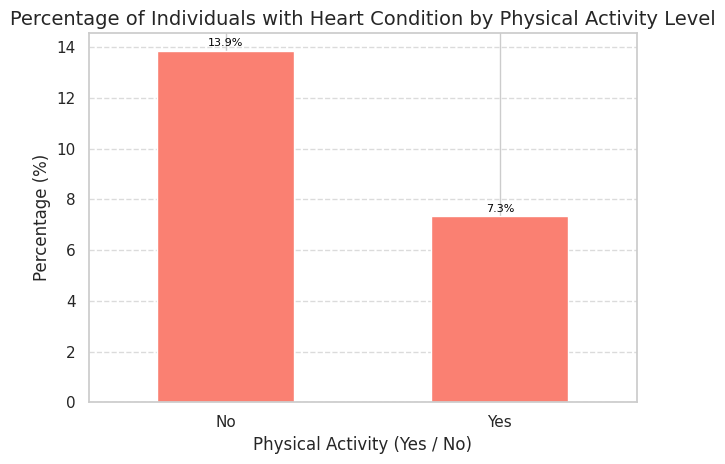

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the percentage of heart conditions (HeartConditionBinary = 1) for each Physical Activity category
physical_activity_counts = (
    data_copy_eda.groupby('PhysicalActivities')['HeartConditionBinary']
    .value_counts(normalize=True)  # Convert to percentage
    .unstack(fill_value=0) * 100  # Convert to percentage scale
)

# Keep only HeartConditionBinary = 1
physical_activity_counts = physical_activity_counts[[1]]

# Create the plot
plt.figure(figsize=(8, 5))
ax = physical_activity_counts.plot(kind='bar', stacked=False, color=['salmon'], legend=False)  # Removed legend

# Add percentage values on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=8, padding=2, color='black')

# Add details
plt.title('Percentage of Individuals with Heart Condition by Physical Activity Level', fontsize=14)
plt.xlabel('Physical Activity (Yes / No)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to fit everything well
plt.tight_layout()

# Show the plot
plt.show()



<Figure size 800x500 with 0 Axes>

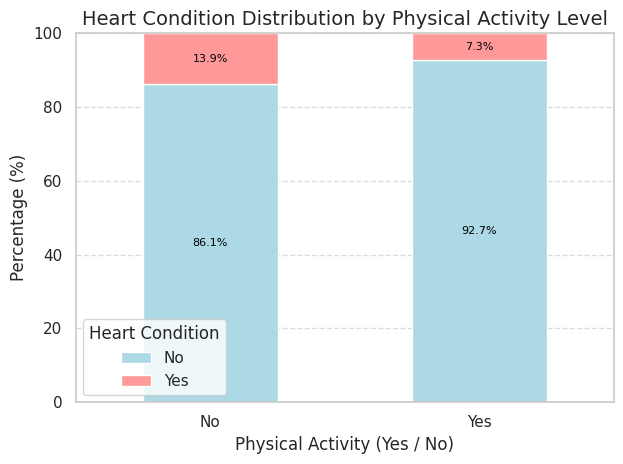

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the percentage of heart condition (0 = No, 1 = Yes) within each Physical Activity group
physical_activity_counts = (
    data_copy_eda.groupby('PhysicalActivities')['HeartConditionBinary']
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)

# Set custom colors
colors = ['#ADD8E6', '#FF9999']  # light blue for No, light red for Yes

# Create stacked bar chart
plt.figure(figsize=(8, 5))
ax = physical_activity_counts.plot(kind='bar', stacked=True, color=colors)

# Add labels inside each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=8, label_type='center', color='black')

# Customize plot
plt.title('Heart Condition Distribution by Physical Activity Level', fontsize=14)
plt.xlabel('Physical Activity (Yes / No)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Heart Condition', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 100)

# Final layout adjustments
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Define ordered levels for GeneralHealth
general_health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']

# Convert GeneralHealth to an ordered categorical variable
data_copy_eda['GeneralHealth'] = pd.Categorical(data_copy_eda['GeneralHealth'], categories=general_health_order, ordered=True)

# Create a contingency table
contingency_table = pd.crosstab(data_copy_eda['GeneralHealth'], data_copy_eda['PhysicalActivities'])

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the contingency table
print("\nContingency Table (General Health vs Physical Activity):\n")
print(contingency_table)

# Print Chi-Square test results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic = {chi2:.3f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-Value = {p:.5f}")

# Interpret the result
if p < 0.05:
    print("\nConclusion: There is a significant association between General Health and Physical Activity.")
else:
    print("\nConclusion: There is no significant association between General Health and Physical Activity.")

# Convert contingency table to percentage for better visualization
contingency_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Create a heatmap to visualize the relationship
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_percentage, annot=True, cmap="Blues", fmt=".1f")

# Add titles and labels
plt.title('Heatmap of General Health vs Physical Activity', fontsize=14)
plt.xlabel('Physical Activity (Yes/No)', fontsize=12)
plt.ylabel('General Health', fontsize=12)

# Show the plot
plt.show()


In [ ]:
# Calculate the percentage distribution of GeneralHealth within each PhysicalActivities category
general_health_dist = (
    data_copy_eda.groupby('PhysicalActivities')['GeneralHealth']
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)

# Create the bar plot
plt.figure(figsize=(10, 6))
general_health_dist.plot(kind='bar', stacked=True, colormap='copper', alpha=0.9)

# Add details
plt.title('General Health Distribution by Physical Activity', fontsize=14)
plt.xlabel('Physical Activity (Yes/No)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='General Health', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Chest Scan

In [ ]:
chestscan_counts = data_copy_eda['ChestScan'].value_counts()
print(chestscan_counts )

ChestScan
No     141818
Yes    104195
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

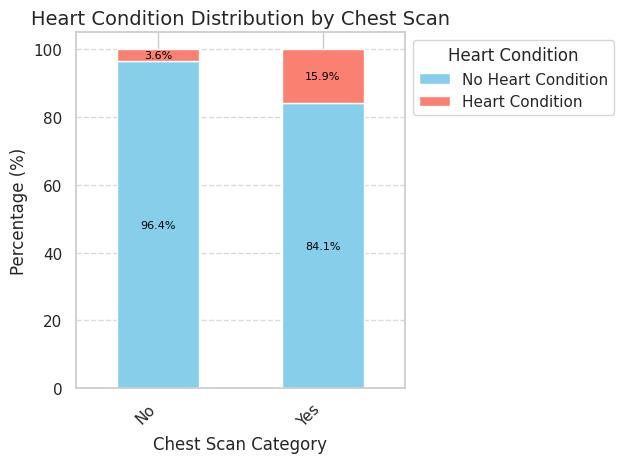

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate percentage distribution of HeartConditionBinary for each ChestScan category
chest_scan_freq = (
    data_copy_eda.groupby('ChestScan')['HeartConditionBinary']
    .value_counts(normalize=True)
    .unstack(fill_value=0) * 100
)

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
ax = chest_scan_freq.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])

# Add labels inside bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', fontsize=8, label_type='center', color='black')

# Plot customizations
plt.title('Heart Condition Distribution by Chest Scan', fontsize=14)
plt.xlabel('Chest Scan Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend outside the plot
plt.legend(title='Heart Condition', labels=['No Heart Condition', 'Heart Condition'],
           loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()
plt.show()



# General plot

In [ ]:
# Defining the important numerical columns for box plot analysis
important_numerical_vars = ['PhysicalHealthDays', 'BMI', 'SleepHours', 'MentalHealthDays']

# Generate box plots for numerical variables against HeartConditionBinary without showing outliers
for col in important_numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='HeartConditionBinary', y=data_copy_eda[col], data=data_copy_eda, showfliers=False)
    plt.title(f'{col} vs Heart Condition Binary ')
    plt.xlabel('Heart Condition (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.show()

In [ ]:
# Bar plot for the percentage of heart condition cases per age category
age_heart_condition_percentage = data_copy_eda.groupby('AgeCategory')['HeartConditionBinary'].mean() * 100

plt.figure(figsize=(12, 6))
age_heart_condition_percentage.sort_values(ascending=True).plot(kind='bar', color='green')
plt.title('Percentage of Heart Condition Cases Per Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Condition Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Count plots for categorical variables with levels (with error handling)
for col in categorical_cols:
    if col in data_copy_eda.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='HeartConditionBinary', data=data_copy_eda)
        plt.title(f'{col} vs Heart Condition Binary')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping column: {col} as it does not exist in the dataset.")

# Encoding

In [ ]:
nominal_features = ['State', 'RaceEthnicityCategory', 'TetanusLast10Tdap', 'CovidPos','RemovedTeeth','SmokerStatus','ECigaretteUsage','HadDiabetes']
binary_features = [
     'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'PhysicalActivities', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear', 'ChestScan'
]
ordinal_features = ['GeneralHealth', 'LastCheckupTime', 'AgeCategory']

In [ ]:
data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})

<ipython-input-21-8be950641715>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy1['Sex'] = data_copy1['Sex'].replace({'Male':1,'Female':0})


In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
nominal_encoded = pd.DataFrame(
    one_hot_encoder.fit_transform(data_copy1[nominal_features]),
    columns=one_hot_encoder.get_feature_names_out(nominal_features),
    index=data_copy1.index  # Align indices with the original DataFrame
)

binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)


ordinal_mappings = {
    'GeneralHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'LastCheckupTime': [
        '5 or more years ago',
        'Within past 5 years (2 years but less than 5 years ago)',
        'Within past 2 years (1 year but less than 2 years ago)',
        'Within past year (anytime less than 12 months ago)'
    ],
    'AgeCategory':[
        'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59','Age 60 to 64', 'Age 65 to 69'
         ,'Age 70 to 74','Age 75 to 79','Age 80 or older'
    ]
}

ordinal_encoded = data_copy1[ordinal_features].replace({
    col: {val: i for i, val in enumerate(vals)} for col, vals in ordinal_mappings.items()
})

<ipython-input-22-2b01ca78c0a6>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_encoded = data_copy1[binary_features].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-22-2b01ca78c0a6>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordinal_encoded = data_copy1[ordinal_features].replace({


In [ ]:
processed_data1 = pd.concat([nominal_encoded, binary_encoded, ordinal_encoded,numerical_data], axis=1)
processed_data1['HeartConditionBinary'] = data_copy1['HeartConditionBinary'].values

In [ ]:
processed_data1

State_Alabama  State_Alaska  State_Arizona  State_Arkansas  \
0                 1.0           0.0            0.0             0.0   
1                 1.0           0.0            0.0             0.0   
2                 1.0           0.0            0.0             0.0   
3                 1.0           0.0            0.0             0.0   
4                 1.0           0.0            0.0             0.0   
...               ...           ...            ...             ...   
246017            0.0           0.0            0.0             0.0   
246018            0.0           0.0            0.0             0.0   
246019            0.0           0.0            0.0             0.0   
246020            0.0           0.0            0.0             0.0   
246021            0.0           0.0            0.0             0.0   

        State_California  State_Colorado  State_Connecticut  State_Delaware  \
0                    0.0             0.0                0.0             0.0   
1                    0.0             0.0                0.0             0.0   
2                    0.0             0.0                0.0             0.0   
3                    0.0             0.0                0.0             0.0   
4                    0.0             0.0                0.0             0.0   
...                  ...             ...                ...             ...   
246017               0.0             0.0                0.0             0.0   
246018               0.0             0.0                0.0             0.0   
246019               0.0             0.0                0.0             0.0   
246020               0.0             0.0                0.0             0.0   
246021               0.0             0.0                0.0             0.0   

        State_District of Columbia  State_Florida  ...  GeneralHealth  \
0                              0.0            0.0  ...              3   
1                              0.0            0.0  ...              3   
2                              0.0            0.0  ...              3   
3                              0.0            0.0  ...              1   
4                              0.0            0.0  ...              2   
...                            ...            ...  ...            ...   
246017                         0.0            0.0  ...              3   
246018                         0.0            0.0  ...              1   
246019                         0.0            0.0  ...              2   
246020                         0.0            0.0  ...              4   
246021                         0.0            0.0  ...              3   

        LastCheckupTime  AgeCategory  PhysicalHealthDays  MentalHealthDays  \
0                     3            9                 4.0               0.0   
1                     3           10                 0.0               0.0   
2                     3           11                 0.0               0.0   
3                     3           12                 5.0               0.0   
4                     3           12                 3.0              15.0   
...                 ...          ...                 ...               ...   
246017                2            8                 0.0               0.0   
246018                3            1                 0.0               7.0   
246019                3            9                 0.0              15.0   
246020                3            6                 2.0               2.0   
246021                3           10                 0.0               0.0   

        SleepHours  HeightInMeters  WeightInKilograms    BMI  \
0              9.0            1.60              71.67  27.99   
1              6.0            1.78              95.25  30.13   
2              8.0            1.85             108.86  31.66   
3              9.0            1.70              90.72  31.32   
4              5.0            1.55              79.38  33.07   
...            ...  

In [ ]:
#processed_data1.to_csv("/content/drive/My Drive/Colab Notebooks/2022dataset/clean_encoded_dataset.csv", index=False)

In [ ]:
# Check if indices match between the original target and processed data
print(data_copy1['HeartConditionBinary'].index.equals(processed_data1.index))  # Should return True

# Ensure no missing values in the target column
print(processed_data1['HeartConditionBinary'].isnull().sum())

True
0


In [ ]:
processed_data1.columns

Index(['State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District of Columbia', 'State_Florida',
       ...
       'GeneralHealth', 'LastCheckupTime', 'AgeCategory', 'PhysicalHealthDays',
       'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms',
       'BMI', 'HeartConditionBinary'],
      dtype='object', length=112)

# Outlier Analysis


In [ ]:
from sklearn.ensemble import IsolationForest

# Initializing and training the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(processed_data1)

# Adding the 'Outlier' column to the DataFrame
processed_data1['Outlier'] = outliers

# Calculating the percentage of outliers detected
total_samples = len(processed_data1)
outlier_count = (processed_data1['Outlier'] == -1).sum()
outlier_percentage = (outlier_count / total_samples) * 100

# Display the percentage of outliers detected
print(f"Total Samples: {total_samples}")
print(f"Number of Outliers Detected: {outlier_count}")
print(f"Percentage of Outliers Detected: {outlier_percentage:.2f}%")

In [ ]:
'''sns.pairplot(processed_data1, hue="Outlier", diag_kind="kde", palette={1: "blue", -1: "red"})
plt.show()'''

# Split the Dataset


In [ ]:
X = processed_data1.drop(columns=['HeartConditionBinary'])
y = processed_data1['HeartConditionBinary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
X_train.shape


(196810, 111)

#  Feature Importance (imbalanced data )

In [ ]:
from sklearn.feature_selection import f_classif
f_scores, p_values = f_classif(X_train, y_train)

# Create a DataFrame with feature names, F-scores, and p-values
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'F-Score': f_scores, 'P-Value': p_values})

# Sort the DataFrame by F-scores in descending order
feature_importance = feature_importance.sort_values(by='F-Score', ascending=False)

# Get the top 15 features
top_15_features = feature_importance.head(15)

print(top_15_features)

                       Feature       F-Score  P-Value
102              GeneralHealth  10911.224601      0.0
104                AgeCategory  10769.180805      0.0
101                  ChestScan   9444.835474      0.0
92           DifficultyWalking   8141.984056      0.0
82                   HadStroke   7140.429653      0.0
80             HadDiabetes_Yes   6125.024356      0.0
85                     HadCOPD   5889.046918      0.0
99               PneumoVaxEver   5753.952881      0.0
105         PhysicalHealthDays   5555.066069      0.0
78              HadDiabetes_No   5404.147478      0.0
88                HadArthritis   5310.038246      0.0
69   RemovedTeeth_None of them   4486.968027      0.0
87            HadKidneyDisease   4384.000753      0.0
68            RemovedTeeth_All   3190.996295      0.0
89         DeafOrHardOfHearing   3150.501494      0.0


In [ ]:
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X_train, y_train)
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'F-Score': f_scores, 'P-Value': p_values})
feature_importance = feature_importance.sort_values(by='F-Score', ascending=False)

print(feature_importance)


                                             Feature       F-Score   P-Value
102                                    GeneralHealth  10911.224601  0.000000
104                                      AgeCategory  10769.180805  0.000000
101                                        ChestScan   9444.835474  0.000000
92                                 DifficultyWalking   8141.984056  0.000000
82                                         HadStroke   7140.429653  0.000000
..                                               ...           ...       ...
11                                        State_Guam      0.150607  0.697956
56   RaceEthnicityCategory_Multiracial, Non-Hispanic      0.144894  0.703463
25                                 State_Mississippi      0.092053  0.761584
21                                    State_Maryland      0.002958  0.956623
35                                State_North Dakota      0.002625  0.959142

[111 rows x 3 columns]


In [ ]:
feature_importance

Feature       F-Score   P-Value
102                                    GeneralHealth  10911.224601  0.000000
104                                      AgeCategory  10769.180805  0.000000
101                                        ChestScan   9444.835474  0.000000
92                                 DifficultyWalking   8141.984056  0.000000
82                                         HadStroke   7140.429653  0.000000
..                                               ...           ...       ...
11                                        State_Guam      0.150607  0.697956
56   RaceEthnicityCategory_Multiracial, Non-Hispanic      0.144894  0.703463
25                                 State_Mississippi      0.092053  0.761584
21                                    State_Maryland      0.002958  0.956623
35                                State_North Dakota      0.002625  0.959142

[111 rows x 3 columns]

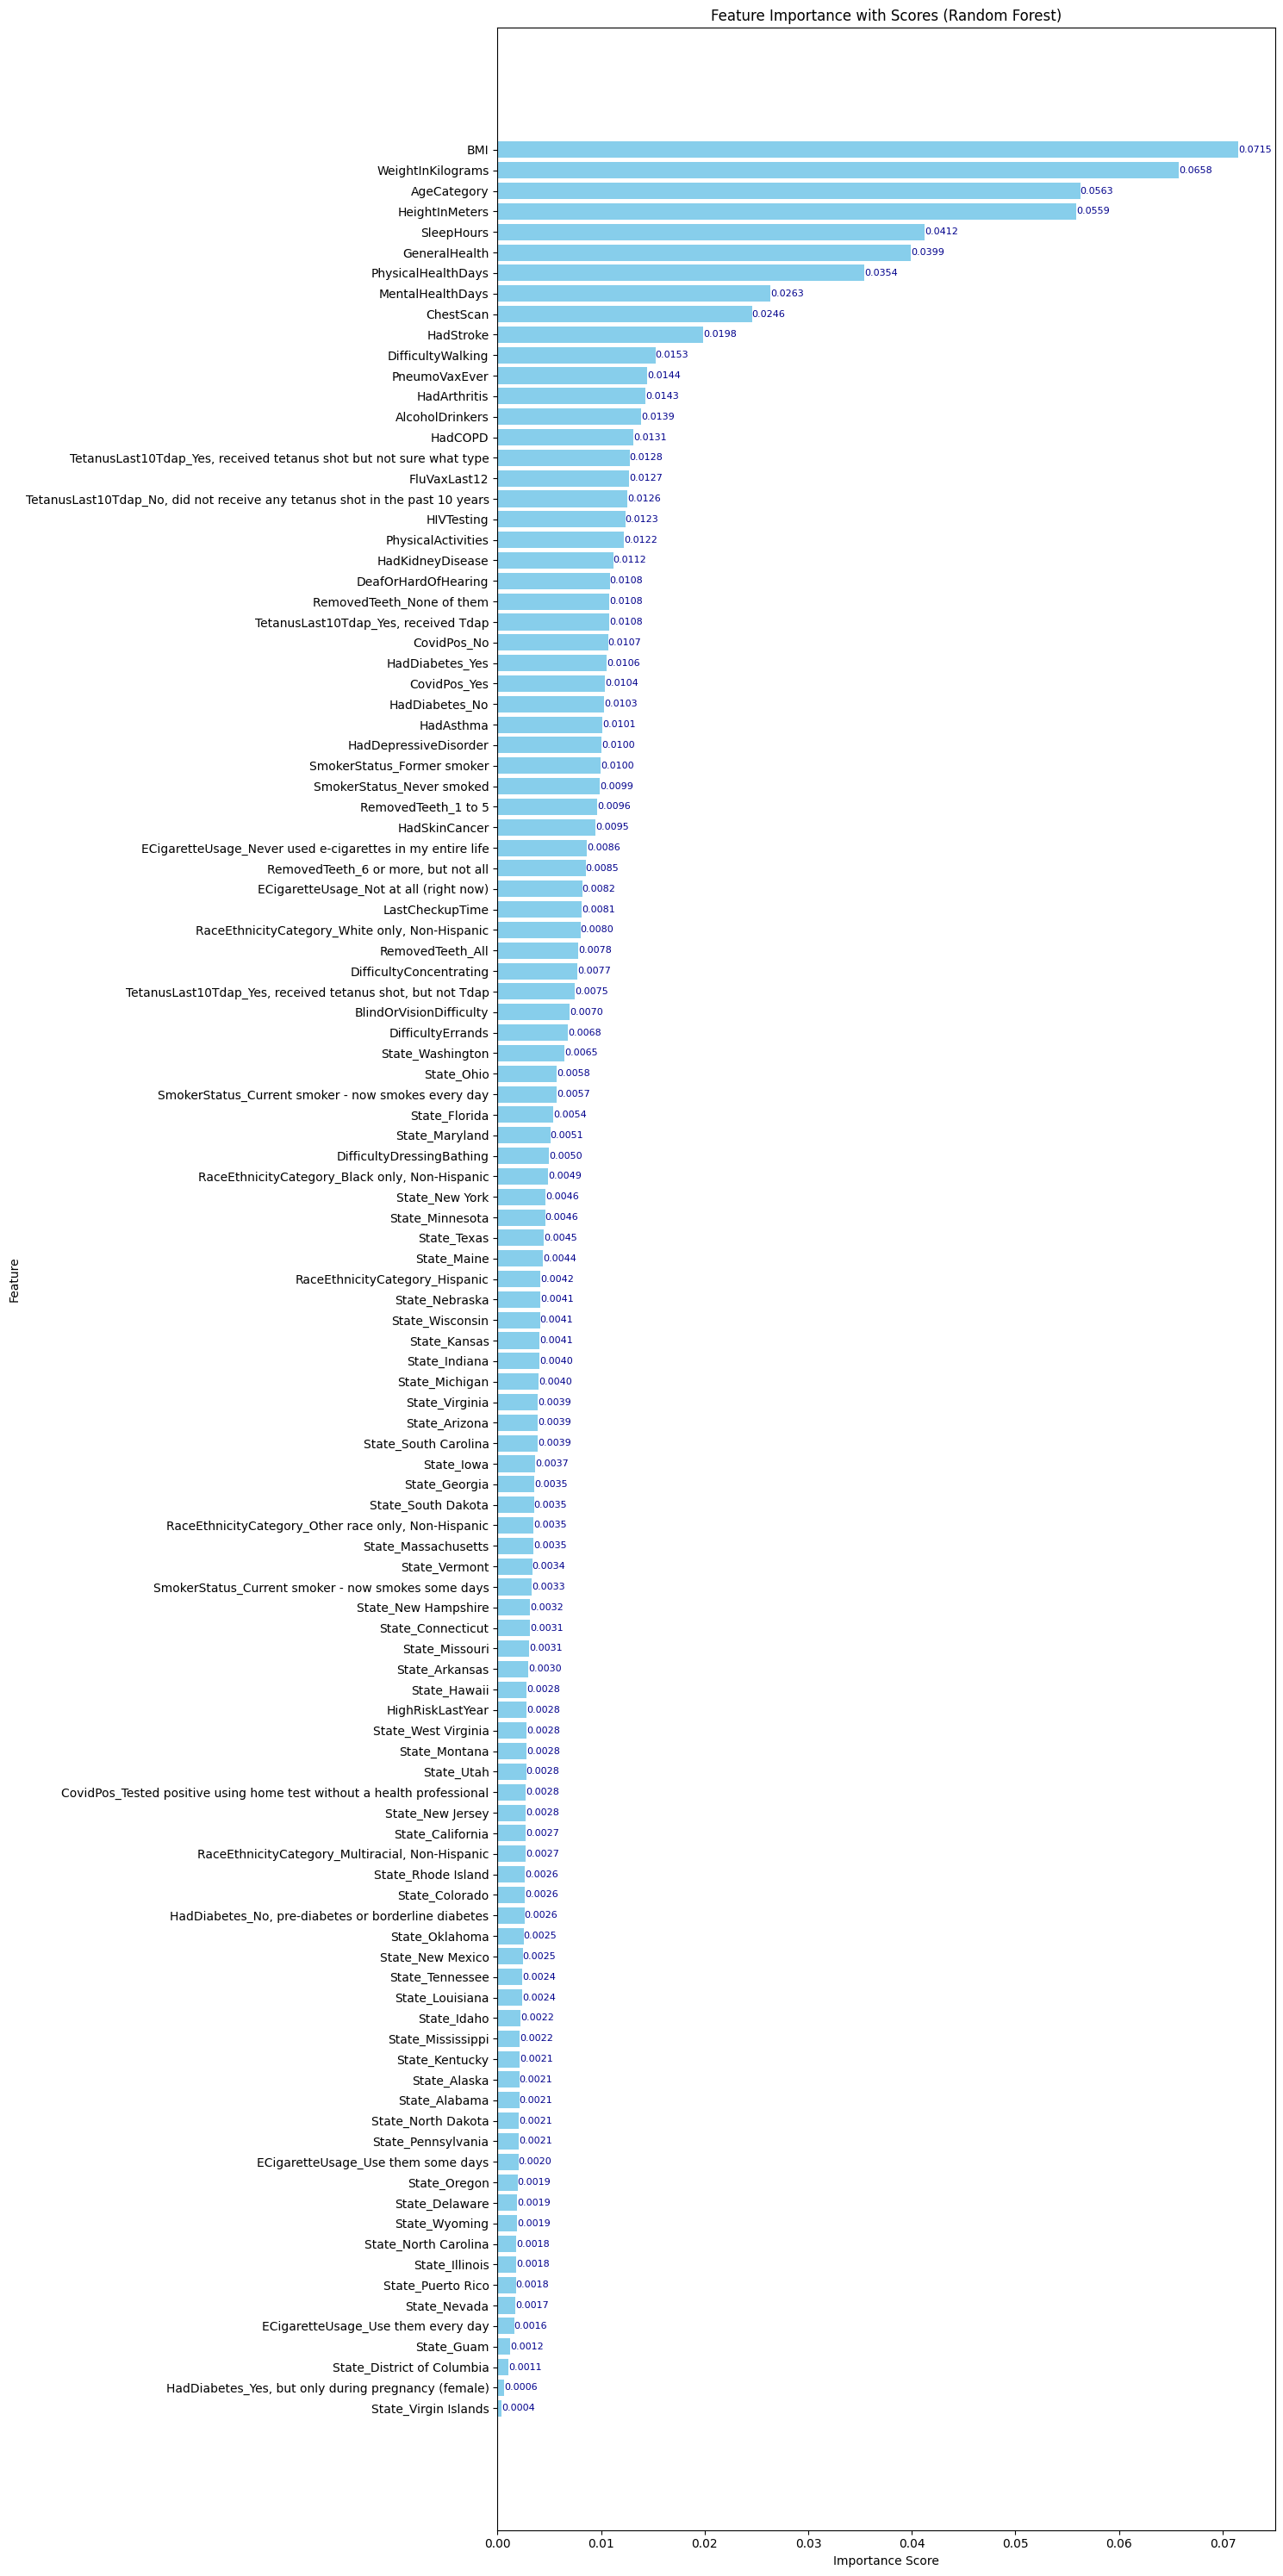

In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

# Get feature importance
feature_importance_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})

# Sort by feature importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 30))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='skyblue')

# Annotate the bar chart with feature scores
for i, (importance, feature) in enumerate(zip(feature_importance_rf['Importance'], feature_importance_rf['Feature'])):
    plt.text(importance, i, f'{importance:.4f}', va='center', ha='left', fontsize=8, color='darkblue')

# Formatting
plt.gca().invert_yaxis()
plt.title('Feature Importance with Scores (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot as an image
plt.savefig('feature_importance_with_scores.png', dpi=300)
plt.show()


In [ ]:
feature_importance_rf

Feature  Importance
110                                                BMI    0.071499
109                                  WeightInKilograms    0.065779
104                                        AgeCategory    0.056258
108                                     HeightInMeters    0.055851
107                                         SleepHours    0.041246
..                                                 ...         ...
76                  ECigaretteUsage_Use them every day    0.001614
11                                          State_Guam    0.001223
8                           State_District of Columbia    0.001055
81   HadDiabetes_Yes, but only during pregnancy (fe...    0.000633
48                                State_Virgin Islands    0.000421

[111 rows x 2 columns]

In [ ]:
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(X_train.columns)

Index(['State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District_of_Columbia', 'State_Florida',
       ...
       'ChestScan', 'GeneralHealth', 'LastCheckupTime', 'AgeCategory',
       'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object', length=111)


In [ ]:
X_train.columns = X_train.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)

In [ ]:
print(X_train.columns)

Index(['State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas',
       'State_California', 'State_Colorado', 'State_Connecticut',
       'State_Delaware', 'State_District_of_Columbia', 'State_Florida',
       ...
       'ChestScan', 'GeneralHealth', 'LastCheckupTime', 'AgeCategory',
       'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'BMI'],
      dtype='object', length=111)


# ML models without smote & removing variables

In [ ]:
scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Fit on training data and transform both train and test sets
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train

State_Alabama  State_Alaska  State_Arizona  State_Arkansas  \
29612             0.0           0.0            0.0             0.0   
49482             0.0           0.0            0.0             0.0   
59306             0.0           0.0            0.0             0.0   
83602             0.0           0.0            0.0             0.0   
75627             0.0           0.0            0.0             0.0   
...               ...           ...            ...             ...   
93556             0.0           0.0            0.0             0.0   
181573            0.0           0.0            0.0             0.0   
94738             0.0           0.0            0.0             0.0   
236678            0.0           0.0            0.0             0.0   
83210             0.0           0.0            0.0             0.0   

        State_California  State_Colorado  State_Connecticut  State_Delaware  \
29612                0.0             0.0                0.0             1.0   
49482                0.0             0.0                0.0             0.0   
59306                0.0             0.0                0.0             0.0   
83602                0.0             0.0                0.0             0.0   
75627                0.0             0.0                0.0             0.0   
...                  ...             ...                ...             ...   
93556                0.0             0.0                0.0             0.0   
181573               0.0             0.0                0.0             0.0   
94738                0.0             0.0                0.0             0.0   
236678               0.0             0.0                0.0             0.0   
83210                0.0             0.0                0.0             0.0   

        State_District of Columbia  State_Florida  ...  ChestScan  \
29612                          0.0            0.0  ...          1   
49482                          0.0            0.0  ...          1   
59306                          0.0            0.0  ...          0   
83602                          0.0            0.0  ...          1   
75627                          0.0            0.0  ...          1   
...                            ...            ...  ...        ...   
93556                          0.0            0.0  ...          0   
181573                         0.0            0.0  ...          1   
94738                          0.0            0.0  ...          0   
236678                         0.0            0.0  ...          0   
83210                          0.0            0.0  ...          0   

        GeneralHealth  LastCheckupTime  AgeCategory  PhysicalHealthDays  \
29612               4                3           10           -0.371661   
49482               2                3            5            0.340724   
59306               2                3            1           -0.490392   
83602               2                3            8           -0.134199   
75627               2                3           10           -0.490392   
...               ...              ...          ...                 ...   
93556               3                3            9           -0.490392   
181573              1                3            5           -0.490392   
94738               4                3           10           -0.490392   
236678              2                3            9           -0.490392   
83210               2                3            9            0.340724   

        MentalHealthDays  SleepHours  HeightInMeters  WeightInKilograms  \
29612          -0.514589   -0.013512       -0.047633          -0.942833   
49482           1.212838   -0.013512       -0.235232           0.375708   
59306          -0.514589    0.678993       -0.985629          -0.411292   
83602          -0.514589   -0.013512       -0.235232          -1.750457   
75627          -0.514589   -2.091025        0.421365          -0.198488   
...                  ...         ...  

In [ ]:
#X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
#X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
#X_train_scaled

array([[-0.08745938, -0.11407021, -0.15042828, ..., -0.04763327,
        -0.94283288, -1.03381623],
       [-0.08745938, -0.11407021, -0.15042828, ..., -0.23523238,
         0.37570804,  0.60267468],
       [-0.08745938, -0.11407021, -0.15042828, ..., -0.98562886,
        -0.41129168,  0.08580736],
       ...,
       [-0.08745938, -0.11407021, -0.15042828, ..., -0.04763327,
        -1.26157011, -1.394243  ],
       [-0.08745938, -0.11407021, -0.15042828, ...,  1.171761  ,
        -0.09208572, -0.65345096],
       [-0.08745938, -0.11407021, -0.15042828, ...,  0.89036232,
         1.22598647,  0.77905374]])

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10),
    "LightGBM": LGBMClassifier(random_state=10),
    "Naive Bayes": GaussianNB()
}

Training Logistic Regression...

Logistic Regression - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44786
           1       0.56      0.11      0.18      4417

    accuracy                           0.91     49203
   macro avg       0.74      0.55      0.57     49203
weighted avg       0.89      0.91      0.88     49203


Logistic Regression - Confusion Matrix (Test Set):
[[44427   359]
 [ 3951   466]]
Training Random Forest...

Random Forest - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     44786
           1       0.58      0.03      0.06      4417

    accuracy                           0.91     49203
   macro avg       0.74      0.52      0.51     49203
weighted avg       0.88      0.91      0.87     49203


Random Forest - Confusion Matrix (Test Set):
[[44678   108]
 [ 4270   147]]
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:59:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44786
           1       0.52      0.10      0.16      4417

    accuracy                           0.91     49203
   macro avg       0.72      0.54      0.56     49203
weighted avg       0.88      0.91      0.88     49203


XGBoost - Confusion Matrix (Test Set):
[[44385   401]
 [ 3988   429]]
Training LightGBM...
[LightGBM] [Info] Number of positive: 17199, number of negative: 179611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 196810, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087389 -> initscore=-2.345942
[LightGBM] [Info] Start traini

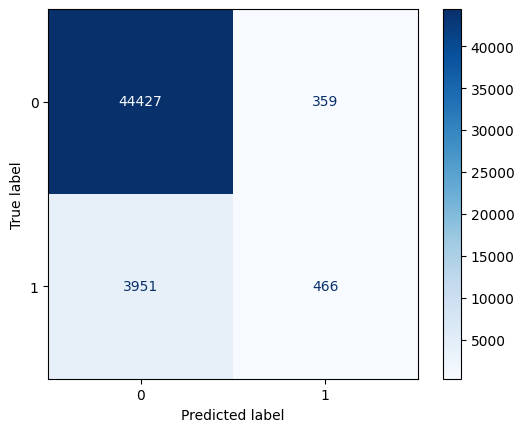

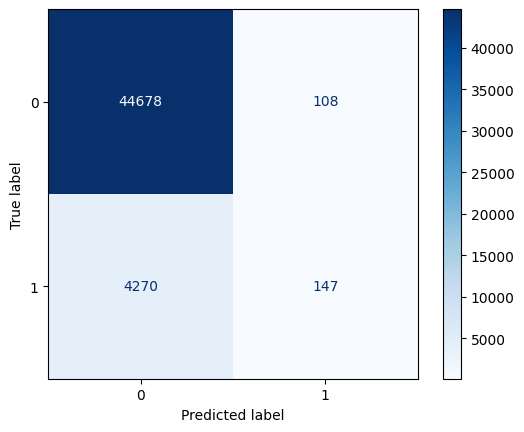

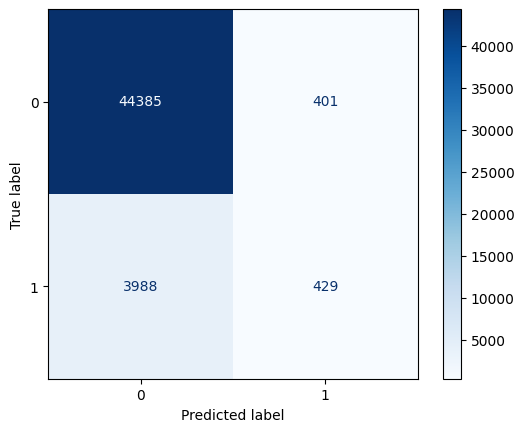

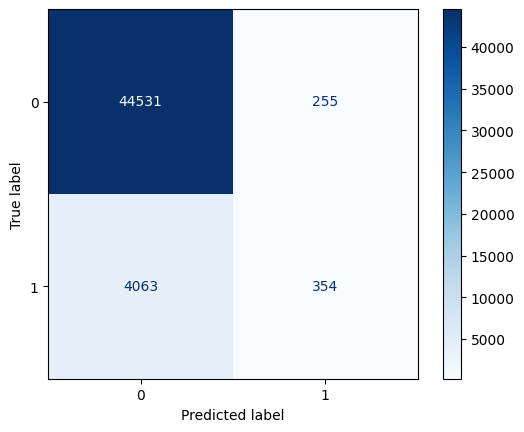

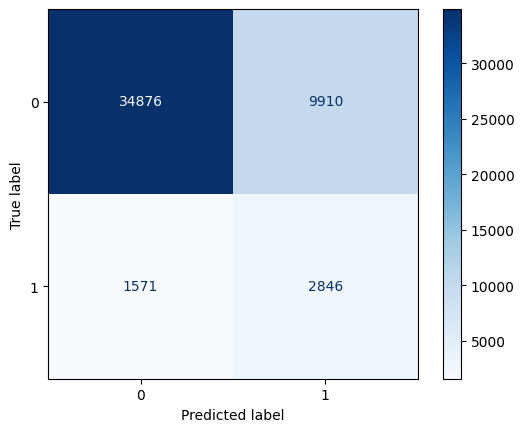

<Figure size 1000x600 with 0 Axes>

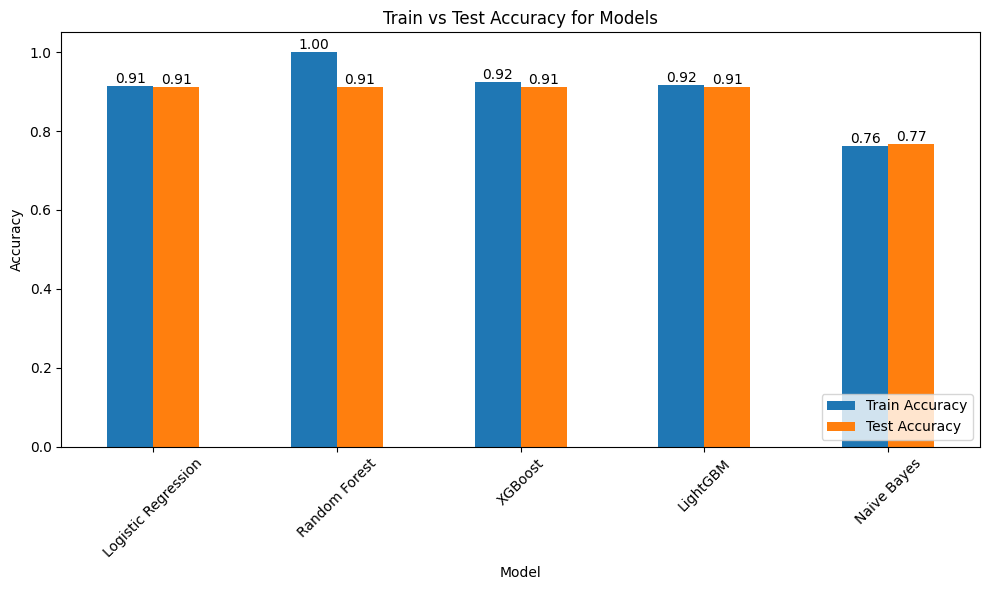

In [ ]:
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC for binary classification
    auc_roc = None
    if len(set(y_test)) == 2:  # Check if binary classification
        y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print classification report
    print(f"\n{name} - Classification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix (Test Set):")
    print(cm)
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')

# Create a DataFrame for results
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame(results)

# Display results
print("\nModel Performance:")
print(results_df)


Model Performance:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC
0  Logistic Regression        0.914796       0.912404  0.843710
1        Random Forest        0.999985       0.911022  0.829445
2              XGBoost        0.924318       0.910798  0.840979
3             LightGBM        0.917103       0.912241  0.846414
4          Naive Bayes        0.763249       0.766661  0.785071


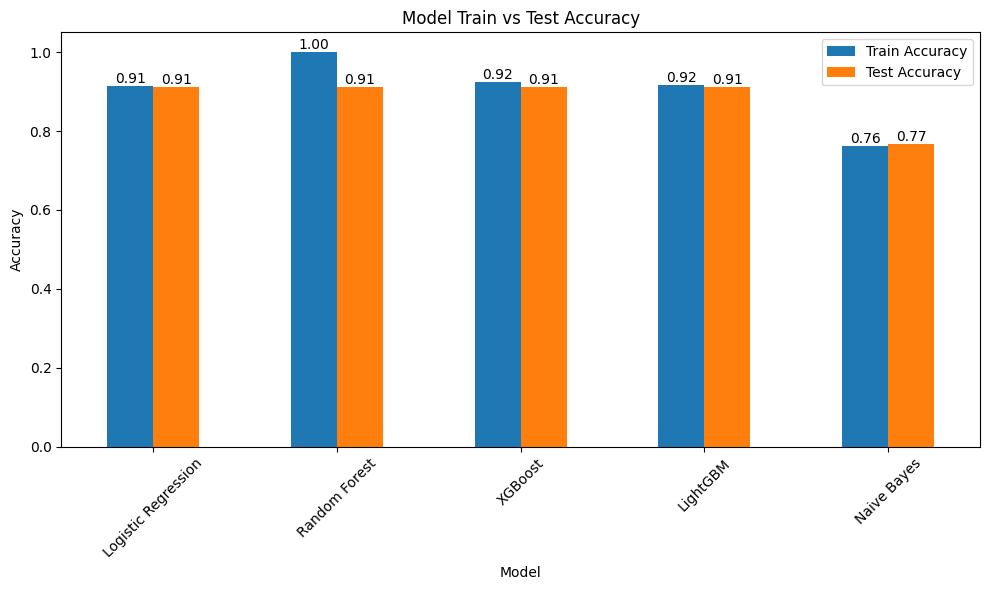

In [ ]:
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6), ax=plt.gca())

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Model Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

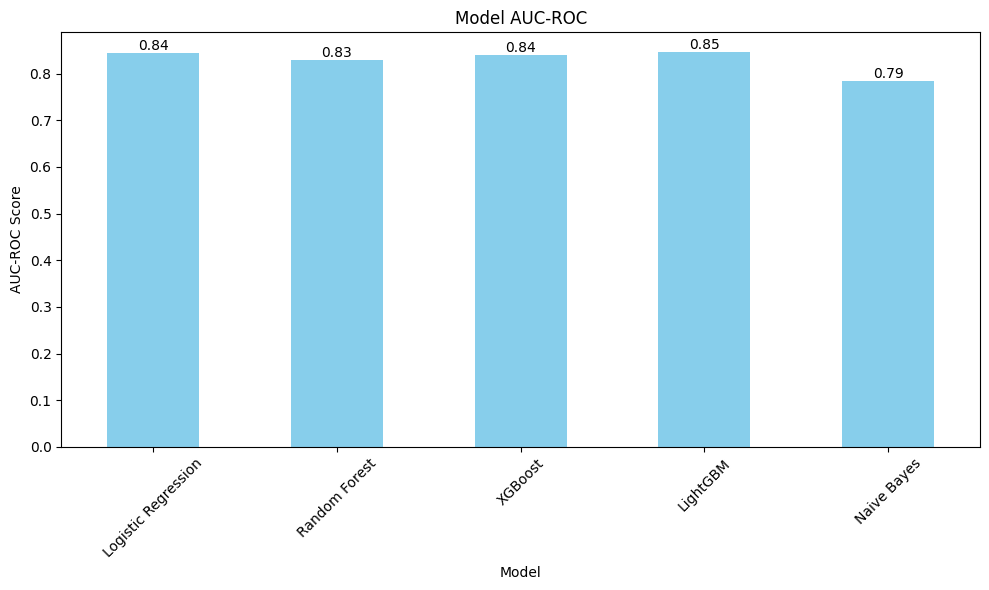

In [ ]:
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')['AUC-ROC'].dropna().plot(kind='bar', color='skyblue', figsize=(10, 6), ax=plt.gca())

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.title('Model AUC-ROC')
plt.ylabel('AUC-ROC Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
best_model = models['XGBoost']
print(type(best_model))
print(best_model.get_params())

<class 'xgboost.sklearn.XGBClassifier'>
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 10, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}



# CSL


In [ ]:
from sklearn.datasets import make_classification
from collections import Counter

class_counts = Counter(y)

# Imbalance Ratio(IR) = Nmj/Nmin

Nmaj = class_counts[0]  # Count for class '0'
Nmin = class_counts[1]  # Count for class '1'

IR = Nmaj / Nmin

print(f"Majority Class (Nmaj): {Nmaj}")
print(f"Minority Class (Nmin): {Nmin}")
print(f"Imbalance Ratio (IR): {IR:.2f}")

Majority Class (Nmaj): 224397
Minority Class (Nmin): 21616
Imbalance Ratio (IR): 10.38


# Weighted Models


Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     44786
           1       0.24      0.78      0.36      4417

    accuracy                           0.76     49203
   macro avg       0.60      0.77      0.61     49203
weighted avg       0.91      0.76      0.80     49203


Logistic Regression - Confusion Matrix:


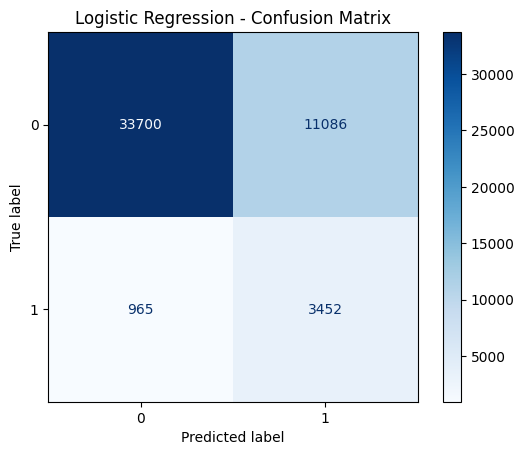


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     44786
           1       0.23      0.78      0.36      4417

    accuracy                           0.75     49203
   macro avg       0.60      0.76      0.60     49203
weighted avg       0.91      0.75      0.80     49203


Random Forest - Confusion Matrix:


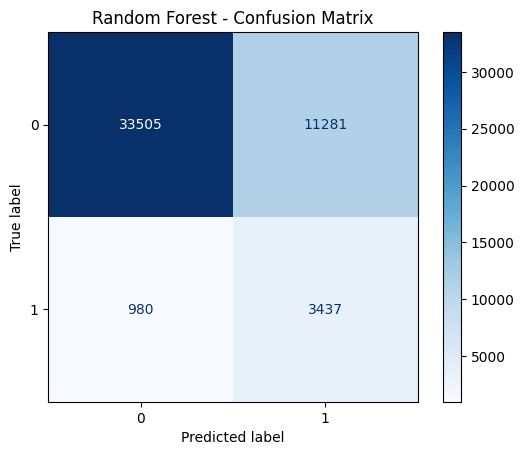


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:47:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.77      0.86     44786
           1       0.24      0.75      0.36      4417

    accuracy                           0.76     49203
   macro avg       0.60      0.76      0.61     49203
weighted avg       0.90      0.76      0.81     49203


XGBoost - Confusion Matrix:


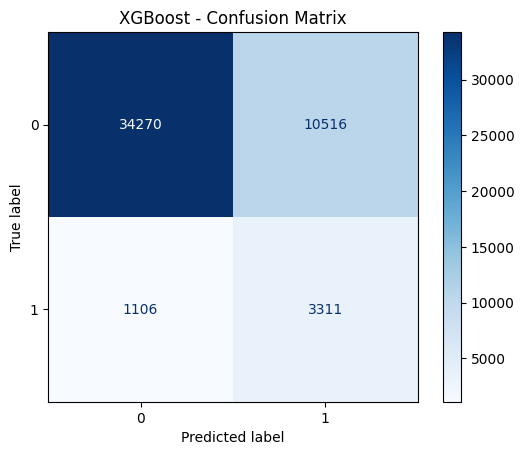


Training LightGBM...
[LightGBM] [Info] Number of positive: 17199, number of negative: 179611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 196810, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087389 -> initscore=-2.345942
[LightGBM] [Info] Start training from score -2.345942

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.73      0.84     44786
           1       0.23      0.80      0.36      4417

    accuracy                           0.74     49203
   macro avg       0.60      0.77      0.60     49203
weighted avg       0.91      0.74      0.79     49203


LightGBM - Confusion Matrix:


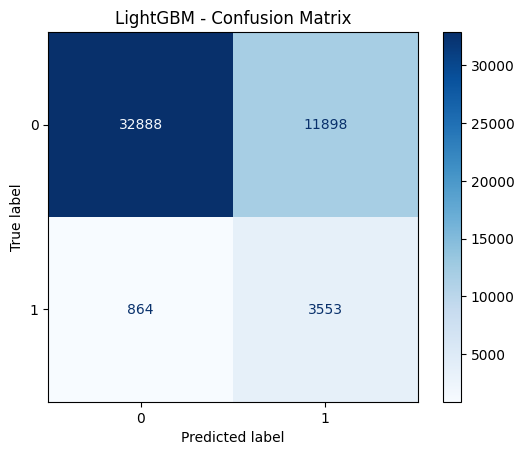


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     44786
           1       0.21      0.71      0.32      4417

    accuracy                           0.73     49203
   macro avg       0.58      0.72      0.58     49203
weighted avg       0.89      0.73      0.79     49203


Naive Bayes - Confusion Matrix:


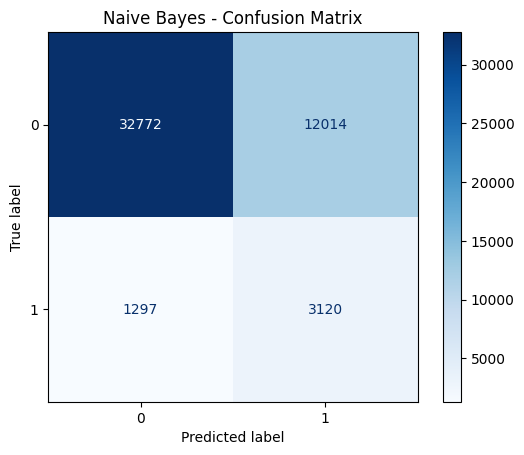


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.751410       0.755076  0.843894   
1        Random Forest        0.753209       0.750808  0.838610   
2              XGBoost        0.780087       0.763795  0.837386   
3             LightGBM        0.741304       0.740626  0.847314   
4          Naive Bayes        0.724724       0.729468  0.785010   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.848322            0.364231          0.752467          0.781526  
1            0.845328            0.359237          0.748113          0.778130  
2            0.855019            0.362969          0.765194          0.749604  
3            0.837505            0.357661          0.734337          0.804392  
4            0.831196            0.319165          0.731747          0.706362  


<Figure size 1000x600 with 0 Axes>

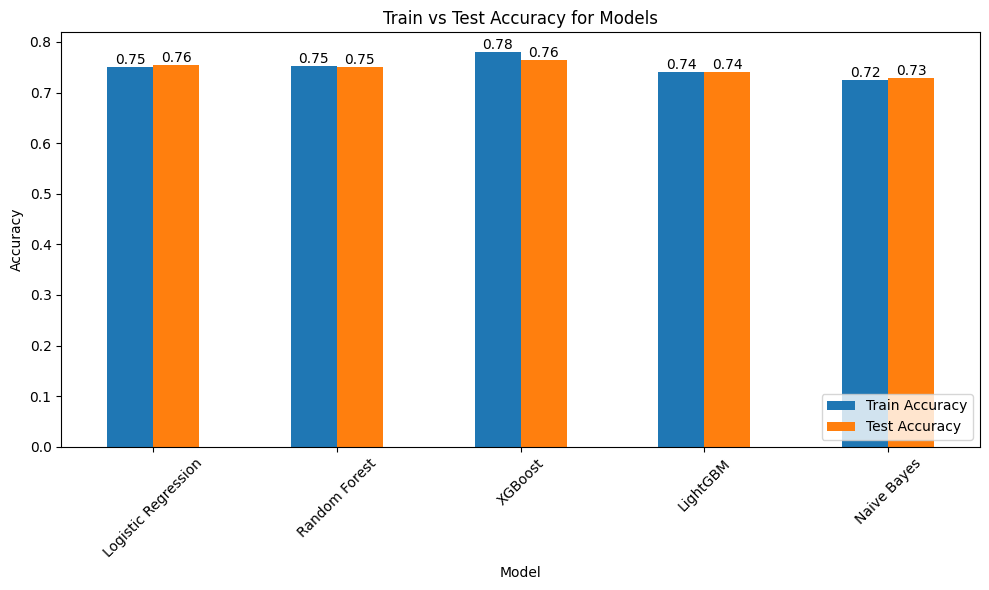

In [ ]:
# Define class weights for models that support it
class_weights = {0: 1, 1: IR}

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights,max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights = [class_weights[y] for y in y_train]
        model.fit(X_train, y_train, sample_weight=sample_weights)
    else:
        model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     44786
           1       0.24      0.78      0.36      4417

    accuracy                           0.75     49203
   macro avg       0.60      0.77      0.61     49203
weighted avg       0.91      0.75      0.80     49203


Logistic Regression - Confusion Matrix:


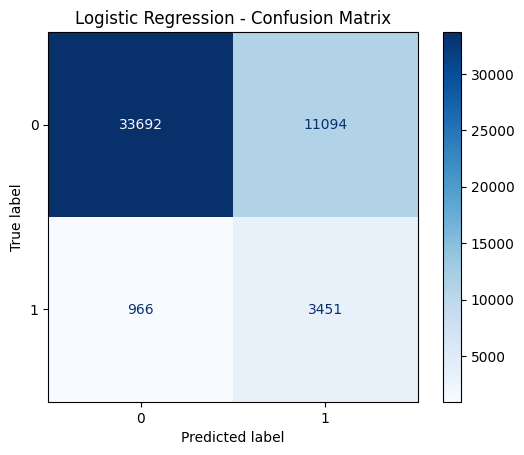


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     44786
           1       0.23      0.78      0.36      4417

    accuracy                           0.75     49203
   macro avg       0.60      0.76      0.60     49203
weighted avg       0.91      0.75      0.80     49203


Random Forest - Confusion Matrix:


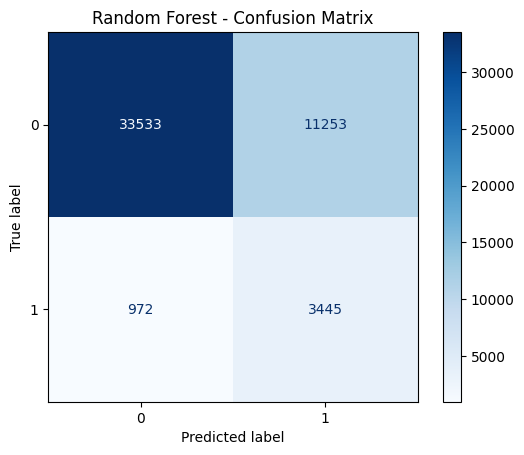


Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:48:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     44786
           1       0.67      0.00      0.00      4417

    accuracy                           0.91     49203
   macro avg       0.79      0.50      0.48     49203
weighted avg       0.89      0.91      0.87     49203


XGBoost - Confusion Matrix:


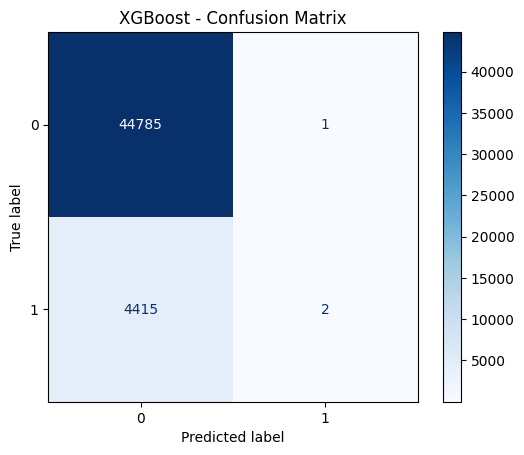


Training LightGBM...
[LightGBM] [Info] Number of positive: 17199, number of negative: 179611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 196810, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087389 -> initscore=-2.345942
[LightGBM] [Info] Start training from score -2.345942

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     44786
           1       1.00      0.00      0.00      4417

    accuracy                           0.91     49203
   macro avg       0.96      0.50      0.48     49203
weighted avg       0.92      0.91      0.87     49203


LightGBM - Confusion Matrix:


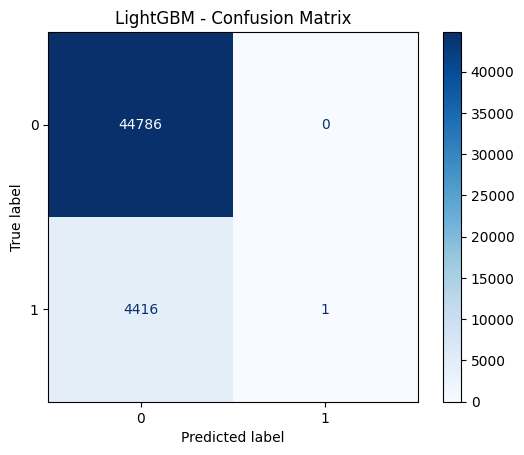


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     44786
           1       0.21      0.71      0.32      4417

    accuracy                           0.73     49203
   macro avg       0.58      0.72      0.58     49203
weighted avg       0.89      0.73      0.79     49203


Naive Bayes - Confusion Matrix:


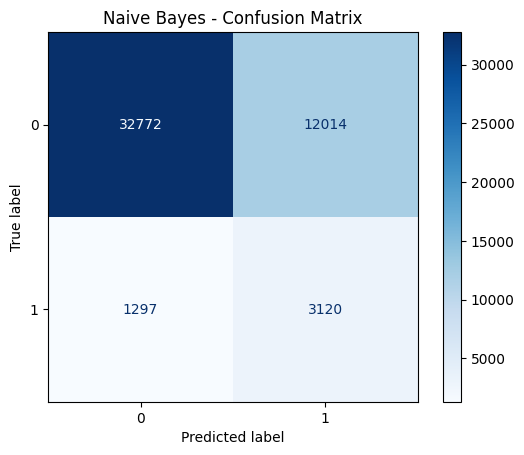


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.751415       0.754893  0.843893   
1        Random Forest        0.753234       0.751540  0.839013   
2              XGBoost        0.912941       0.910249  0.844577   
3             LightGBM        0.912769       0.910249  0.845855   
4          Naive Bayes        0.724724       0.729468  0.785010   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.848195            0.363991          0.752289          0.781300  
1            0.845821            0.360450          0.748738          0.779941  
2            0.953014            0.000905          0.999978          0.000453  
3            0.953015            0.000453          1.000000          0.000226  
4            0.831196            0.319165          0.731747          0.706362  


<Figure size 1000x600 with 0 Axes>

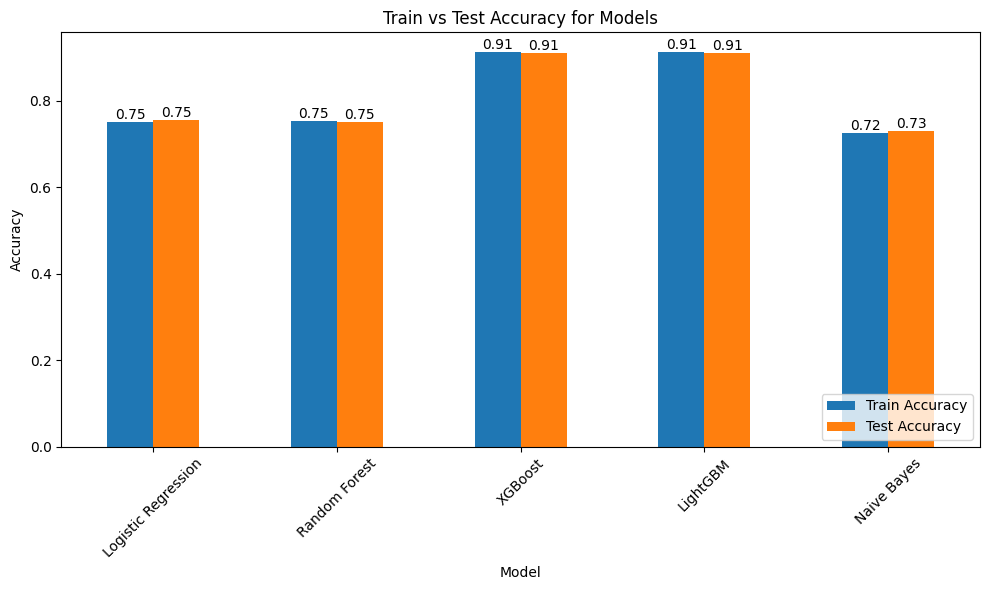

In [ ]:
# Define class weights for models that support it
class_weights2 = {1: 1, 0: (1/IR)}  # Logistic Regression and Random Forest

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights2),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights2,max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(1/IR), random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=(1/IR), random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights2 = [class_weights2[y] for y in y_train]
        model.fit(X_train, y_train, sample_weight=sample_weights2)
    else:
        model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Cost Matrix from Imbalanced-ensemble

In [ ]:
!pip install imbalanced-ensemble


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 744.6/744.6 kB 14.3 MB/s eta 0:00:00


In [ ]:
import imbens
from imbens.ensemble.base import sort_dict_by_key

In [ ]:
cost_matrices = {}

def plot_cost_matrix(cost_matrix, title: str, **kwargs):
    ax = sns.heatmap(data=cost_matrix, **kwargs)
    ax.set_ylabel("Predicted Label")
    ax.set_xlabel("Ground Truth")
    ax.set_title(title)

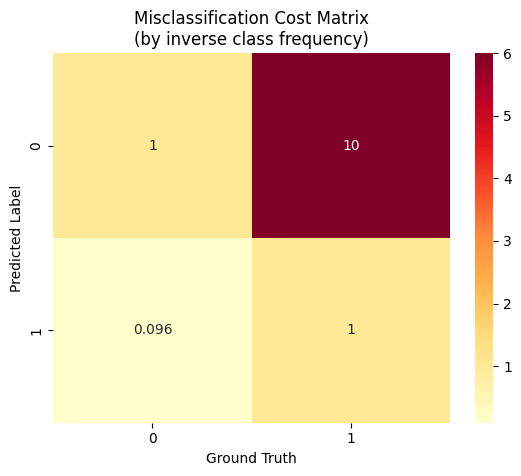

In [ ]:
# Default Cost Matrix

init_kwargs = {
    "n_estimators": 50,
    "learning_rate": 1.0,
    "random_state": 10,
}

adacost_clf = imbens.ensemble.AdaCostClassifier()
adacost_clf.fit(X_train, y_train)

cost_matrix1 = adacost_clf.cost_matrix_

title = "Misclassification Cost Matrix\n(by inverse class frequency)"
cost_matrices[title] = adacost_clf.cost_matrix_
plot_cost_matrix(adacost_clf.cost_matrix_, title, annot=True, cmap='YlOrRd', vmax=6)



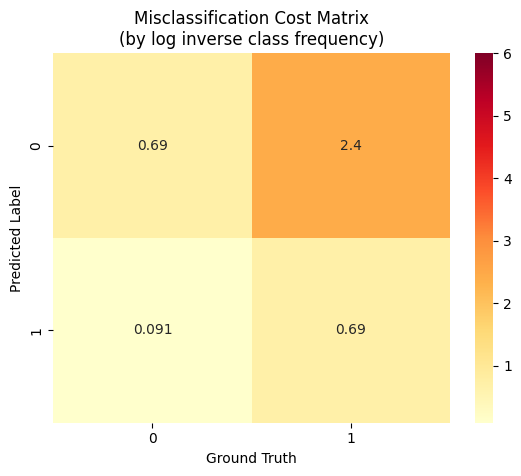

In [ ]:
# log1p-inverse Cost Matrix
adacost_clf.fit(
    X_train,
    y_train,
    cost_matrix='log1p-inverse',  # set cost matrix by log inverse class frequency
)

cost_matrix2 =adacost_clf.cost_matrix_


title = "Misclassification Cost Matrix\n(by log inverse class frequency)"
cost_matrices[title] = adacost_clf.cost_matrix_
plot_cost_matrix(adacost_clf.cost_matrix_, title, annot=True, cmap='YlOrRd', vmax=6)

In [ ]:
cost_matrix1

array([[ 1.        , 10.44310716],
       [ 0.09575694,  1.        ]])

In [ ]:
cost_matrix2

array([[0.69314718, 2.43738755],
       [0.0914454 , 0.69314718]])

In [ ]:
0.09575694/( 0.09575694 +10.44310716)

0.009086077881960733

In [ ]:
#  w0 = c0/ (c1+c0)
#  w1 = c1 /(c1+c0)
# These weights are proportional to the misclassification costs and sum to 1, ensuring that higher misclassification costs lead to higher corresponding class weights


class_weights_licf = {0:0.036161107438907734, 1: 0.9638388925610922}
class_weights_icf = {0:0.009086077881960733, 1:0.9909139221180393}

In [ ]:
for key, value in class_weights_licf.items():
    print(f"Class {key}: {value}")

Class 0: 0.036161107438907734
Class 1: 0.9638388925610922



Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.26      0.41     44786
           1       0.12      0.99      0.21      4417

    accuracy                           0.33     49203
   macro avg       0.56      0.62      0.31     49203
weighted avg       0.92      0.33      0.40     49203


Logistic Regression - Confusion Matrix:


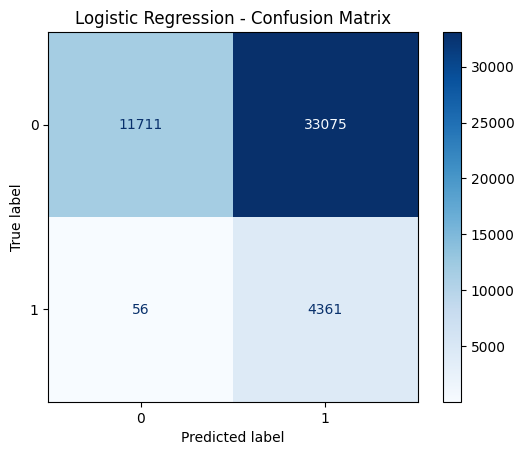


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.21      0.34     44786
           1       0.11      0.99      0.20      4417

    accuracy                           0.28     49203
   macro avg       0.55      0.60      0.27     49203
weighted avg       0.92      0.28      0.33     49203


Random Forest - Confusion Matrix:


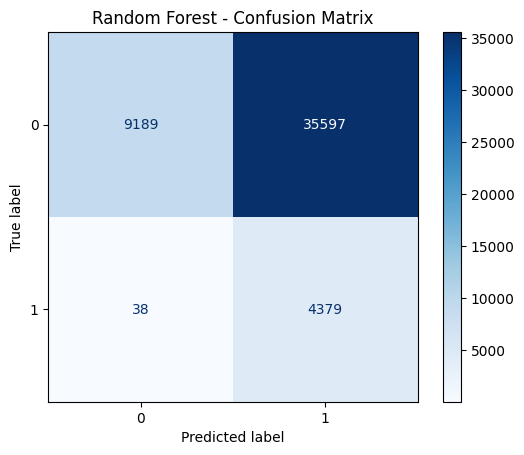


Training XGBoost...

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.44      0.61     44786
           1       0.14      0.94      0.25      4417

    accuracy                           0.48     49203
   macro avg       0.56      0.69      0.43     49203
weighted avg       0.91      0.48      0.57     49203


XGBoost - Confusion Matrix:


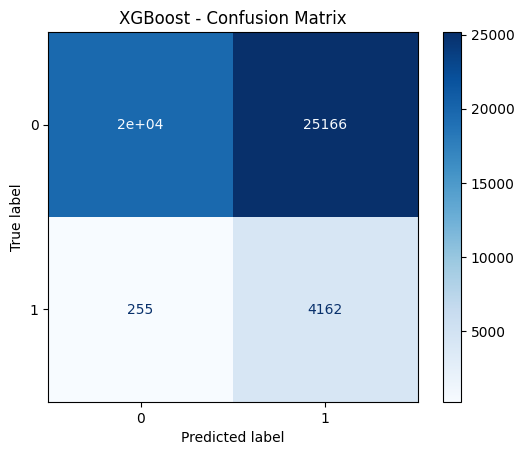


Training LightGBM...
[LightGBM] [Info] Number of positive: 17199, number of negative: 179611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.130136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 196810, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087389 -> initscore=-2.345942
[LightGBM] [Info] Start training from score -2.345942

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.37      0.54     44786
           1       0.13      0.97      0.23      4417

    accuracy                           0.42     49203
   macro avg       0.56      0.67      0.39     49203
weighted avg       0.92      0.42      0.51     49203


LightGBM - Confusion Matrix:


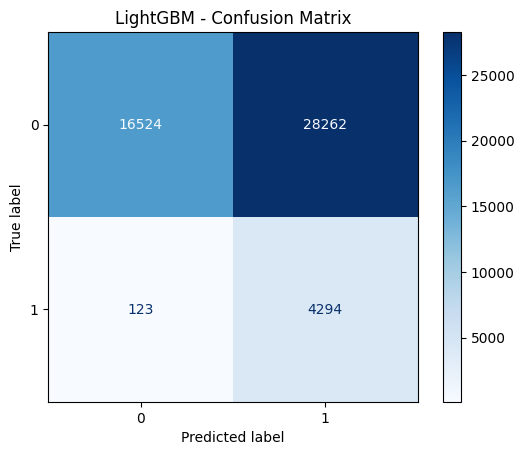


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     44786
           1       0.21      0.71      0.32      4417

    accuracy                           0.73     49203
   macro avg       0.58      0.72      0.58     49203
weighted avg       0.89      0.73      0.79     49203


Naive Bayes - Confusion Matrix:


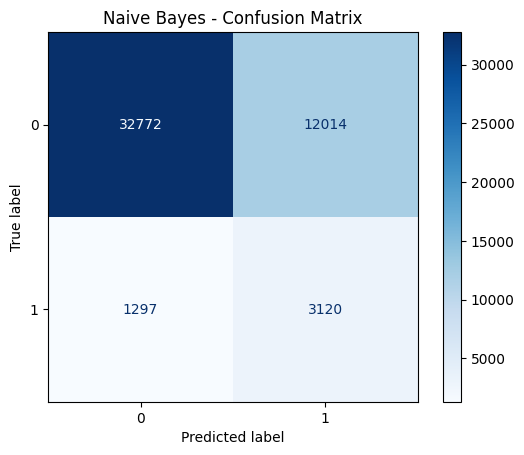


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.324404       0.326647  0.843171   
1        Random Forest        0.275286       0.275756  0.823444   
2              XGBoost        0.490417       0.483345  0.822432   
3             LightGBM        0.422631       0.423104  0.844026   
4          Naive Bayes        0.724724       0.729468  0.785010   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.414160            0.208396          0.261488          0.987322  
1            0.340251            0.197283          0.205176          0.991397  
2            0.606857            0.246674          0.438083          0.942269  
3            0.537952            0.232278          0.368955          0.972153  
4            0.831196            0.319165          0.731747          0.706362  


<Figure size 1000x600 with 0 Axes>

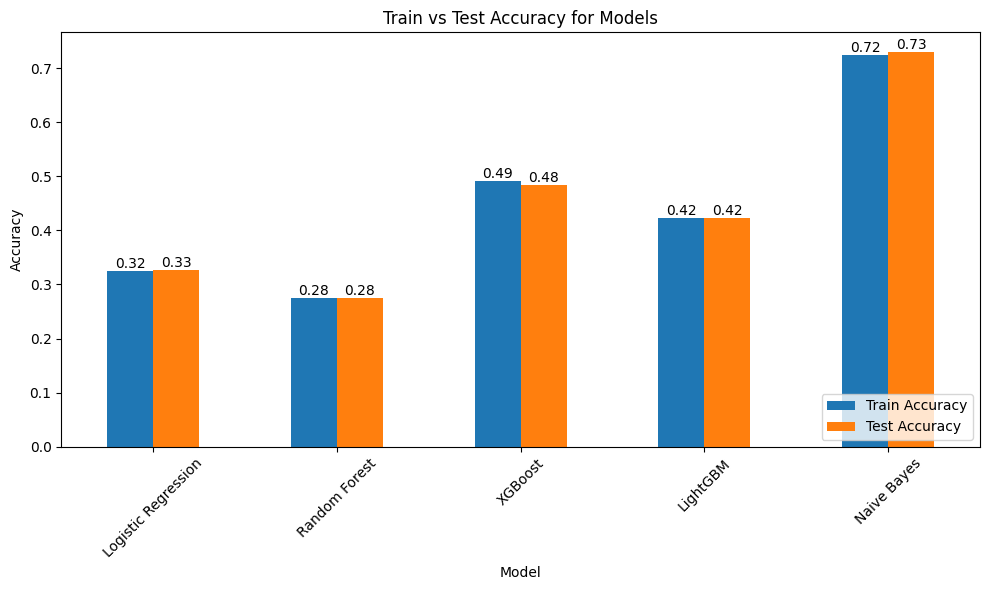

In [ ]:
#scale_pos_weight = (majority class weight / minority class weight).
IR1 = 10.44310716/0.09575694

# Define weighted models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights_icf),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights_icf,max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR1, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR1, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights2 = [class_weights2[y] for y in y_train]
        model.fit(X_train, y_train, sample_weight=sample_weights2)
    else:
        model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.56      0.71     44786
           1       0.17      0.92      0.29      4417

    accuracy                           0.59     49203
   macro avg       0.58      0.74      0.50     49203
weighted avg       0.91      0.59      0.67     49203


Logistic Regression - Confusion Matrix:


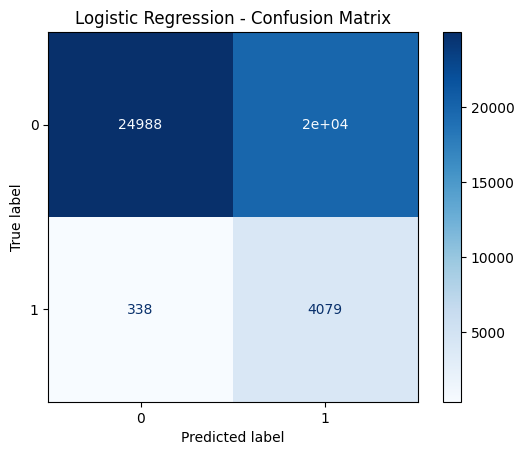


Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.50      0.67     44786
           1       0.16      0.94      0.27      4417

    accuracy                           0.54     49203
   macro avg       0.57      0.72      0.47     49203
weighted avg       0.91      0.54      0.63     49203


Random Forest - Confusion Matrix:


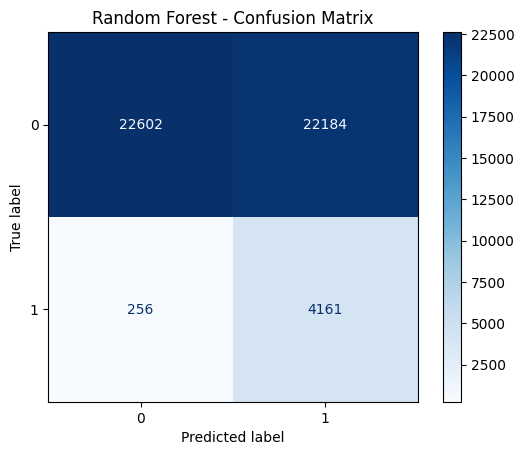


Training XGBoost...

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.62      0.76     44786
           1       0.18      0.88      0.30      4417

    accuracy                           0.64     49203
   macro avg       0.58      0.75      0.53     49203
weighted avg       0.91      0.64      0.72     49203


XGBoost - Confusion Matrix:


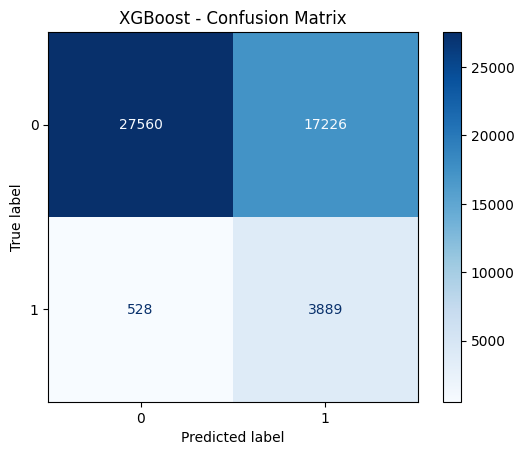


Training LightGBM...
[LightGBM] [Info] Number of positive: 17199, number of negative: 179611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.090906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 907
[LightGBM] [Info] Number of data points in the train set: 196810, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.087389 -> initscore=-2.345942
[LightGBM] [Info] Start training from score -2.345942

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.57      0.72     44786
           1       0.17      0.92      0.29      4417

    accuracy                           0.60     49203
   macro avg       0.58      0.74      0.50     49203
weighted avg       0.91      0.60      0.68     49203


LightGBM - Confusion Matrix:


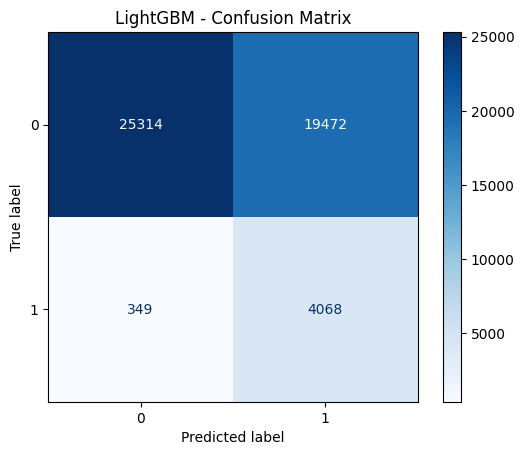


Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     44786
           1       0.21      0.71      0.32      4417

    accuracy                           0.73     49203
   macro avg       0.58      0.72      0.58     49203
weighted avg       0.89      0.73      0.79     49203


Naive Bayes - Confusion Matrix:


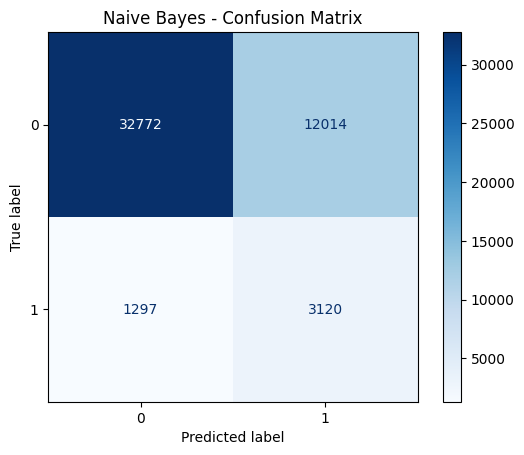


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.586845       0.590757  0.843751   
1        Random Forest        0.541416       0.543930  0.835703   
2              XGBoost        0.651075       0.639168  0.833569   
3             LightGBM        0.596083       0.597159  0.846817   
4          Naive Bayes        0.724724       0.729468  0.785010   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.712802            0.288330          0.557942          0.923477  
1            0.668263            0.270529          0.504667          0.942042  
2            0.756374            0.304637          0.615371          0.880462  
3            0.718648            0.291018          0.565221          0.920987  
4            0.831196            0.319165          0.731747          0.706362  


<Figure size 1000x600 with 0 Axes>

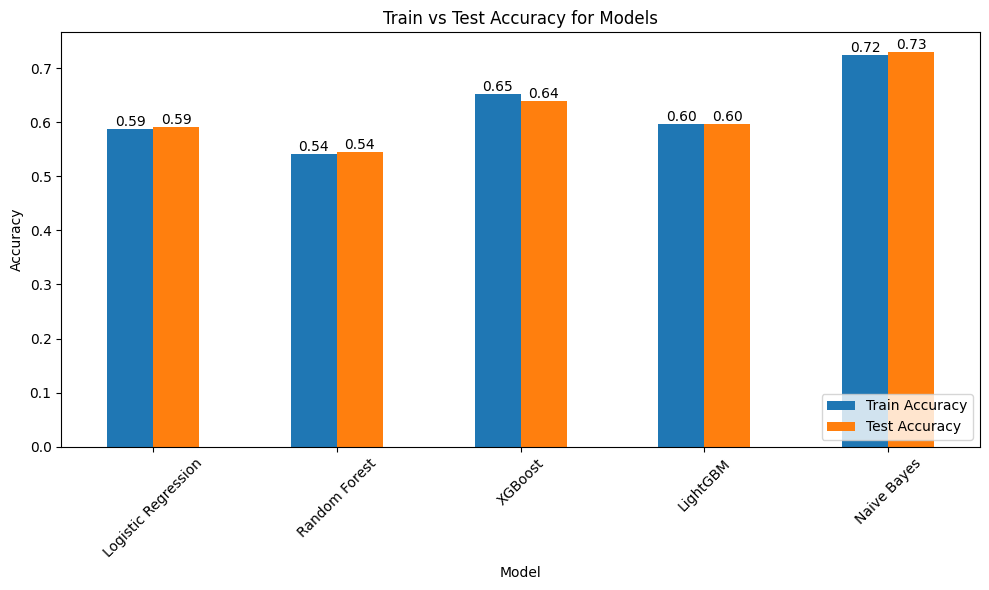

In [ ]:
IR2 = 2.43738755/0.0914454

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10, class_weight=class_weights_licf),
    "Random Forest": RandomForestClassifier(random_state=10, class_weight=class_weights_licf,max_depth=10, n_estimators=130),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=IR2, random_state=10),
    "LightGBM": LGBMClassifier(scale_pos_weight=IR2, random_state=10),
    "Naive Bayes": GaussianNB()  # Naive Bayes doesn't use IR directly
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    if name == "Naive Bayes":
        sample_weights2 = [class_weights2[y] for y in y_train]
        model.fit(X_train, y_train, sample_weight=sample_weights2)
    else:
        model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # AUC-ROC
    auc_roc = None
    if len(set(y_test)) == 2:
        y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(y_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_test_pred))
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
imbalance_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
clf_xgb = XGBClassifier(scale_pos_weight=imbalance_ratio, random_state=42)
clf_xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = clf_xgb.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     44786
           1       0.24      0.75      0.36      4417

    accuracy                           0.76     49203
   macro avg       0.60      0.76      0.61     49203
weighted avg       0.90      0.76      0.81     49203



In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

# Balanced Random Forest
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)
y_pred_brf = brf.predict(X_test)
print("Balanced Random Forest Classification Report:")
print(classification_report(y_test, y_pred_brf))

# Easy Ensemble
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train)
y_pred_eec = eec.predict(X_test)
print("Easy Ensemble Classification Report:")
print(classification_report(y_test, y_pred_eec))

Balanced Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     44786
           1       0.27      0.70      0.39      4417

    accuracy                           0.80     49203
   macro avg       0.62      0.75      0.64     49203
weighted avg       0.90      0.80      0.84     49203

Easy Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     44786
           1       0.24      0.78      0.36      4417

    accuracy                           0.75     49203
   macro avg       0.60      0.77      0.60     49203
weighted avg       0.91      0.75      0.80     49203



In [ ]:
2.43738755/0.0914454

26.65402032250939

In [ ]:
'''print("Cost Matrix:")
print(cost_matrix)

def compute_sample_weights(y, cost_matrix):
    """
    Compute sample weights using the cost matrix.

    Args:
        y (array-like): True labels for the dataset.
        cost_matrix (2D array): Misclassification cost matrix.

    Returns:
        np.ndarray: Sample weights for each instance.
    """
    return np.array([
        cost_matrix[label, label] + cost_matrix[label, 1 - label]
        for label in y
    ])

# Compute sample weights for training dataset
sample_weights_train = compute_sample_weights(y_train, cost_matrix)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
}

# Store results
results = []
classification_reports = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    ### Cost-Insensitive Model ###
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on test data
    y_pred_insensitive = model.predict(X_test_scaled)
    y_prob_insensitive = model.predict_proba(X_test_scaled)[:, 1]

    # Evaluate the cost-insensitive model
    accuracy_insensitive = accuracy_score(y_test, y_pred_insensitive)
    auc_insensitive = roc_auc_score(y_test, y_prob_insensitive)
    report_insensitive = classification_report(y_test, y_pred_insensitive, output_dict=True)

    # Save results for cost-insensitive model
    results.append({
        "Model": f"{name} (Cost-Insensitive)",
        "Accuracy": accuracy_insensitive,
        "Precision (Class 1)": report_insensitive["1"]["precision"],
        "Recall (Class 1)": report_insensitive["1"]["recall"],
        "F1-Score (Class 1)": report_insensitive["1"]["f1-score"],
        "AUC": auc_insensitive,
    })

    # Save full classification report
    classification_reports[f"{name} (Cost-Insensitive)"] = classification_report(y_test, y_pred_insensitive)

    ### Cost-Sensitive Model ###
    # Train the model with sample weights
    model.fit(X_train_scaled, y_train, sample_weight=sample_weights_train)

    # Predict on test data
    y_pred_sensitive = model.predict(X_test_scaled)
    y_prob_sensitive = model.predict_proba(X_test_scaled)[:, 1]

    # Evaluate the cost-sensitive model
    accuracy_sensitive = accuracy_score(y_test, y_pred_sensitive)
    auc_sensitive = roc_auc_score(y_test, y_prob_sensitive)
    report_sensitive = classification_report(y_test, y_pred_sensitive, output_dict=True)

    # Save results for cost-sensitive model
    results.append({
        "Model": f"{name} (Cost-Sensitive)",
        "Accuracy": accuracy_sensitive,
        "Precision (Class 1)": report_sensitive["1"]["precision"],
        "Recall (Class 1)": report_sensitive["1"]["recall"],
        "F1-Score (Class 1)": report_sensitive["1"]["f1-score"],
        "AUC": auc_sensitive,
    })

    # Save full classification report
    classification_reports[f"{name} (Cost-Sensitive)"] = classification_report(y_test, y_pred_sensitive)


results_df = pd.DataFrame(results)

# Display results
print("\nModel Comparison Results:")
print(results_df)'''


'print("Cost Matrix:")\nprint(cost_matrix)\n\ndef compute_sample_weights(y, cost_matrix):\n    """\n    Compute sample weights using the cost matrix.\n\n    Args:\n        y (array-like): True labels for the dataset.\n        cost_matrix (2D array): Misclassification cost matrix.\n\n    Returns:\n        np.ndarray: Sample weights for each instance.\n    """\n    return np.array([\n        cost_matrix[label, label] + cost_matrix[label, 1 - label]\n        for label in y\n    ])\n\n# Compute sample weights for training dataset\nsample_weights_train = compute_sample_weights(y_train, cost_matrix)\n\n# Define models\nmodels = {\n    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),\n    "Random Forest": RandomForestClassifier(random_state=42),\n    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=\'logloss\'),\n}\n\n# Store results\nresults = []\nclassification_reports = {}\n\nfor name, model in models.items():\n    print(f"\nTraining 

# Hyperparameter Optimization

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

#Logistic Regression


In [ ]:
IR = 10.38
class_weights = {0: 1, 1: IR}

def objective(trial):
    C = trial.suggest_loguniform('C', 1e-5, 10)  # Regularization strength
    solver = trial.suggest_categorical('solver', ['lbfgs', 'liblinear'])  # Solver
    penalty = 'l2' if solver == 'lbfgs' else trial.suggest_categorical('penalty', ['l1', 'l2'])

    model = LogisticRegression(C=C, solver=solver, penalty=penalty,
                               max_iter=1000, class_weight=class_weights, random_state=10)

    score = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='f1').mean()
    return score  # Optuna will maximize F1-score

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=35)  # Run 50 trials

[I 2025-02-20 14:57:53,415] A new study created in memory with name: no-name-44ac398a-9be1-4ece-a818-ba1fbd3397cc
<ipython-input-30-adf813ed225b>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 10)  # Regularization strength
[I 2025-02-20 14:58:01,093] Trial 0 finished with value: 0.3550039313823639 and parameters: {'C': 0.0016104341775769007, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.3550039313823639.
<ipython-input-30-adf813ed225b>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 10)  # Regularization strength
[I 2025-02-20 14:58:06,848] Trial 1 finished with value: 0.354848815403

In [ ]:
# Train the best Logistic Regression model
best_params = study.best_params
logistic_model = LogisticRegression(**best_params, max_iter=1000, class_weight=class_weights, random_state=10)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.00023921336045630725, class_weight={0: 1, 1: 10.38},
                   max_iter=1000, random_state=10)

In [ ]:
# Predict on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85     44786
           1       0.24      0.78      0.36      4417

    accuracy                           0.76     49203
   macro avg       0.60      0.77      0.61     49203
weighted avg       0.91      0.76      0.81     49203

Confusion Matrix:
 [[33786 11000]
 [  986  3431]]


# shap part

In [ ]:
import shap
shap.initjs()

explainer = shap.Explainer(logistic_model ,X_train_scaled_df)
shap_values = explainer.shap_values(X_test_scaled_df)

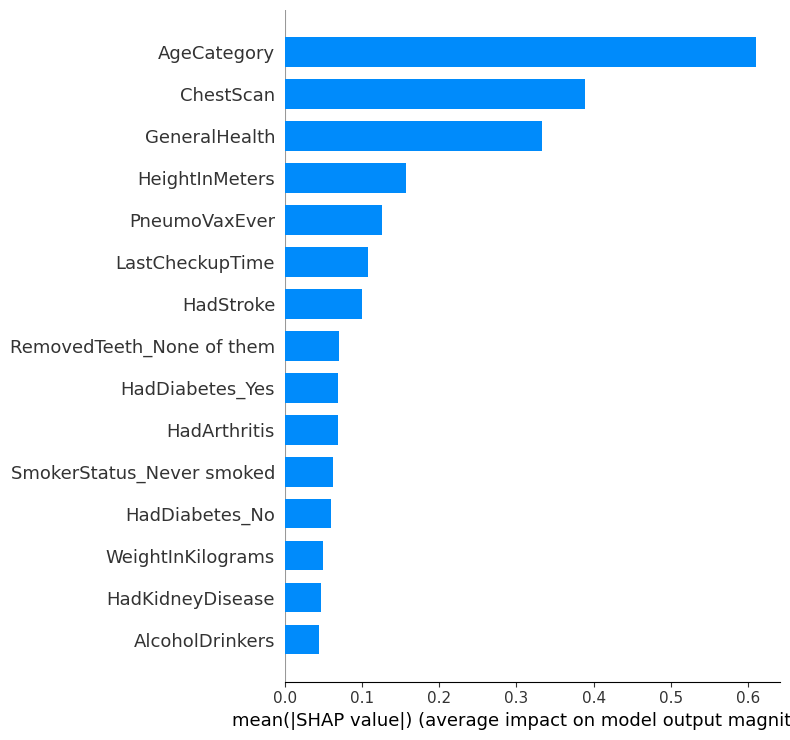

In [ ]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar",feature_names=X_test.columns,max_display=15)

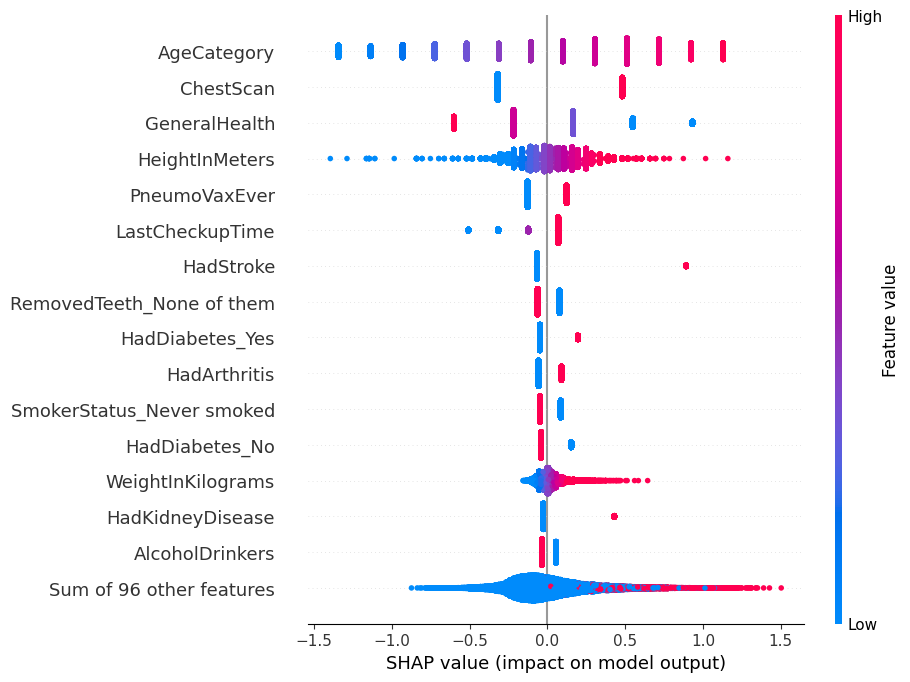

In [ ]:
shap_values_1 = explainer(X_test_scaled_df)
shap_values_1.feature_names = list(X_train_scaled_df.columns)

#shap.plots.beeswarm(shap_values_1)

#shap.plots.beeswarm(shap_values_1)
shap.plots.beeswarm(shap_values_1, max_display=16)

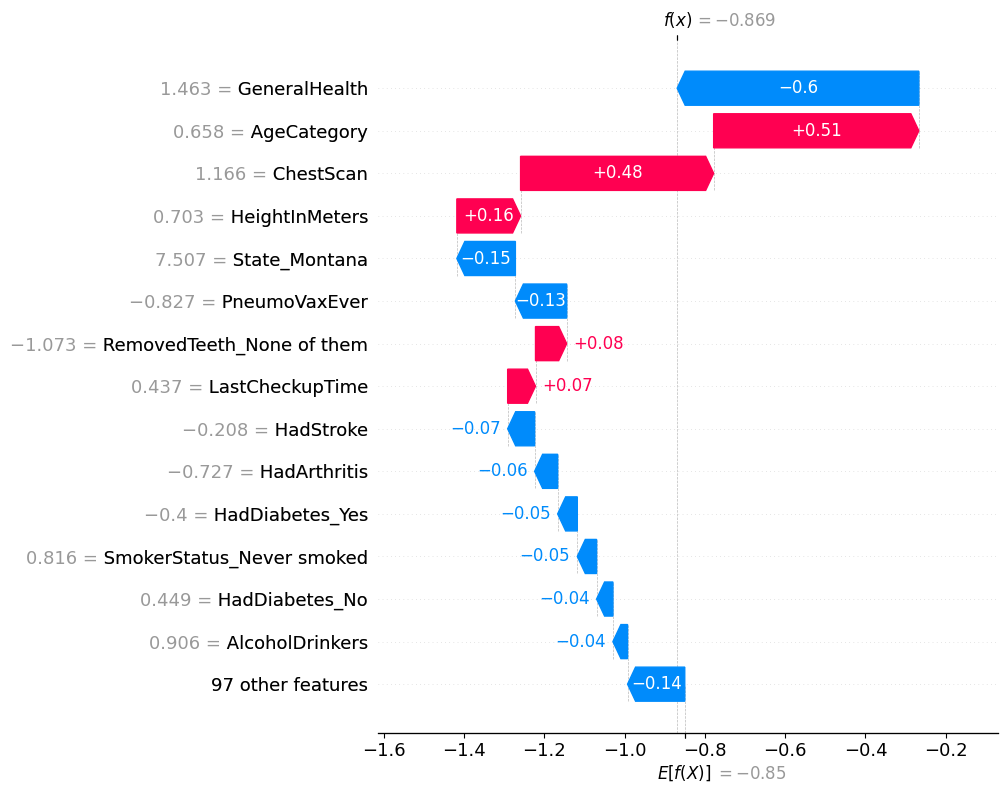

In [ ]:
sample_index = 5
shap.plots.waterfall(shap_values_1[sample_index], max_display=15)


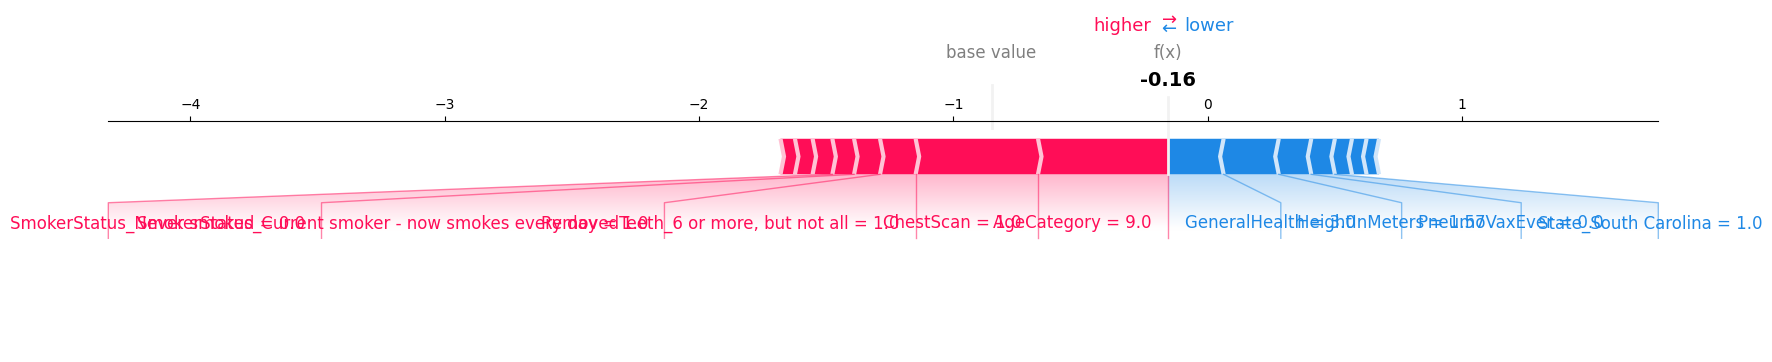

In [ ]:
# Get indices of the top 15 absolute SHAP values
top_15_indices = np.argsort(np.abs(shap_values[0, :]))[-15:]

# Filter SHAP values and feature names
shap_values_filtered = shap_values[0, top_15_indices]
X_test_filtered = X_test.iloc[0, top_15_indices]

# Force plot with only top 15 features
shap.force_plot(
    explainer.expected_value,
    shap_values_filtered,
    X_test_filtered,
    matplotlib=True
)

#RF


In [ ]:
IR = 10.38
class_weights = {0: 1, 1: IR}

def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=10)  # Number of trees
    max_depth = trial.suggest_int('max_depth', 5, 30, step=5)  # Depth of each tree
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)  # Minimum samples to split
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)  # Minimum samples per leaf

    # Create Random Forest model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   class_weight=class_weights, random_state=10, n_jobs=-1)

    # Cross-validation to evaluate the model
    score = cross_val_score(model, X_train_scaled, y_train, cv=2, scoring='f1').mean()
    return score  # Optuna will maximize F1-score

# Run Optuna optimization
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=20)

[I 2025-02-21 09:19:55,298] A new study created in memory with name: no-name-9d84b2d8-b1dc-4905-9320-6c7a7ffec644
[I 2025-02-21 09:21:27,035] Trial 0 finished with value: 0.3801325260758342 and parameters: {'n_estimators': 260, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.3801325260758342.
[I 2025-02-21 09:21:44,748] Trial 1 finished with value: 0.35305502358578855 and parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.3801325260758342.
[I 2025-02-21 09:22:31,286] Trial 2 finished with value: 0.39507058135102935 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 15, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.39507058135102935.
[I 2025-02-21 09:23:34,446] Trial 3 finished with value: 0.3371999230561791 and parameters: {'n_estimators': 240, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 8}. Best is trial 2 with va

In [ ]:
# Train the best Random Forest model
best_rf_params = study_rf.best_params
random_forest_model = RandomForestClassifier(**best_rf_params, class_weight=class_weights, random_state=10, n_jobs=-1)
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10.38}, max_depth=25,
                       min_samples_leaf=5, min_samples_split=17,
                       n_estimators=290, n_jobs=-1, random_state=10)

In [ ]:
# Predict on the test set
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Generate confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91     44786
           1       0.31      0.59      0.41      4417

    accuracy                           0.85     49203
   macro avg       0.63      0.73      0.66     49203
weighted avg       0.90      0.85      0.87     49203

Confusion Matrix:
 [[39047  5739]
 [ 1827  2590]]


# shap part

In [ ]:
import shap

shap.initjs()  # Initialize SHAP visualization

# Use TreeExplainer for better speed
explainer_rf = shap.TreeExplainer(random_forest_model)

In [ ]:
shap_values = explainer_rf.shap_values(X_test_scaled_df)

In [ ]:
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar",feature_names=X_test.columns,max_display=15)

In [ ]:
shap_values_1 = explainer(X_test_scaled_df)
shap_values_1.feature_names = list(X_train_scaled_df.columns)

#shap.plots.beeswarm(shap_values_1)

#shap.plots.beeswarm(shap_values_1)
shap.plots.beeswarm(shap_values_1, max_display=16)

In [ ]:
sample_index = 5
shap.plots.waterfall(shap_values_1[sample_index], max_display=15)

In [ ]:
# Limit SHAP computation to a subset (e.g., 1000 rows)
'''subset_size = 1000
X_test_subset = X_test_scaled_df.sample(subset_size, random_state=42)

# Compute SHAP values efficiently
shap_values_rf = explainer_rf.shap_values(X_test_subset)

# Feature names (Ensure they are correctly assigned)
shap_values_rf.feature_names = list(X_train_scaled_df.columns)

# Summary plot for top 15 features
shap.summary_plot(shap_values_rf[1], X_test_subset, plot_type="bar", feature_names=X_test_subset.columns, max_display=15)'''

In [ ]:
IR = 10.38
class_weights = {0: (1/IR), 1:1}

def objective(trial):
    # Define hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 300, step=10)  # Number of trees
    max_depth = trial.suggest_int('max_depth', 5, 30, step=5)  # Depth of each tree
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)  # Minimum samples to split
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)  # Minimum samples per leaf

    # Create Random Forest model
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   class_weight=class_weights, random_state=10, n_jobs=-1)

    # Cross-validation to evaluate the model
    score = cross_val_score(model, X_train_scaled, y_train, cv=2, scoring='f1').mean()
    return score  # Optuna will maximize F1-score

# Run Optuna optimization
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=20)

#XG-Boost


In [ ]:
import xgboost as xgb

In [ ]:
import xgboost as xgb
import pandas as pd

def objective_xgb(trial):
    """
    Objective function for XGBoost hyperparameter optimization using Optuna.
    """
    # Define the hyperparameter search space
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 15.0, 50.0),
        "objective": "binary:logistic",
        "eval_metric": "auc",  # Evaluation metric for classification
        "seed": 10,  # Ensure reproducibility
    }

    # Native XGBoost DMatrix for optimized processing
    dtrain = xgb.DMatrix(X_train_scaled, label=y_train)

    # Perform cross-validation using native XGBoost
    cv_results = xgb.cv(
        params=param,
        dtrain=dtrain,
        num_boost_round=300,  # Use a fixed upper limit; controlled by "n_estimators"
        nfold=5,
        metrics="auc",
        as_pandas=True,
        seed=10,  # Ensure reproducibility
        early_stopping_rounds=10  # Stops if no improvement is observed
    )

    # Return the mean AUC from the last iteration of cross-validation
    return cv_results["test-auc-mean"].iloc[-1]

# Set a fixed seed for Optuna's sampler
sampler = optuna.samplers.TPESampler(seed=10)

# Create an Optuna study for maximization
study_xgb = optuna.create_study(direction="maximize", sampler=sampler)

# Run the optimization process
study_xgb.optimize(objective_xgb, n_trials=50)

# Output the best parameters and the corresponding AUC score
print("Best parameters for XGBoost:", study_xgb.best_params)
print("Best AUC for XGBoost:", study_xgb.best_value)


[I 2025-02-06 11:42:03,986] A new study created in memory with name: no-name-81031949-b959-429b-ba9c-1fbfc327eb5d
[I 2025-02-06 11:43:10,774] Trial 0 finished with value: 0.8485548524887138 and parameters: {'learning_rate': 0.23368298654735634, 'max_depth': 3, 'min_child_weight': 6.702834114336479, 'subsample': 0.8744019412693059, 'colsample_bytree': 0.7492535061512953, 'scale_pos_weight': 22.86788259357967}. Best is trial 0 with value: 0.8485548524887138.
[I 2025-02-06 11:43:53,150] Trial 1 finished with value: 0.8381597894331616 and parameters: {'learning_rate': 0.06743823078029094, 'max_depth': 9, 'min_child_weight': 2.521997529062819, 'subsample': 0.5441699070870052, 'colsample_bytree': 0.8426799091838986, 'scale_pos_weight': 48.36876711682278}. Best is trial 0 with value: 0.8485548524887138.
[I 2025-02-06 11:44:11,881] Trial 2 finished with value: 0.8424131828034522 and parameters: {'learning_rate': 0.01114499723509519, 'max_depth': 7, 'min_child_weight': 8.313588654869022, 'subsa

KeyboardInterrupt: 

In [ ]:
# Get the best parameters from Optuna
best_params_xgb = study_xgb.best_params

# Add static parameters for the final model
best_params_xgb.update({
    "objective": "binary:logistic",
    "eval_metric": "auc",  # AUC for evaluation
    "random_state": 10  # Ensure reproducibility
})

# Convert training data to DMatrix
dtrain_final = xgb.DMatrix(X_train_scaled, label=y_train)

# Train the final model
clf_xgb = xgb.train(
    params=best_params_xgb,
    dtrain=dtrain_final,
    num_boost_round=300  # Use a fixed number of boosting rounds
)

# Convert test data to DMatrix
dtest_final = xgb.DMatrix(X_test_scaled)

# Make predictions
y_prob_xgb = clf_xgb.predict(dtest_final)  # Probability for class 1
y_pred_xgb = (y_prob_xgb > 0.5).astype(int)  # Apply a 0.5 threshold

# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost AUC:", roc_auc_score(y_test, y_prob_xgb))


In [ ]:
def objective_lgbm(trial):
    # Define the hyperparameter space
    param = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_samples": trial.suggest_int("min_child_samples", 10, 100),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.5, 1.0),
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 5.0, 25.0),
    }

    # Define the model
    model = LGBMClassifier(**param, random_state=10)

    # Perform cross-validation
    score = cross_val_score(model, X_train_scaled, y_train, scoring="roc_auc", cv=5, n_jobs=-1)
    return score.mean()

# Run the optimization
study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=50)

# Best parameters and score
print("Best parameters for LightGBM:", study_lgbm.best_params)
print("Best AUC for LightGBM:", study_lgbm.best_value)

In [ ]:
best_params_lgbm = study_lgbm.best_params
clf_lgbm_weight = LGBMClassifier(**best_params_lgbm, random_state=10)
clf_lgbm_weight.fit(X_train_scaled, y_train)

In [ ]:
# Evaluate LightGBM
y_pred_lgbm_weight = clf_lgbm_weight.predict(X_test_scaled)
y_prob_lgbm_weight = clf_lgbm_weight.predict_proba(X_test_scaled)[:, 1]
print("LightGBM with Tuned scale_pos_weight Classification Report:")
print(classification_report(y_test, y_pred_lgbm_weight))
print("LightGBM AUC:", roc_auc_score(y_test, y_prob_lgbm_weight))

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize LightGBMClassifier with provided parameters
clf_lgbm = LGBMClassifier(
    feature_fraction=0.7014209206364607,
    learning_rate=0.028113057078210504,
    max_depth=7,
    min_child_samples=52,
    n_estimators=280,
    num_leaves=30,
    random_state=10,
    scale_pos_weight=6.692680134712708
)

# Train the model
clf_lgbm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lgbm = clf_lgbm.predict(X_test_scaled)
y_prob_lgbm = clf_lgbm.predict_proba(X_test_scaled)[:, 1]  # Probability for class 1

# Evaluate the model
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))
print("LightGBM AUC:", roc_auc_score(y_test, y_prob_lgbm))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_lgbm.classes_).plot(cmap='Blues')

# Feature Importance
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': clf_lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (LightGBM)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import cross_val_score


# Define the objective function
def objective_brf(trial):
    # Hyperparameter space for BalancedRandomForestClassifier
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),  # Number of trees
        "max_depth": trial.suggest_int("max_depth", 3, 30),  # Maximum depth of trees
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),  # Minimum samples to split a node
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),  # Minimum samples in a leaf node
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),  # Features to consider at each split
        "class_weight": trial.suggest_categorical("class_weight", [None, "balanced", "balanced_subsample"]),  # Class weights
    }

    # Define the model with the sampled parameters
    model = BalancedRandomForestClassifier(random_state=10, **param)

    # Evaluate using cross-validation with ROC-AUC
    score = cross_val_score(
        model,
        X_train_scaled,
        y_train,
        scoring="roc_auc",
        cv=5,
        n_jobs=-1
    )

    # Return the mean ROC-AUC score
    return score.mean()

# Create Optuna study and optimize
study_brf = optuna.create_study(direction="maximize")
study_brf.optimize(objective_brf, n_trials=50)

# Print the best parameters and AUC score
print("Best parameters for BalancedRandomForestClassifier:", study_brf.best_params)
print("Best AUC score from cross-validation:", study_brf.best_value)

# Train the final model with the best parameters
best_params_brf = study_brf.best_params
brf_optimized = BalancedRandomForestClassifier(random_state=10, **best_params_brf)
brf_optimized.fit(X_train_scaled, y_train)

# Evaluate the optimized model on the test set
y_pred_brf = brf_optimized.predict(X_test_scaled)
y_prob_brf = brf_optimized.predict_proba(X_test_scaled)[:, 1]

print("Optimized Balanced Random Forest Classification Report:")
print(classification_report(y_test, y_pred_brf))
print("Balanced Random Forest AUC:", roc_auc_score(y_test, y_prob_brf))

#SMOTE








In [ ]:
data_copy3 = processed_data1.copy()
data_copy3

State_Alabama  State_Alaska  State_Arizona  State_Arkansas  \
0                 1.0           0.0            0.0             0.0   
1                 1.0           0.0            0.0             0.0   
2                 1.0           0.0            0.0             0.0   
3                 1.0           0.0            0.0             0.0   
4                 1.0           0.0            0.0             0.0   
...               ...           ...            ...             ...   
246017            0.0           0.0            0.0             0.0   
246018            0.0           0.0            0.0             0.0   
246019            0.0           0.0            0.0             0.0   
246020            0.0           0.0            0.0             0.0   
246021            0.0           0.0            0.0             0.0   

        State_California  State_Colorado  State_Connecticut  State_Delaware  \
0                    0.0             0.0                0.0             0.0   
1                    0.0             0.0                0.0             0.0   
2                    0.0             0.0                0.0             0.0   
3                    0.0             0.0                0.0             0.0   
4                    0.0             0.0                0.0             0.0   
...                  ...             ...                ...             ...   
246017               0.0             0.0                0.0             0.0   
246018               0.0             0.0                0.0             0.0   
246019               0.0             0.0                0.0             0.0   
246020               0.0             0.0                0.0             0.0   
246021               0.0             0.0                0.0             0.0   

        State_District of Columbia  State_Florida  ...  GeneralHealth  \
0                              0.0            0.0  ...              3   
1                              0.0            0.0  ...              3   
2                              0.0            0.0  ...              3   
3                              0.0            0.0  ...              1   
4                              0.0            0.0  ...              2   
...                            ...            ...  ...            ...   
246017                         0.0            0.0  ...              3   
246018                         0.0            0.0  ...              1   
246019                         0.0            0.0  ...              2   
246020                         0.0            0.0  ...              4   
246021                         0.0            0.0  ...              3   

        LastCheckupTime  AgeCategory  PhysicalHealthDays  MentalHealthDays  \
0                     3            9                 4.0               0.0   
1                     3           10                 0.0               0.0   
2                     3           11                 0.0               0.0   
3                     3           12                 5.0               0.0   
4                     3           12                 3.0              15.0   
...                 ...          ...                 ...               ...   
246017                2            8                 0.0               0.0   
246018                3            1                 0.0               7.0   
246019                3            9                 0.0              15.0   
246020                3            6                 2.0               2.0   
246021                3           10                 0.0               0.0   

        SleepHours  HeightInMeters  WeightInKilograms    BMI  \
0              9.0            1.60              71.67  27.99   
1              6.0            1.78              95.25  30.13   
2              8.0            1.85             108.86  31.66   
3              9.0            1.70              90.72  31.32   
4              5.0            1.55              79.38  33.07   
...            ...  

In [ ]:
data_copy3['HeartConditionBinary'] = data_copy3['HeartConditionBinary'].astype('category')
#data_copy3['Sex'] = data_copy3['Sex'].astype('category')

In [ ]:
numerical_cols3 = data_copy3.select_dtypes(include=['float64','number']).columns
numerical_data3 = data_copy3[numerical_cols]
numerical_data3

PhysicalHealthDays  MentalHealthDays  SleepHours  HeightInMeters  \
0                      4.0               0.0         9.0            1.60   
1                      0.0               0.0         6.0            1.78   
2                      0.0               0.0         8.0            1.85   
3                      5.0               0.0         9.0            1.70   
4                      3.0              15.0         5.0            1.55   
...                    ...               ...         ...             ...   
246017                 0.0               0.0         6.0            1.78   
246018                 0.0               7.0         7.0            1.93   
246019                 0.0              15.0         7.0            1.68   
246020                 2.0               2.0         7.0            1.70   
246021                 0.0               0.0         5.0            1.83   

        WeightInKilograms    BMI  
0                   71.67  27.99  
1                   95.25  30.13  
2                  108.86  31.66  
3                   90.72  31.32  
4                   79.38  33.07  
...                   ...    ...  
246017             102.06  32.28  
246018              90.72  24.34  
246019              83.91  29.86  
246020              83.01  28.66  
246021             108.86  32.55  

[246013 rows x 6 columns]

In [ ]:
Xnew = data_copy3.drop(columns=['HeartConditionBinary'])
ynew = data_copy3['HeartConditionBinary']

Xnew_train, Xnew_test, ynew_train, ynew_test = train_test_split(Xnew, ynew, test_size=0.2, random_state=10)

In [ ]:
Xnew_train.columns = Xnew_train.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)
Xnew_test.columns = Xnew_test.columns.str.replace(r'[^A-Za-z0-9_]', '_', regex=True)

In [ ]:
scalernew = StandardScaler()

Xnew_train[numerical_cols] = scalernew.fit_transform(Xnew_train[numerical_cols])
Xnew_test[numerical_cols] = scalernew.transform(Xnew_test[numerical_cols])

In [ ]:
Xnew_train

State_Alabama  State_Alaska  State_Arizona  State_Arkansas  \
29612             0.0           0.0            0.0             0.0   
49482             0.0           0.0            0.0             0.0   
59306             0.0           0.0            0.0             0.0   
83602             0.0           0.0            0.0             0.0   
75627             0.0           0.0            0.0             0.0   
...               ...           ...            ...             ...   
93556             0.0           0.0            0.0             0.0   
181573            0.0           0.0            0.0             0.0   
94738             0.0           0.0            0.0             0.0   
236678            0.0           0.0            0.0             0.0   
83210             0.0           0.0            0.0             0.0   

        State_California  State_Colorado  State_Connecticut  State_Delaware  \
29612                0.0             0.0                0.0             1.0   
49482                0.0             0.0                0.0             0.0   
59306                0.0             0.0                0.0             0.0   
83602                0.0             0.0                0.0             0.0   
75627                0.0             0.0                0.0             0.0   
...                  ...             ...                ...             ...   
93556                0.0             0.0                0.0             0.0   
181573               0.0             0.0                0.0             0.0   
94738                0.0             0.0                0.0             0.0   
236678               0.0             0.0                0.0             0.0   
83210                0.0             0.0                0.0             0.0   

        State_District_of_Columbia  State_Florida  ...  ChestScan  \
29612                          0.0            0.0  ...          1   
49482                          0.0            0.0  ...          1   
59306                          0.0            0.0  ...          0   
83602                          0.0            0.0  ...          1   
75627                          0.0            0.0  ...          1   
...                            ...            ...  ...        ...   
93556                          0.0            0.0  ...          0   
181573                         0.0            0.0  ...          1   
94738                          0.0            0.0  ...          0   
236678                         0.0            0.0  ...          0   
83210                          0.0            0.0  ...          0   

        GeneralHealth  LastCheckupTime  AgeCategory  PhysicalHealthDays  \
29612               4                3           10           -0.371661   
49482               2                3            5            0.340724   
59306               2                3            1           -0.490392   
83602               2                3            8           -0.134199   
75627               2                3           10           -0.490392   
...               ...              ...          ...                 ...   
93556               3                3            9           -0.490392   
181573              1                3            5           -0.490392   
94738               4                3           10           -0.490392   
236678              2                3            9           -0.490392   
83210               2                3            9            0.340724   

        MentalHealthDays  SleepHours  HeightInMeters  WeightInKilograms  \
29612          -0.514589   -0.013512       -0.047633          -0.942833   
49482           1.212838   -0.013512       -0.235232           0.375708   
59306          -0.514589    0.678993       -0.985629          -0.411292   
83602          -0.514589   -0.013512       -0.235232          -1.750457   
75627          -0.514589   -2.091025        0.421365          -0.198488   
...                  ...         ...  

In [ ]:
ynew_train

29612     0
49482     0
59306     0
83602     1
75627     0
         ..
93556     0
181573    0
94738     0
236678    0
83210     0
Name: HeartConditionBinary, Length: 196810, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
from sklearn.datasets import make_classification
from collections import Counter

class_counts_new = Counter(ynew)

ynew_0 = class_counts_new[0]
ynew_1 = class_counts_new[1]

print(f"Class 0 count: {ynew_0}")
print(f"Class 1 count: {ynew_1}")

Class 0 count: 224397
Class 1 count: 21616


In [ ]:
class_counts_new_train = Counter(ynew_train)
ynew_train_0 = class_counts_new_train[0]
ynew_train_1 = class_counts_new_train[1]

print(f"Class 0 count train: {ynew_train_0}")
print(f"Class 1 count train: {ynew_train_1}")


class_counts_new_test = Counter(ynew_test)
ynew_test_0 = class_counts_new_test[0]
ynew_test_1 = class_counts_new_test[1]

print(f"Class 0 count test: {ynew_test_0}")
print(f"Class 1 count test: {ynew_test_1}")

Class 0 count train: 179611
Class 1 count train: 17199
Class 0 count test: 44786
Class 1 count test: 4417


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
X_resampled_smote_tomek, y_resampled_smote_tomek = smote.fit_resample(Xnew_train, ynew_train)

print("After SMOTE with Tomek Links:")
print("Original class distribution:", Counter(ynew_train))
print("Resampled class distribution:", Counter(y_resampled_smote_tomek))

After SMOTE with Tomek Links:
Original class distribution: Counter({0: 179611, 1: 17199})
Resampled class distribution: Counter({0: 179611, 1: 179611})


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=10),
    "Random Forest": RandomForestClassifier(random_state=10),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=10),
    "LightGBM": LGBMClassifier(random_state=10),
    "Naive Bayes": GaussianNB()
}

Training Logistic Regression...

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     44786
           1       0.22      0.62      0.32      4417

    accuracy                           0.76     49203
   macro avg       0.58      0.70      0.59     49203
weighted avg       0.89      0.76      0.81     49203


Logistic Regression - Confusion Matrix:


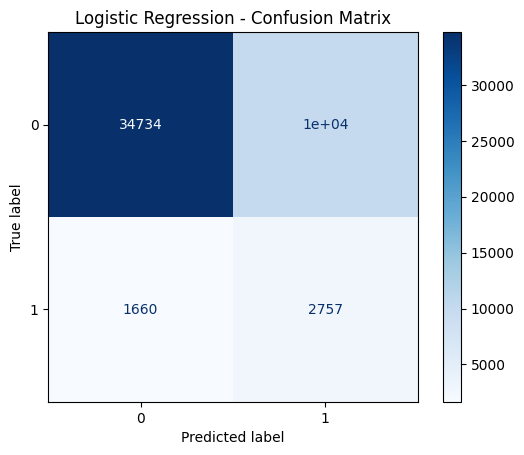

Training Random Forest...

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     44786
           1       0.39      0.11      0.17      4417

    accuracy                           0.90     49203
   macro avg       0.65      0.55      0.56     49203
weighted avg       0.87      0.90      0.88     49203


Random Forest - Confusion Matrix:


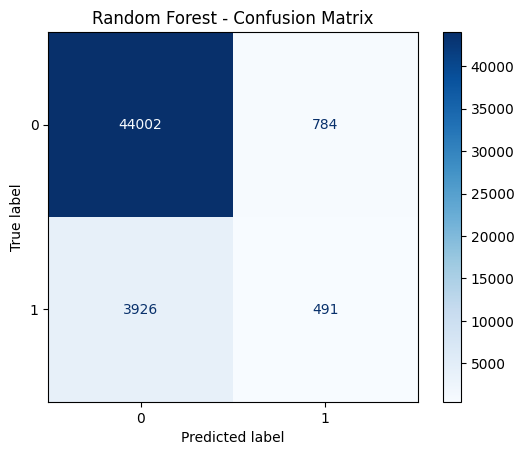

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:03:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44786
           1       0.47      0.10      0.17      4417

    accuracy                           0.91     49203
   macro avg       0.69      0.54      0.56     49203
weighted avg       0.88      0.91      0.88     49203


XGBoost - Confusion Matrix:


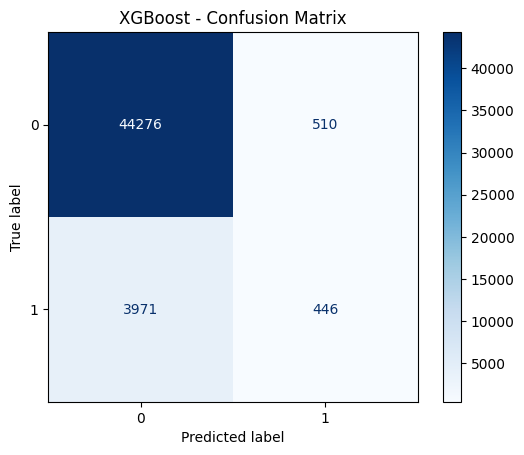

Training LightGBM...
[LightGBM] [Info] Number of positive: 179611, number of negative: 179611
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.343547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22319
[LightGBM] [Info] Number of data points in the train set: 359222, number of used features: 111
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     44786
           1       0.50      0.11      0.18      4417

    accuracy                           0.91     49203
   macro avg       0.71      0.55      0.57     49203
weighted avg       0.88      0.91      0.88     49203


LightGBM - Confusion Matrix:


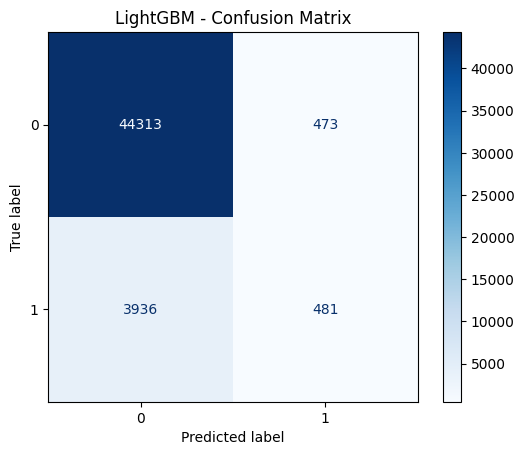

Training Naive Bayes...

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.58      0.72     44786
           1       0.14      0.71      0.24      4417

    accuracy                           0.59     49203
   macro avg       0.55      0.65      0.48     49203
weighted avg       0.88      0.59      0.68     49203


Naive Bayes - Confusion Matrix:


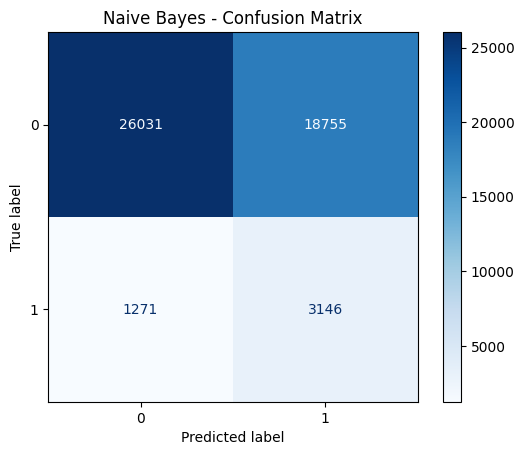


Weighted Results:
                 Model  Train Accuracy  Test Accuracy   AUC-ROC  \
0  Logistic Regression        0.788487       0.761966  0.777655   
1        Random Forest        1.000000       0.904274  0.817168   
2              XGBoost        0.953770       0.908928  0.832417   
3             LightGBM        0.949945       0.910392  0.836568   
4          Naive Bayes        0.698454       0.592992  0.714515   

   F1-Score (Class 0)  F1-Score (Class 1)  Recall (Class 0)  Recall (Class 1)  
0            0.855728            0.320098          0.775555          0.624179  
1            0.949199            0.172523          0.982495          0.111161  
2            0.951834            0.166015          0.988613          0.100974  
3            0.952609            0.179110          0.989439          0.108897  
4            0.722201            0.239076          0.581231          0.712248  


<Figure size 1000x600 with 0 Axes>

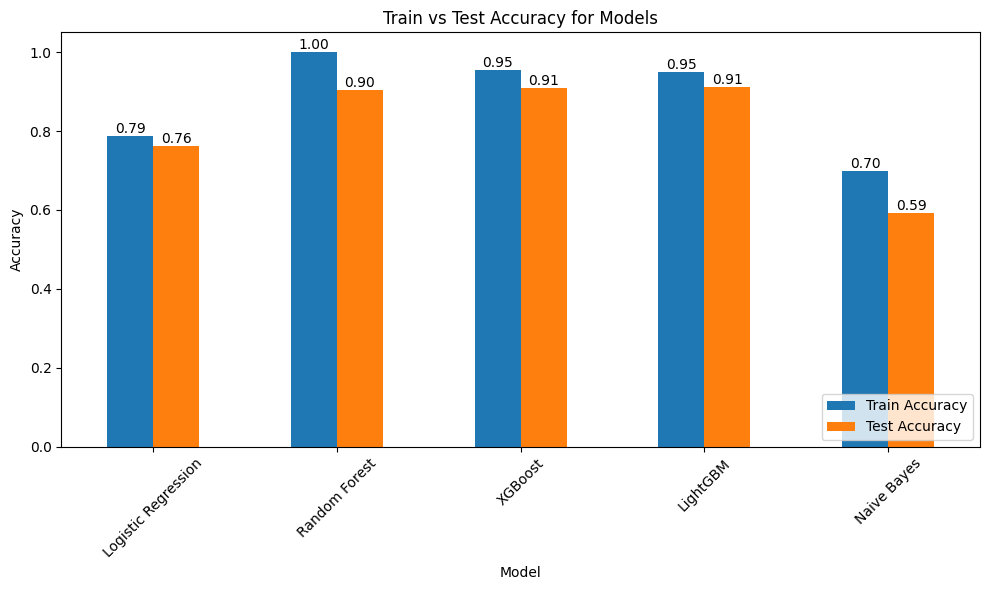

In [ ]:
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_resampled_smote_tomek, y_resampled_smote_tomek)

    # Predictions
    y_train_pred = model.predict(X_resampled_smote_tomek)
    y_test_pred = model.predict(Xnew_test)

    # Accuracy
    train_accuracy = accuracy_score(y_resampled_smote_tomek, y_train_pred)
    test_accuracy = accuracy_score(ynew_test, y_test_pred)
    # AUC-ROC for binary classification
    auc_roc = None
    if len(set(ynew_test)) == 2:  # Check if binary classification
        y_test_prob = model.predict_proba(Xnew_test)[:, 1] if hasattr(model, 'predict_proba') else None
        if y_test_prob is not None:
            auc_roc = roc_auc_score(ynew_test, y_test_prob)

    # Classification metrics
    classification_metrics = classification_report(
        y_test, y_test_pred, output_dict=True, target_names=["Class 0", "Class 1"]
    )
    f1_score_class_0 = classification_metrics["Class 0"]["f1-score"]
    f1_score_class_1 = classification_metrics["Class 1"]["f1-score"]
    recall_class_0 = classification_metrics["Class 0"]["recall"]
    recall_class_1 = classification_metrics["Class 1"]["recall"]

    # Store results
    results.append({
        "Model": name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "AUC-ROC": auc_roc,
        "F1-Score (Class 0)": f1_score_class_0,
        "F1-Score (Class 1)": f1_score_class_1,
        "Recall (Class 0)": recall_class_0,
        "Recall (Class 1)": recall_class_1
    })

    # Print metrics
    print(f"\n{name} - Classification Report:")
    print(classification_report(ynew_test, y_test_pred))
    cm = confusion_matrix(ynew_test, y_test_pred)
    print(f"\n{name} - Confusion Matrix:")
    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results
print("\nWeighted Results:")
print(results_df)

# Plotting train and test accuracy with values
plt.figure(figsize=(10, 6))
ax = results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6))

# Annotating the bars with respective values
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')  # Display values up to 2 decimal points

plt.title("Train vs Test Accuracy for Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()